<a href="https://colab.research.google.com/github/Irin-mathew/Player_Performance_analyzer-/blob/main/injury_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kagglehub tensorflow scikit-learn pandas numpy matplotlib seaborn

In [2]:
import kagglehub
import pandas as pd
import numpy as np
import json
import os
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [3]:
print("📥 Downloading Indian Food Images Dataset...")
indian_food_path = kagglehub.dataset_download("iamsouravbanerjee/indian-food-images-dataset")
print(f"Indian Food Dataset: {indian_food_path}")

# Download Daily Food & Nutrition Dataset
print("📥 Downloading Daily Food & Nutrition Dataset...")
nutrition_path = kagglehub.dataset_download("adilshamim8/daily-food-and-nutrition-dataset")
print(f"Nutrition Dataset: {nutrition_path}")

# Download Healthy Diet Recipes Dataset
print("📥 Downloading Healthy Diet Recipes Dataset...")
recipes_path = kagglehub.dataset_download("thedevastator/healthy-diet-recipes-a-comprehensive-dataset")
print(f"Recipes Dataset: {recipes_path}")

print("\n✅ All datasets downloaded!")

📥 Downloading Indian Food Images Dataset...


100%|██████████| 355M/355M [00:06<00:00, 56.4MB/s]

Extracting files...


Indian Food Dataset: /root/.cache/kagglehub/datasets/iamsouravbanerjee/indian-food-images-dataset/versions/5
📥 Downloading Daily Food & Nutrition Dataset...
Using Colab cache for faster access to the 'daily-food-and-nutrition-dataset' dataset.
Nutrition Dataset: /kaggle/input/daily-food-and-nutrition-dataset
📥 Downloading Healthy Diet Recipes Dataset...


100%|██████████| 378k/378k [00:00<00:00, 85.4MB/s]

Extracting files...
Recipes Dataset: /root/.cache/kagglehub/datasets/thedevastator/healthy-diet-recipes-a-comprehensive-dataset/versions/2

✅ All datasets downloaded!


In [4]:
# ========================================
# CELL 4: Create COMPREHENSIVE Global Food Dataset
# Over 1000+ food items covering ALL major cuisines
# ========================================
print("🍛 Creating COMPREHENSIVE Global Food Dataset...")

regional_cuisine_data = {
    'food_name': [],
    'region': [],
    'type': [],  # veg/non-veg
    'calories': [],
    'protein_g': [],
    'carbs_g': [],
    'fat_g': [],
    'fiber_g': [],
    'category': [],  # breakfast/lunch/dinner/snack
    'ingredients': [],
    'prep_time_mins': [],
    'suitable_for_athletes': []
}

# ========================================
# INDIAN CUISINES (Expanded)
# ========================================

# Bengali Cuisine (20 items)
bengali_foods = [
    # Vegetarian
    ('Aloo Posto', 'Bengali', 'veg', 280, 8, 35, 12, 4, 'lunch', 'potatoes,poppy seeds,mustard oil', 30, True),
    ('Shukto', 'Bengali', 'veg', 180, 6, 22, 8, 5, 'lunch', 'mixed vegetables,bitter gourd,milk', 40, True),
    ('Cholar Dal', 'Bengali', 'veg', 220, 12, 38, 4, 8, 'lunch', 'bengal gram,coconut,ghee', 35, True),
    ('Bhapa Doi', 'Bengali', 'veg', 160, 6, 24, 5, 0, 'snack', 'yogurt,condensed milk,cardamom', 180, False),
    ('Luchi with Aloo Dum', 'Bengali', 'veg', 420, 8, 55, 18, 3, 'breakfast', 'flour,potatoes,spices', 45, False),
    ('Mochar Ghonto', 'Bengali', 'veg', 200, 7, 28, 8, 6, 'lunch', 'banana flower,coconut,spices', 50, True),
    ('Dhokar Dalna', 'Bengali', 'veg', 260, 14, 32, 9, 5, 'lunch', 'lentil cakes,tomato,spices', 60, True),
    ('Begun Bhaja', 'Bengali', 'veg', 180, 3, 18, 12, 4, 'snack', 'eggplant,mustard oil,spices', 20, True),
    ('Panta Bhat', 'Bengali', 'veg', 150, 4, 32, 1, 2, 'breakfast', 'fermented rice,onion,chili', 480, True),
    ('Misti Doi', 'Bengali', 'veg', 180, 7, 26, 6, 0, 'snack', 'yogurt,jaggery', 360, False),

    # Non-Vegetarian
    ('Macher Jhol', 'Bengali', 'non-veg', 250, 28, 12, 10, 2, 'lunch', 'fish,potatoes,tomatoes,turmeric', 35, True),
    ('Kosha Mangsho', 'Bengali', 'non-veg', 480, 35, 8, 35, 1, 'lunch', 'mutton,onions,yogurt,spices', 90, False),
    ('Chingri Malai Curry', 'Bengali', 'non-veg', 320, 24, 10, 22, 1, 'dinner', 'prawns,coconut milk,spices', 40, True),
    ('Doi Maach', 'Bengali', 'non-veg', 290, 30, 8, 16, 1, 'lunch', 'fish,yogurt,mustard paste', 45, True),
    ('Ilish Macher Paturi', 'Bengali', 'non-veg', 350, 32, 5, 24, 1, 'dinner', 'hilsa fish,mustard paste,banana leaf', 35, True),
    ('Chicken Rezala', 'Bengali', 'non-veg', 420, 36, 10, 28, 2, 'dinner', 'chicken,yogurt,cashew,spices', 55, False),
    ('Prawn Cutlet', 'Bengali', 'non-veg', 280, 22, 18, 14, 2, 'snack', 'prawns,breadcrumbs,egg', 40, True),
    ('Fish Kalia', 'Bengali', 'non-veg', 310, 29, 12, 18, 2, 'lunch', 'fish,onion,yogurt,spices', 45, True),
    ('Mutton Biryani Bengali Style', 'Bengali', 'non-veg', 550, 30, 62, 22, 2, 'lunch', 'mutton,rice,potato,spices', 90, False),
    ('Chingri Malaikari', 'Bengali', 'non-veg', 340, 26, 8, 24, 1, 'dinner', 'prawns,coconut milk,spices', 40, True),
]

# South Indian Cuisine (25 items)
south_foods = [
    # Vegetarian
    ('Idli Sambar', 'South', 'veg', 180, 8, 36, 2, 4, 'breakfast', 'rice,lentils,vegetables', 20, True),
    ('Dosa with Chutney', 'South', 'veg', 220, 6, 42, 4, 3, 'breakfast', 'rice,lentils,coconut', 25, True),
    ('Rasam Rice', 'South', 'veg', 240, 6, 48, 3, 2, 'lunch', 'rice,tamarind,tomatoes,spices', 30, True),
    ('Avial', 'South', 'veg', 160, 5, 20, 8, 6, 'lunch', 'mixed vegetables,coconut,yogurt', 35, True),
    ('Pongal', 'South', 'veg', 280, 10, 45, 8, 3, 'breakfast', 'rice,moong dal,pepper,ghee', 30, True),
    ('Medu Vada', 'South', 'veg', 200, 7, 24, 9, 3, 'breakfast', 'urad dal,curry leaves,spices', 30, True),
    ('Bisi Bele Bath', 'South', 'veg', 320, 12, 52, 8, 5, 'lunch', 'rice,lentils,vegetables,tamarind', 45, True),
    ('Upma', 'South', 'veg', 200, 6, 38, 5, 3, 'breakfast', 'semolina,vegetables,spices', 20, True),
    ('Coconut Chutney', 'South', 'veg', 120, 3, 8, 10, 2, 'snack', 'coconut,green chili,ginger', 10, True),
    ('Lemon Rice', 'South', 'veg', 260, 5, 48, 6, 2, 'lunch', 'rice,lemon,peanuts,turmeric', 20, True),
    ('Kootu', 'South', 'veg', 180, 8, 26, 6, 5, 'lunch', 'vegetables,lentils,coconut', 35, True),
    ('Pesarattu', 'South', 'veg', 210, 10, 35, 4, 4, 'breakfast', 'green gram,rice,ginger', 30, True),
    ('Uttapam', 'South', 'veg', 240, 8, 40, 6, 3, 'breakfast', 'rice,lentils,vegetables', 25, True),
    ('Sambhar Vada', 'South', 'veg', 280, 10, 38, 10, 4, 'breakfast', 'urad dal,lentils,vegetables', 40, True),
    ('Appam with Stew', 'South', 'veg', 260, 7, 42, 8, 3, 'dinner', 'rice,coconut milk,vegetables', 45, True),

    # Non-Vegetarian
    ('Chettinad Chicken', 'South', 'non-veg', 380, 32, 12, 24, 2, 'lunch', 'chicken,coconut,fennel,spices', 50, True),
    ('Fish Curry Kerala Style', 'South', 'non-veg', 280, 28, 8, 16, 2, 'dinner', 'fish,coconut,tamarind,curry leaves', 40, True),
    ('Hyderabadi Biryani', 'South', 'non-veg', 520, 25, 58, 22, 2, 'lunch', 'rice,chicken,yogurt,saffron', 90, False),
    ('Andhra Chicken Curry', 'South', 'non-veg', 400, 34, 10, 26, 2, 'lunch', 'chicken,tamarind,chili,spices', 50, True),
    ('Prawn Masala', 'South', 'non-veg', 320, 26, 12, 20, 2, 'dinner', 'prawns,coconut,tamarind,spices', 40, True),
    ('Fish Fry South Indian', 'South', 'non-veg', 260, 30, 8, 14, 1, 'lunch', 'fish,spices,curry leaves', 25, True),
    ('Mutton Chettinad', 'South', 'non-veg', 450, 32, 10, 32, 2, 'dinner', 'mutton,coconut,fennel,pepper', 75, False),
    ('Egg Curry South Style', 'South', 'non-veg', 240, 16, 10, 16, 2, 'lunch', 'eggs,coconut,tamarind,spices', 30, True),
    ('Nadan Chicken Curry', 'South', 'non-veg', 360, 30, 12, 24, 2, 'dinner', 'chicken,coconut,curry leaves', 45, True),
    ('Fish Moilee', 'South', 'non-veg', 300, 28, 8, 18, 1, 'dinner', 'fish,coconut milk,turmeric', 35, True),
]

# North Indian Cuisine (25 items)
north_foods = [
    # Vegetarian
    ('Rajma Chawal', 'North', 'veg', 350, 15, 58, 6, 12, 'lunch', 'kidney beans,rice,tomatoes,onions', 45, True),
    ('Chole Bhature', 'North', 'veg', 520, 18, 72, 18, 10, 'breakfast', 'chickpeas,flour,yogurt,spices', 60, False),
    ('Palak Paneer', 'North', 'veg', 280, 16, 12, 20, 4, 'lunch', 'spinach,cottage cheese,cream', 35, True),
    ('Dal Makhani', 'North', 'veg', 320, 14, 38, 12, 8, 'dinner', 'black lentils,kidney beans,butter,cream', 240, False),
    ('Aloo Paratha', 'North', 'veg', 380, 8, 52, 14, 4, 'breakfast', 'wheat flour,potatoes,butter', 40, False),
    ('Paneer Tikka', 'North', 'veg', 320, 20, 8, 24, 2, 'snack', 'cottage cheese,yogurt,spices', 35, True),
    ('Aloo Gobi', 'North', 'veg', 180, 5, 28, 6, 5, 'lunch', 'potatoes,cauliflower,spices', 30, True),
    ('Kadhi Pakora', 'North', 'veg', 280, 10, 32, 12, 3, 'lunch', 'yogurt,gram flour,spices', 45, False),
    ('Matar Paneer', 'North', 'veg', 300, 16, 18, 18, 4, 'lunch', 'peas,cottage cheese,tomatoes', 35, True),
    ('Baingan Bharta', 'North', 'veg', 200, 5, 22, 10, 6, 'lunch', 'eggplant,tomatoes,onions', 40, True),
    ('Bhindi Masala', 'North', 'veg', 160, 4, 20, 8, 5, 'lunch', 'okra,onions,tomatoes,spices', 30, True),
    ('Malai Kofta', 'North', 'veg', 420, 12, 32, 28, 3, 'dinner', 'cottage cheese,potato,cream,nuts', 50, False),
    ('Sarson Ka Saag', 'North', 'veg', 220, 8, 18, 14, 6, 'lunch', 'mustard greens,spinach,butter', 45, True),
    ('Dahi Bhalla', 'North', 'veg', 240, 8, 32, 9, 3, 'snack', 'lentil fritters,yogurt,tamarind', 45, False),
    ('Pav Bhaji', 'North', 'veg', 380, 10, 52, 14, 6, 'dinner', 'mixed vegetables,butter,bread', 40, False),

    # Non-Vegetarian
    ('Butter Chicken', 'North', 'non-veg', 450, 28, 18, 32, 2, 'dinner', 'chicken,butter,cream,tomatoes', 50, False),
    ('Rogan Josh', 'North', 'non-veg', 420, 30, 10, 30, 2, 'lunch', 'mutton,yogurt,kashmiri chili,spices', 90, False),
    ('Tandoori Chicken', 'North', 'non-veg', 280, 35, 6, 12, 1, 'dinner', 'chicken,yogurt,spices', 240, True),
    ('Chicken Tikka Masala', 'North', 'non-veg', 400, 32, 16, 26, 2, 'dinner', 'chicken,tomato,cream,spices', 45, False),
    ('Keema Matar', 'North', 'non-veg', 380, 28, 12, 26, 3, 'lunch', 'minced meat,peas,tomatoes', 40, True),
    ('Fish Tikka', 'North', 'non-veg', 240, 32, 6, 10, 1, 'snack', 'fish,yogurt,spices', 35, True),
    ('Chicken Korma', 'North', 'non-veg', 460, 30, 14, 32, 2, 'dinner', 'chicken,yogurt,cream,nuts', 50, False),
    ('Mutton Keema', 'North', 'non-veg', 400, 32, 8, 28, 2, 'lunch', 'minced mutton,spices', 45, True),
    ('Amritsari Fish', 'North', 'non-veg', 320, 28, 18, 16, 2, 'snack', 'fish,gram flour,spices', 30, True),
    ('Chicken Changezi', 'North', 'non-veg', 440, 34, 12, 30, 2, 'dinner', 'chicken,tomatoes,cream,spices', 50, False),
]

# ========================================
# ITALIAN CUISINE (30 items)
# ========================================

italian_foods = [
    # Vegetarian
    ('Margherita Pizza', 'Italian', 'veg', 280, 12, 34, 10, 2, 'lunch', 'dough,tomato,mozzarella,basil', 15, True),
    ('Pasta Pomodoro', 'Italian', 'veg', 320, 10, 58, 6, 3, 'lunch', 'pasta,tomatoes,garlic,basil', 20, True),
    ('Pasta Carbonara (Veg)', 'Italian', 'veg', 420, 16, 52, 16, 2, 'dinner', 'pasta,cream,cheese,pepper', 25, False),
    ('Vegetable Lasagna', 'Italian', 'veg', 360, 18, 42, 12, 4, 'dinner', 'pasta,vegetables,ricotta,mozzarella', 60, True),
    ('Caprese Salad', 'Italian', 'veg', 200, 12, 6, 14, 1, 'lunch', 'tomatoes,mozzarella,basil,olive oil', 10, True),
    ('Penne Arrabbiata', 'Italian', 'veg', 300, 10, 54, 6, 3, 'lunch', 'pasta,tomatoes,chili,garlic', 20, True),
    ('Risotto ai Funghi', 'Italian', 'veg', 380, 10, 58, 12, 2, 'dinner', 'arborio rice,mushrooms,parmesan', 40, True),
    ('Bruschetta', 'Italian', 'veg', 180, 6, 26, 6, 2, 'snack', 'bread,tomatoes,garlic,basil', 10, True),
    ('Minestrone Soup', 'Italian', 'veg', 160, 7, 26, 4, 6, 'lunch', 'vegetables,beans,pasta,tomatoes', 45, True),
    ('Panzanella', 'Italian', 'veg', 220, 6, 32, 8, 4, 'lunch', 'bread,tomatoes,cucumber,onion', 15, True),
    ('Eggplant Parmigiana', 'Italian', 'veg', 340, 16, 28, 18, 5, 'dinner', 'eggplant,tomato,mozzarella,parmesan', 50, False),
    ('Pasta Primavera', 'Italian', 'veg', 320, 12, 52, 8, 4, 'lunch', 'pasta,mixed vegetables,olive oil', 25, True),
    ('Focaccia Bread', 'Italian', 'veg', 260, 7, 42, 8, 2, 'snack', 'flour,olive oil,rosemary,salt', 90, False),
    ('Gnocchi al Pesto', 'Italian', 'veg', 400, 12, 56, 14, 3, 'dinner', 'potato gnocchi,basil,pine nuts,parmesan', 30, False),
    ('Italian Wedding Soup (Veg)', 'Italian', 'veg', 180, 8, 24, 6, 4, 'lunch', 'vegetables,pasta,beans,herbs', 35, True),

    # Non-Vegetarian
    ('Spaghetti Bolognese', 'Italian', 'non-veg', 450, 26, 56, 14, 3, 'lunch', 'pasta,ground beef,tomatoes,herbs', 45, True),
    ('Chicken Alfredo', 'Italian', 'non-veg', 520, 32, 48, 22, 2, 'dinner', 'pasta,chicken,cream,parmesan', 30, False),
    ('Pepperoni Pizza', 'Italian', 'non-veg', 320, 14, 36, 12, 2, 'lunch', 'dough,tomato,mozzarella,pepperoni', 15, False),
    ('Osso Buco', 'Italian', 'non-veg', 480, 38, 12, 32, 2, 'dinner', 'veal shanks,tomatoes,wine,herbs', 120, False),
    ('Chicken Parmigiana', 'Italian', 'non-veg', 460, 36, 32, 22, 3, 'dinner', 'chicken,tomato,mozzarella,parmesan', 40, False),
    ('Seafood Risotto', 'Italian', 'non-veg', 420, 28, 54, 12, 2, 'dinner', 'arborio rice,shrimp,mussels,fish', 45, True),
    ('Carbonara Original', 'Italian', 'non-veg', 480, 24, 52, 20, 2, 'dinner', 'pasta,guanciale,eggs,pecorino', 25, False),
    ('Saltimbocca', 'Italian', 'non-veg', 380, 32, 4, 26, 1, 'dinner', 'veal,prosciutto,sage,butter', 25, False),
    ('Cacciatore Chicken', 'Italian', 'non-veg', 360, 34, 18, 18, 3, 'dinner', 'chicken,tomatoes,peppers,olives', 50, True),
    ('Meat Lasagna', 'Italian', 'non-veg', 480, 28, 42, 22, 3, 'dinner', 'pasta,ground beef,ricotta,mozzarella', 75, False),
    ('Prosciutto Pizza', 'Italian', 'non-veg', 340, 18, 34, 14, 2, 'lunch', 'dough,tomato,mozzarella,prosciutto', 15, False),
    ('Spaghetti alle Vongole', 'Italian', 'non-veg', 380, 24, 54, 8, 2, 'dinner', 'pasta,clams,garlic,white wine', 25, True),
    ('Tuscan Steak', 'Italian', 'non-veg', 520, 48, 2, 32, 0, 'dinner', 'beef steak,olive oil,rosemary', 20, True),
    ('Arancini', 'Italian', 'non-veg', 320, 14, 38, 12, 2, 'snack', 'rice,meat,mozzarella,breadcrumbs', 45, False),
    ('Italian Meatballs', 'Italian', 'non-veg', 340, 26, 12, 22, 2, 'dinner', 'ground beef,breadcrumbs,egg,herbs', 35, True),
]

# ========================================
# CHINESE CUISINE (30 items)
# ========================================

chinese_foods = [
    # Vegetarian
    ('Vegetable Spring Rolls', 'Chinese', 'veg', 180, 5, 24, 8, 3, 'snack', 'vegetables,wrapper,soy sauce', 30, True),
    ('Mapo Tofu (Veg)', 'Chinese', 'veg', 260, 16, 18, 14, 3, 'lunch', 'tofu,chili bean paste,garlic', 25, True),
    ('Vegetable Fried Rice', 'Chinese', 'veg', 280, 8, 48, 6, 3, 'lunch', 'rice,mixed vegetables,soy sauce', 20, True),
    ('Buddha Bowl', 'Chinese', 'veg', 320, 12, 52, 8, 8, 'lunch', 'rice,vegetables,tofu,sesame', 25, True),
    ('Hot and Sour Soup (Veg)', 'Chinese', 'veg', 120, 6, 16, 4, 2, 'lunch', 'vegetables,tofu,vinegar,pepper', 30, True),
    ('Chow Mein (Veg)', 'Chinese', 'veg', 320, 10, 52, 8, 4, 'lunch', 'noodles,vegetables,soy sauce', 25, True),
    ('Ma La Noodles (Veg)', 'Chinese', 'veg', 340, 12, 56, 8, 3, 'lunch', 'noodles,sichuan pepper,vegetables', 20, True),
    ('Vegetable Dumplings', 'Chinese', 'veg', 220, 8, 32, 6, 3, 'snack', 'vegetables,wrapper,ginger', 40, True),
    ('Kung Pao Tofu', 'Chinese', 'veg', 300, 18, 24, 14, 4, 'dinner', 'tofu,peanuts,chili,soy sauce', 25, True),
    ('Bok Choy Stir Fry', 'Chinese', 'veg', 140, 6, 12, 8, 4, 'lunch', 'bok choy,garlic,ginger,soy sauce', 15, True),
    ('Egg Fried Rice', 'Chinese', 'veg', 320, 12, 50, 8, 2, 'lunch', 'rice,eggs,vegetables,soy sauce', 20, True),
    ('Sesame Noodles', 'Chinese', 'veg', 360, 10, 54, 12, 3, 'lunch', 'noodles,sesame paste,vegetables', 20, True),
    ('Szechuan Eggplant', 'Chinese', 'veg', 220, 6, 28, 10, 5, 'lunch', 'eggplant,garlic,chili,soy sauce', 25, True),
    ('Wonton Soup (Veg)', 'Chinese', 'veg', 200, 8, 28, 6, 2, 'lunch', 'vegetables,wrapper,broth', 35, True),
    ('Chinese Mixed Vegetables', 'Chinese', 'veg', 160, 6, 22, 6, 5, 'lunch', 'mixed vegetables,soy sauce,ginger', 20, True),

    # Non-Vegetarian
    ('Sweet and Sour Chicken', 'Chinese', 'non-veg', 420, 28, 48, 12, 2, 'lunch', 'chicken,pineapple,peppers,sauce', 30, False),
    ('Kung Pao Chicken', 'Chinese', 'non-veg', 380, 32, 24, 18, 3, 'dinner', 'chicken,peanuts,chili,soy sauce', 25, True),
    ('Peking Duck', 'Chinese', 'non-veg', 520, 32, 12, 38, 1, 'dinner', 'duck,pancakes,cucumber,hoisin', 180, False),
    ('General Tso Chicken', 'Chinese', 'non-veg', 480, 26, 52, 18, 2, 'dinner', 'chicken,chili,garlic,soy sauce', 30, False),
    ('Beef with Broccoli', 'Chinese', 'non-veg', 320, 28, 18, 16, 4, 'lunch', 'beef,broccoli,oyster sauce,garlic', 20, True),
    ('Mongolian Beef', 'Chinese', 'non-veg', 420, 32, 28, 20, 2, 'dinner', 'beef,scallions,soy sauce,ginger', 25, True),
    ('Orange Chicken', 'Chinese', 'non-veg', 460, 24, 54, 16, 2, 'dinner', 'chicken,orange,chili,soy sauce', 30, False),
    ('Dim Sum Pork', 'Chinese', 'non-veg', 280, 16, 24, 14, 2, 'snack', 'pork,wrapper,soy sauce,ginger', 45, True),
    ('Sichuan Fish', 'Chinese', 'non-veg', 320, 32, 12, 16, 2, 'dinner', 'fish,sichuan pepper,chili,garlic', 30, True),
    ('Char Siu Pork', 'Chinese', 'non-veg', 380, 28, 18, 22, 1, 'dinner', 'pork,honey,soy sauce,five spice', 120, False),
    ('Shrimp Fried Rice', 'Chinese', 'non-veg', 360, 22, 48, 8, 2, 'lunch', 'rice,shrimp,vegetables,soy sauce', 20, True),
    ('Chicken Chow Mein', 'Chinese', 'non-veg', 400, 26, 52, 10, 3, 'lunch', 'noodles,chicken,vegetables,soy sauce', 25, True),
    ('Mapo Tofu with Pork', 'Chinese', 'non-veg', 340, 24, 18, 20, 3, 'lunch', 'tofu,pork,chili bean paste', 25, True),
    ('Salt and Pepper Squid', 'Chinese', 'non-veg', 320, 26, 22, 14, 2, 'snack', 'squid,peppers,salt,garlic', 25, True),
    ('Crispy Duck Noodles', 'Chinese', 'non-veg', 480, 28, 54, 18, 3, 'dinner', 'duck,noodles,vegetables,hoisin', 40, False),
]

# ========================================
# MEXICAN CUISINE (25 items)
# ========================================

mexican_foods = [
    # Vegetarian
    ('Bean Burrito', 'Mexican', 'veg', 380, 14, 58, 8, 12, 'lunch', 'beans,tortilla,cheese,salsa', 15, True),
    ('Cheese Quesadilla', 'Mexican', 'veg', 420, 18, 42, 18, 3, 'lunch', 'tortilla,cheese,peppers,onions', 15, False),
    ('Vegetable Fajitas', 'Mexican', 'veg', 280, 10, 38, 10, 6, 'dinner', 'peppers,onions,tortillas,sour cream', 25, True),
    ('Black Bean Tacos', 'Mexican', 'veg', 320, 14, 48, 8, 10, 'lunch', 'black beans,tortilla,lettuce,salsa', 15, True),
    ('Guacamole with Chips', 'Mexican', 'veg', 280, 4, 32, 16, 8, 'snack', 'avocado,chips,lime,cilantro', 10, True),
    ('Mexican Rice', 'Mexican', 'veg', 240, 6, 46, 4, 3, 'lunch', 'rice,tomatoes,vegetables,spices', 25, True),
    ('Refried Beans', 'Mexican', 'veg', 220, 12, 34, 4, 10, 'lunch', 'pinto beans,onions,garlic', 35, True),
    ('Vegetarian Enchiladas', 'Mexican', 'veg', 360, 16, 44, 12, 8, 'dinner', 'tortilla,beans,cheese,enchilada sauce', 40, True),
    ('Elote (Mexican Corn)', 'Mexican', 'veg', 200, 6, 28, 8, 4, 'snack', 'corn,mayo,cheese,chili powder', 15, True),
    ('Pico de Gallo', 'Mexican', 'veg', 60, 2, 12, 1, 3, 'snack', 'tomatoes,onions,cilantro,lime', 10, True),
    ('Vegetarian Nachos', 'Mexican', 'veg', 440, 14, 52, 18, 6, 'snack', 'chips,beans,cheese,jalapeños', 20, False),
    ('Chilaquiles (Veg)', 'Mexican', 'veg', 340, 12, 42, 14, 4, 'breakfast', 'tortillas,salsa,cheese,beans', 25, False),

    # Non-Vegetarian
    ('Chicken Burrito', 'Mexican', 'non-veg', 520, 32, 58, 16, 6, 'lunch', 'chicken,beans,rice,tortilla,cheese', 20, False),
    ('Beef Tacos', 'Mexican', 'non-veg', 380, 24, 32, 18, 4, 'lunch', 'ground beef,tortilla,lettuce,cheese', 25, True),
    ('Chicken Fajitas', 'Mexican', 'non-veg', 420, 38, 32, 16, 4, 'dinner', 'chicken,peppers,onions,tortillas', 30, True),
    ('Carnitas', 'Mexican', 'non-veg', 460, 32, 8, 34, 2, 'dinner', 'pork,orange,spices', 180, False),
    ('Fish Tacos', 'Mexican', 'non-veg', 340, 28, 32, 12, 3, 'lunch', 'fish,tortilla,cabbage,lime', 25, True),
    ('Chicken Enchiladas', 'Mexican', 'non-veg', 440, 32, 42, 16, 4, 'dinner', 'chicken,tortilla,cheese,enchilada sauce', 40, True),
    ('Carne Asada', 'Mexican', 'non-veg', 480, 42, 6, 30, 1, 'dinner', 'beef,lime,cilantro,spices', 240, True),
    ('Pollo Asado', 'Mexican', 'non-veg', 380, 40, 8, 18, 1, 'dinner', 'chicken,citrus,achiote,spices', 120, True),
    ('Shrimp Quesadilla', 'Mexican', 'non-veg', 460, 28, 38, 20, 3, 'lunch', 'shrimp,cheese,tortilla,peppers', 20, False),
    ('Chicken Tostadas', 'Mexican', 'non-veg', 380, 26, 36, 14, 4, 'lunch', 'chicken,crispy tortilla,beans,lettuce', 20, True),
    ('Barbacoa Beef', 'Mexican', 'non-veg', 420, 36, 8, 28, 2, 'dinner', 'beef,chipotle,lime,spices', 240, False),
    ('Chorizo Tacos', 'Mexican', 'non-veg', 400, 20, 32, 22, 3, 'lunch', 'chorizo,tortilla,onions,cilantro', 20, False),
]

# ========================================
# FAST FOOD / AMERICAN (40 items)
# ========================================

american_foods = [
    # Burgers & Sandwiches
    ('Classic Hamburger', 'American', 'non-veg', 540, 28, 42, 26, 2, 'lunch', 'beef patty,bun,lettuce,tomato', 10, False),
    ('Cheeseburger', 'American', 'non-veg', 600, 32, 44, 32, 2, 'lunch', 'beef patty,cheese,bun,lettuce', 10, False),
    ('Double Cheeseburger', 'American', 'non-veg', 780, 48, 46, 44, 2, 'lunch', 'two beef patties,cheese,bun', 12, False),
    ('Bacon Cheeseburger', 'American', 'non-veg', 720, 38, 44, 40, 2, 'lunch', 'beef,bacon,cheese,bun', 12, False),
    ('Veggie Burger', 'American', 'veg', 380, 16, 48, 12, 6, 'lunch', 'veggie patty,bun,lettuce,tomato', 10, True),
    ('Chicken Burger', 'American', 'non-veg', 520, 32, 46, 22, 2, 'lunch', 'chicken patty,bun,mayo,lettuce', 10, False),
    ('Fish Burger', 'American', 'non-veg', 480, 24, 52, 18, 2, 'lunch', 'fish fillet,bun,tartar sauce', 10, False),
    ('BLT Sandwich', 'American', 'non-veg', 420, 18, 38, 22, 3, 'lunch', 'bacon,lettuce,tomato,bread,mayo', 10, False),
    ('Club Sandwich', 'American', 'non-veg', 540, 32, 44, 24, 3, 'lunch', 'chicken,bacon,lettuce,tomato,bread', 15, False),
    ('Grilled Cheese', 'American', 'veg', 420, 16, 42, 20, 2, 'lunch', 'bread,cheese,butter', 10, False),

    # Chicken Items
    ('Fried Chicken (2 pcs)', 'American', 'non-veg', 480, 32, 24, 28, 1, 'lunch', 'chicken,flour,spices', 20, False),
    ('Chicken Nuggets (6 pcs)', 'American', 'non-veg', 320, 18, 22, 18, 1, 'snack', 'chicken,breadcrumbs', 10, False),
    ('Chicken Wings (6 pcs)', 'American', 'non-veg', 540, 36, 12, 38, 0, 'snack', 'chicken wings,hot sauce', 25, False),
    ('Chicken Tenders', 'American', 'non-veg', 420, 28, 32, 18, 2, 'lunch', 'chicken breast,breadcrumbs', 15, True),
    ('Buffalo Wings', 'American', 'non-veg', 580, 38, 8, 42, 1, 'snack', 'chicken wings,buffalo sauce,butter', 25, False),
    ('BBQ Chicken', 'American', 'non-veg', 440, 36, 28, 18, 2, 'dinner', 'chicken,bbq sauce,spices', 45, True),

    # Pizzas
    ('Cheese Pizza (2 slices)', 'American', 'veg', 560, 24, 68, 18, 3, 'lunch', 'dough,cheese,tomato sauce', 15, False),
    ('Pepperoni Pizza (2 slices)', 'American', 'non-veg', 640, 28, 68, 24, 3, 'lunch', 'dough,cheese,pepperoni', 15, False),
    ('BBQ Chicken Pizza (2 slices)', 'American', 'non-veg', 620, 32, 72, 20, 3, 'lunch', 'chicken,bbq sauce,cheese', 15, False),
    ('Meat Lovers Pizza (2 slices)', 'American', 'non-veg', 740, 36, 68, 32, 3, 'lunch', 'beef,bacon,sausage,cheese', 15, False),

    # Sides & Snacks
    ('French Fries (Medium)', 'American', 'veg', 380, 5, 48, 18, 4, 'snack', 'potatoes,oil,salt', 10, False),
    ('Onion Rings', 'American', 'veg', 420, 6, 52, 20, 3, 'snack', 'onions,batter,oil', 10, False),
    ('Mozzarella Sticks (6 pcs)', 'American', 'veg', 480, 22, 38, 24, 2, 'snack', 'mozzarella,breadcrumbs', 10, False),
    ('Mac and Cheese', 'American', 'veg', 420, 18, 46, 18, 2, 'lunch', 'pasta,cheese sauce', 15, False),
    ('Coleslaw', 'American', 'veg', 180, 2, 16, 12, 3, 'snack', 'cabbage,mayo,vinegar', 10, True),
    ('Potato Wedges', 'American', 'veg', 320, 6, 42, 14, 4, 'snack', 'potatoes,spices,oil', 15, False),
    ('Corn Dog', 'American', 'non-veg', 380, 14, 42, 16, 2, 'snack', 'hot dog,cornmeal batter', 10, False),
    ('Nachos with Cheese', 'American', 'veg', 520, 12, 56, 26, 4, 'snack', 'chips,cheese sauce,jalapeños', 10, False),

    # Breakfast
    ('Pancakes (3 pcs)', 'American', 'veg', 420, 10, 72, 8, 2, 'breakfast', 'flour,milk,eggs,syrup', 20, False),
    ('Waffles', 'American', 'veg', 380, 8, 62, 10, 2, 'breakfast', 'flour,eggs,milk,syrup', 15, False),
    ('Bacon and Eggs', 'American', 'non-veg', 380, 24, 4, 30, 0, 'breakfast', 'bacon,eggs', 10, True),
    ('Hash Browns', 'American', 'veg', 280, 4, 32, 14, 3, 'breakfast', 'potatoes,oil', 10, False),
    ('Breakfast Burrito', 'American', 'non-veg', 540, 26, 48, 26, 3, 'breakfast', 'eggs,sausage,cheese,tortilla', 15, False),
    ('Egg McMuffin', 'American', 'non-veg', 300, 18, 30, 12, 2, 'breakfast', 'egg,cheese,ham,muffin', 10, False),

    # Subs & Wraps
    ('Subway Veggie Sub (6 inch)', 'American', 'veg', 280, 10, 48, 4, 6, 'lunch', 'bread,vegetables,cheese', 10, True),
    ('Subway Chicken Sub (6 inch)', 'American', 'non-veg', 360, 24, 46, 6, 4, 'lunch', 'bread,chicken,vegetables', 10, True),
    ('Chicken Wrap', 'American', 'non-veg', 420, 28, 38, 16, 3, 'lunch', 'tortilla,chicken,vegetables,sauce', 10, True),
    ('Falafel Wrap', 'American', 'veg', 380, 14, 52, 12, 8, 'lunch', 'tortilla,falafel,hummus,vegetables', 10, True),

    # Salads
    ('Caesar Salad', 'American', 'veg', 280, 8, 18, 18, 4, 'lunch', 'lettuce,parmesan,croutons,dressing', 10, True),
    ('Chicken Caesar Salad', 'American', 'non-veg', 420, 32, 18, 24, 4, 'lunch', 'lettuce,chicken,parmesan,dressing', 15, True),
]

# ========================================
# JAPANESE CUISINE (25 items)
# ========================================

japanese_foods = [
    # Vegetarian
    ('Vegetable Sushi Roll', 'Japanese', 'veg', 200, 6, 38, 2, 3, 'lunch', 'rice,nori,cucumber,avocado', 20, True),
    ('Miso Soup', 'Japanese', 'veg', 80, 6, 10, 2, 2, 'lunch', 'miso paste,tofu,seaweed,scallions', 10, True),
    ('Edamame', 'Japanese', 'veg', 120, 12, 10, 5, 8, 'snack', 'soybeans,salt', 10, True),
    ('Vegetable Tempura', 'Japanese', 'veg', 280, 6, 34, 12, 4, 'snack', 'vegetables,tempura batter', 15, True),
    ('Tofu Teriyaki', 'Japanese', 'veg', 240, 18, 22, 8, 3, 'lunch', 'tofu,teriyaki sauce,vegetables', 20, True),
    ('Vegetable Ramen', 'Japanese', 'veg', 380, 12, 58, 10, 4, 'lunch', 'noodles,vegetables,broth', 25, True),
    ('Inari Sushi', 'Japanese', 'veg', 180, 8, 32, 3, 2, 'lunch', 'rice,tofu pockets,sesame', 20, True),
    ('Seaweed Salad', 'Japanese', 'veg', 60, 2, 10, 1, 4, 'snack', 'seaweed,sesame,vinegar', 10, True),
    ('Agedashi Tofu', 'Japanese', 'veg', 220, 14, 18, 10, 2, 'snack', 'tofu,dashi,ginger,scallions', 15, True),
    ('Vegetable Gyoza', 'Japanese', 'veg', 240, 8, 32, 8, 3, 'snack', 'vegetables,wrapper,soy sauce', 30, True),

    # Non-Vegetarian
    ('Salmon Sushi (6 pcs)', 'Japanese', 'non-veg', 280, 24, 36, 6, 2, 'lunch', 'rice,salmon,nori', 15, True),
    ('Tuna Sashimi (6 pcs)', 'Japanese', 'non-veg', 180, 32, 0, 4, 0, 'lunch', 'tuna', 10, True),
    ('Chicken Teriyaki', 'Japanese', 'non-veg', 420, 36, 38, 12, 2, 'dinner', 'chicken,teriyaki sauce,rice', 25, True),
    ('Tonkotsu Ramen', 'Japanese', 'non-veg', 520, 32, 58, 18, 3, 'lunch', 'noodles,pork,egg,broth', 30, False),
    ('Chicken Katsu', 'Japanese', 'non-veg', 480, 32, 42, 18, 2, 'dinner', 'chicken,breadcrumbs,tonkatsu sauce', 25, False),
    ('Tempura Shrimp', 'Japanese', 'non-veg', 320, 22, 28, 12, 2, 'snack', 'shrimp,tempura batter', 15, True),
    ('Beef Teriyaki', 'Japanese', 'non-veg', 460, 38, 32, 20, 2, 'dinner', 'beef,teriyaki sauce,vegetables', 25, True),
    ('Unagi Don', 'Japanese', 'non-veg', 520, 28, 68, 14, 2, 'lunch', 'eel,rice,teriyaki sauce', 20, False),
    ('Yakitori (3 skewers)', 'Japanese', 'non-veg', 280, 28, 8, 12, 1, 'snack', 'chicken,scallions,teriyaki', 20, True),
    ('Gyoza Pork', 'Japanese', 'non-veg', 320, 16, 32, 12, 2, 'snack', 'pork,vegetables,wrapper', 30, True),
    ('Salmon Teriyaki', 'Japanese', 'non-veg', 440, 38, 32, 16, 2, 'dinner', 'salmon,teriyaki sauce,rice', 25, True),
    ('Chicken Ramen', 'Japanese', 'non-veg', 460, 28, 56, 14, 3, 'lunch', 'noodles,chicken,egg,broth', 25, False),
    ('Sushi Platter Mixed', 'Japanese', 'non-veg', 480, 32, 62, 10, 3, 'dinner', 'rice,fish,nori,wasabi', 30, True),
    ('Pork Katsu', 'Japanese', 'non-veg', 540, 34, 44, 22, 2, 'dinner', 'pork,breadcrumbs,tonkatsu sauce', 25, False),
    ('Chirashi Bowl', 'Japanese', 'non-veg', 520, 36, 58, 12, 3, 'lunch', 'rice,assorted fish,vegetables', 20, True),
]

# ========================================
# THAI CUISINE (20 items)
# ========================================

thai_foods = [
    # Vegetarian
    ('Pad Thai (Veg)', 'Thai', 'veg', 380, 12, 58, 10, 4, 'lunch', 'noodles,tofu,peanuts,bean sprouts', 20, True),
    ('Green Curry (Veg)', 'Thai', 'veg', 320, 10, 28, 18, 5, 'lunch', 'vegetables,coconut milk,curry paste', 30, True),
    ('Tom Yum Soup (Veg)', 'Thai', 'veg', 140, 6, 18, 4, 3, 'lunch', 'vegetables,lemongrass,lime,chili', 25, True),
    ('Spring Rolls Thai', 'Thai', 'veg', 200, 6, 28, 7, 3, 'snack', 'vegetables,rice paper', 20, True),
    ('Mango Sticky Rice', 'Thai', 'veg', 320, 4, 68, 6, 2, 'snack', 'rice,mango,coconut milk', 30, False),
    ('Papaya Salad', 'Thai', 'veg', 140, 4, 22, 4, 6, 'lunch', 'papaya,peanuts,lime,chili', 15, True),
    ('Vegetable Pad See Ew', 'Thai', 'veg', 360, 10, 56, 10, 4, 'lunch', 'noodles,vegetables,soy sauce', 20, True),
    ('Thai Basil Tofu', 'Thai', 'veg', 280, 16, 24, 12, 3, 'lunch', 'tofu,basil,chili,soy sauce', 20, True),

    # Non-Vegetarian
    ('Pad Thai Chicken', 'Thai', 'non-veg', 480, 28, 58, 14, 4, 'lunch', 'noodles,chicken,peanuts,egg', 20, True),
    ('Green Curry Chicken', 'Thai', 'non-veg', 420, 32, 28, 22, 4, 'dinner', 'chicken,coconut milk,curry paste', 35, True),
    ('Massaman Curry Beef', 'Thai', 'non-veg', 520, 34, 32, 28, 4, 'dinner', 'beef,coconut milk,peanuts,curry', 45, False),
    ('Tom Yum Goong', 'Thai', 'non-veg', 220, 24, 18, 6, 3, 'lunch', 'shrimp,lemongrass,lime,mushrooms', 25, True),
    ('Larb Gai', 'Thai', 'non-veg', 280, 32, 12, 12, 3, 'lunch', 'minced chicken,lime,herbs,chili', 20, True),
    ('Pad Krapow Chicken', 'Thai', 'non-veg', 380, 28, 32, 16, 3, 'lunch', 'chicken,basil,chili,rice', 20, True),
    ('Red Curry Duck', 'Thai', 'non-veg', 520, 30, 28, 32, 3, 'dinner', 'duck,coconut milk,red curry paste', 40, False),
    ('Thai Fish Cakes', 'Thai', 'non-veg', 260, 24, 18, 10, 2, 'snack', 'fish,red curry paste,lime leaves', 25, True),
    ('Pineapple Fried Rice Shrimp', 'Thai', 'non-veg', 420, 22, 62, 10, 3, 'lunch', 'rice,shrimp,pineapple,cashews', 25, True),
    ('Beef Satay', 'Thai', 'non-veg', 360, 32, 12, 22, 2, 'snack', 'beef,peanut sauce,spices', 120, True),
    ('Drunken Noodles Pork', 'Thai', 'non-veg', 480, 26, 56, 18, 4, 'lunch', 'noodles,pork,basil,chili', 25, True),
    ('Chicken Satay', 'Thai', 'non-veg', 340, 30, 12, 20, 2, 'snack', 'chicken,peanut sauce,spices', 120, True),
]

# ========================================
# MIDDLE EASTERN CUISINE (25 items)
# ========================================

middle_eastern_foods = [
    # Vegetarian
    ('Falafel (4 pcs)', 'Middle Eastern', 'veg', 320, 14, 38, 12, 8, 'lunch', 'chickpeas,herbs,spices', 20, True),
    ('Hummus with Pita', 'Middle Eastern', 'veg', 280, 10, 36, 10, 8, 'snack', 'chickpeas,tahini,lemon,pita', 10, True),
    ('Tabbouleh', 'Middle Eastern', 'veg', 180, 5, 28, 6, 6, 'lunch', 'bulgur,parsley,tomatoes,lemon', 20, True),
    ('Baba Ganoush', 'Middle Eastern', 'veg', 200, 4, 16, 14, 8, 'snack', 'eggplant,tahini,lemon,garlic', 40, True),
    ('Fattoush Salad', 'Middle Eastern', 'veg', 220, 6, 28, 10, 6, 'lunch', 'lettuce,tomatoes,pita chips,sumac', 15, True),
    ('Muhammara', 'Middle Eastern', 'veg', 240, 6, 22, 14, 4, 'snack', 'red peppers,walnuts,pomegranate', 15, True),
    ('Stuffed Grape Leaves', 'Middle Eastern', 'veg', 200, 6, 32, 6, 4, 'snack', 'grape leaves,rice,herbs', 45, True),
    ('Lentil Soup', 'Middle Eastern', 'veg', 220, 14, 36, 4, 12, 'lunch', 'lentils,cumin,lemon,vegetables', 35, True),
    ('Shakshuka', 'Middle Eastern', 'veg', 260, 14, 18, 14, 4, 'breakfast', 'eggs,tomatoes,peppers,spices', 25, True),
    ('Labneh with Za\'atar', 'Middle Eastern', 'veg', 180, 10, 8, 12, 1, 'breakfast', 'strained yogurt,za\'atar,olive oil', 480, True),
    ('Mujaddara', 'Middle Eastern', 'veg', 320, 16, 54, 6, 12, 'lunch', 'lentils,rice,caramelized onions', 50, True),

    # Non-Vegetarian
    ('Chicken Shawarma', 'Middle Eastern', 'non-veg', 420, 32, 38, 16, 3, 'lunch', 'chicken,pita,tahini,vegetables', 240, True),
    ('Beef Shawarma', 'Middle Eastern', 'non-veg', 480, 34, 38, 22, 3, 'lunch', 'beef,pita,tahini,vegetables', 240, True),
    ('Chicken Kebab', 'Middle Eastern', 'non-veg', 360, 38, 8, 18, 2, 'dinner', 'chicken,yogurt,spices', 120, True),
    ('Lamb Kofta', 'Middle Eastern', 'non-veg', 420, 32, 12, 28, 2, 'dinner', 'lamb,onions,parsley,spices', 30, False),
    ('Mixed Grill Platter', 'Middle Eastern', 'non-veg', 620, 48, 24, 38, 3, 'dinner', 'chicken,beef,lamb,rice', 45, False),
    ('Mansaf', 'Middle Eastern', 'non-veg', 580, 36, 52, 24, 2, 'lunch', 'lamb,rice,yogurt sauce', 90, False),
    ('Chicken Tagine', 'Middle Eastern', 'non-veg', 440, 34, 32, 20, 4, 'dinner', 'chicken,olives,preserved lemon', 60, True),
    ('Lamb Biryani Middle Eastern', 'Middle Eastern', 'non-veg', 560, 32, 58, 24, 3, 'lunch', 'lamb,rice,saffron,spices', 90, False),
    ('Chicken Fatteh', 'Middle Eastern', 'non-veg', 480, 36, 42, 18, 4, 'lunch', 'chicken,pita,yogurt,chickpeas', 40, True),
    ('Beef Kofta with Rice', 'Middle Eastern', 'non-veg', 520, 36, 48, 20, 3, 'lunch', 'ground beef,rice,spices', 35, True),
    ('Fish Sayadieh', 'Middle Eastern', 'non-veg', 460, 32, 52, 14, 3, 'lunch', 'fish,rice,onions,spices', 45, True),
    ('Chicken Musakhan', 'Middle Eastern', 'non-veg', 520, 38, 42, 22, 3, 'dinner', 'chicken,sumac,onions,flatbread', 60, False),
    ('Lamb Kebab', 'Middle Eastern', 'non-veg', 440, 36, 8, 30, 2, 'dinner', 'lamb,yogurt,spices', 120, False),
    ('Grilled Fish Middle Eastern', 'Middle Eastern', 'non-veg', 320, 36, 6, 14, 2, 'dinner', 'fish,lemon,herbs,tahini', 25, True),
]

# ========================================
# FRENCH CUISINE (20 items)
# ========================================

french_foods = [
    # Vegetarian
    ('French Onion Soup', 'French', 'veg', 280, 12, 32, 10, 3, 'lunch', 'onions,cheese,bread,broth', 60, False),
    ('Ratatouille', 'French', 'veg', 180, 5, 24, 8, 6, 'lunch', 'eggplant,zucchini,peppers,tomatoes', 50, True),
    ('Quiche Lorraine (Veg)', 'French', 'veg', 380, 14, 28, 24, 2, 'lunch', 'eggs,cream,cheese,pastry', 45, False),
    ('Nicoise Salad (Veg)', 'French', 'veg', 280, 12, 22, 16, 6, 'lunch', 'vegetables,olives,egg,vinaigrette', 15, True),
    ('Croque Monsieur (Veg)', 'French', 'veg', 480, 22, 42, 24, 2, 'lunch', 'bread,cheese,bechamel', 20, False),
    ('French Baguette with Cheese', 'French', 'veg', 320, 12, 48, 8, 2, 'snack', 'baguette,cheese,butter', 5, False),
    ('Mushroom Crepes', 'French', 'veg', 340, 14, 38, 14, 3, 'lunch', 'crepes,mushrooms,cream,cheese', 30, False),

    # Non-Vegetarian
    ('Coq au Vin', 'French', 'non-veg', 480, 36, 18, 28, 2, 'dinner', 'chicken,red wine,mushrooms,bacon', 90, False),
    ('Beef Bourguignon', 'French', 'non-veg', 540, 38, 22, 32, 3, 'dinner', 'beef,red wine,carrots,onions', 180, False),
    ('Duck Confit', 'French', 'non-veg', 620, 34, 8, 50, 1, 'dinner', 'duck,duck fat,herbs', 240, False),
    ('Escargots', 'French', 'non-veg', 280, 18, 8, 20, 1, 'snack', 'snails,garlic butter,parsley', 20, False),
    ('Quiche Lorraine', 'French', 'non-veg', 420, 18, 28, 26, 2, 'lunch', 'eggs,bacon,cream,cheese,pastry', 45, False),
    ('Steak Frites', 'French', 'non-veg', 680, 46, 48, 34, 3, 'dinner', 'beef steak,french fries', 20, False),
    ('Bouillabaisse', 'French', 'non-veg', 380, 32, 24, 16, 3, 'dinner', 'fish,shellfish,tomatoes,saffron', 60, True),
    ('Chicken Cordon Bleu', 'French', 'non-veg', 560, 42, 32, 28, 2, 'dinner', 'chicken,ham,cheese,breadcrumbs', 40, False),
    ('Nicoise Salad', 'French', 'non-veg', 360, 28, 22, 18, 6, 'lunch', 'tuna,egg,olives,vegetables', 15, True),
    ('Moules Mariniere', 'French', 'non-veg', 320, 26, 18, 12, 2, 'dinner', 'mussels,white wine,cream,herbs', 25, True),
    ('Salmon en Papillote', 'French', 'non-veg', 380, 36, 12, 20, 3, 'dinner', 'salmon,vegetables,herbs', 30, True),
    ('Cassoulet', 'French', 'non-veg', 580, 36, 48, 24, 10, 'dinner', 'beans,duck,sausage,pork', 180, False),
]

# ========================================
# GREEK CUISINE (15 items)
# ========================================

greek_foods = [
    # Vegetarian
    ('Greek Salad', 'Greek', 'veg', 220, 8, 14, 16, 4, 'lunch', 'tomatoes,cucumber,feta,olives,olive oil', 10, True),
    ('Spanakopita', 'Greek', 'veg', 340, 14, 32, 18, 4, 'lunch', 'spinach,feta,phyllo pastry', 45, False),
    ('Dolmades (Veg)', 'Greek', 'veg', 200, 6, 32, 6, 4, 'snack', 'grape leaves,rice,herbs,lemon', 45, True),
    ('Tzatziki with Pita', 'Greek', 'veg', 240, 10, 32, 8, 3, 'snack', 'yogurt,cucumber,garlic,pita', 15, True),
    ('Gigantes Plaki', 'Greek', 'veg', 280, 14, 42, 6, 12, 'lunch', 'giant beans,tomatoes,herbs', 60, True),
    ('Greek Lentil Soup', 'Greek', 'veg', 240, 16, 38, 4, 10, 'lunch', 'lentils,tomatoes,vinegar,herbs', 45, True),

    # Non-Vegetarian
    ('Chicken Souvlaki', 'Greek', 'non-veg', 380, 36, 28, 14, 3, 'lunch', 'chicken,pita,tzatziki,vegetables', 120, True),
    ('Lamb Gyros', 'Greek', 'non-veg', 520, 32, 42, 24, 3, 'lunch', 'lamb,pita,tzatziki,tomatoes', 180, False),
    ('Moussaka', 'Greek', 'non-veg', 480, 28, 32, 26, 5, 'dinner', 'eggplant,ground beef,bechamel', 75, False),
    ('Greek Meatballs', 'Greek', 'non-veg', 380, 28, 16, 24, 2, 'lunch', 'ground beef,herbs,egg,breadcrumbs', 30, True),
    ('Grilled Octopus', 'Greek', 'non-veg', 280, 32, 8, 10, 2, 'dinner', 'octopus,lemon,olive oil,herbs', 60, True),
    ('Pastitsio', 'Greek', 'non-veg', 520, 30, 48, 22, 3, 'dinner', 'pasta,ground beef,bechamel', 75, False),
    ('Lamb Kleftiko', 'Greek', 'non-veg', 560, 42, 12, 38, 2, 'dinner', 'lamb,potatoes,lemon,herbs', 180, False),
    ('Grilled Fish Greek Style', 'Greek', 'non-veg', 320, 38, 6, 14, 2, 'dinner', 'fish,lemon,olive oil,herbs', 25, True),
    ('Chicken Gyros', 'Greek', 'non-veg', 460, 34, 42, 18, 3, 'lunch', 'chicken,pita,tzatziki,vegetables', 120, True),
]

# ========================================
# KOREAN CUISINE (20 items)
# ========================================

korean_foods = [
    # Vegetarian
    ('Kimchi', 'Korean', 'veg', 40, 2, 8, 0.5, 3, 'snack', 'cabbage,chili,garlic,ginger', 48, True),
    ('Bibimbap (Veg)', 'Korean', 'veg', 420, 14, 68, 10, 6, 'lunch', 'rice,vegetables,egg,gochujang', 25, True),
    ('Japchae', 'Korean', 'veg', 360, 8, 62, 10, 4, 'lunch', 'sweet potato noodles,vegetables,sesame', 30, True),
    ('Korean Pancake (Veg)', 'Korean', 'veg', 280, 8, 42, 8, 3, 'snack', 'flour,vegetables,scallions', 20, True),
    ('Doenjang Jjigae', 'Korean', 'veg', 220, 12, 24, 8, 5, 'lunch', 'soybean paste,tofu,vegetables', 25, True),
    ('Kimbap (Veg)', 'Korean', 'veg', 320, 10, 56, 6, 4, 'lunch', 'rice,nori,vegetables,egg', 30, True),

    # Non-Vegetarian
    ('Bulgogi', 'Korean', 'non-veg', 420, 34, 28, 18, 2, 'dinner', 'beef,soy sauce,sugar,garlic', 120, True),
    ('Korean Fried Chicken', 'Korean', 'non-veg', 520, 32, 42, 24, 2, 'dinner', 'chicken,sweet chili sauce', 40, False),
    ('Galbi (Short Ribs)', 'Korean', 'non-veg', 580, 38, 24, 38, 2, 'dinner', 'beef ribs,soy sauce,pear,garlic', 240, False),
    ('Bibimbap with Beef', 'Korean', 'non-veg', 520, 28, 68, 14, 6, 'lunch', 'rice,beef,vegetables,egg,gochujang', 30, True),
    ('Kimchi Jjigae', 'Korean', 'non-veg', 320, 24, 22, 14, 4, 'lunch', 'kimchi,pork,tofu,gochugaru', 30, True),
    ('Korean BBQ Pork', 'Korean', 'non-veg', 480, 32, 18, 32, 2, 'dinner', 'pork belly,gochujang,garlic', 120, False),
    ('Samgyeopsal', 'Korean', 'non-veg', 560, 28, 12, 44, 2, 'dinner', 'pork belly,lettuce,garlic,ssamjang', 15, False),
    ('Seafood Pancake', 'Korean', 'non-veg', 380, 20, 42, 14, 3, 'snack', 'seafood,flour,scallions,egg', 25, True),
    ('Dakgalbi', 'Korean', 'non-veg', 460, 36, 32, 20, 4, 'dinner', 'chicken,cabbage,gochujang,rice cakes', 35, True),
    ('Army Stew (Budae Jjigae)', 'Korean', 'non-veg', 480, 26, 42, 20, 4, 'lunch', 'spam,sausage,noodles,kimchi', 25, False),
    ('Sundubu Jjigae', 'Korean', 'non-veg', 280, 22, 18, 12, 3, 'lunch', 'soft tofu,seafood,gochugaru,egg', 20, True),
    ('Jjajangmyeon', 'Korean', 'non-veg', 520, 24, 78, 14, 4, 'lunch', 'noodles,pork,black bean sauce', 30, False),
    ('Bossam', 'Korean', 'non-veg', 420, 32, 12, 28, 3, 'dinner', 'pork belly,kimchi,garlic,ssamjang', 120, False),
    ('Tteokbokki with Fish Cake', 'Korean', 'non-veg', 360, 12, 64, 6, 3, 'snack', 'rice cakes,fish cake,gochujang', 20, False),
]

# ========================================
# CONTINENTAL/EUROPEAN MIX (20 items)
# ========================================

continental_foods = [
    # Vegetarian
    ('Grilled Vegetable Salad', 'Continental', 'veg', 150, 5, 18, 6, 5, 'lunch', 'mixed vegetables,olive oil,herbs', 25, True),
    ('Pasta Primavera', 'Continental', 'veg', 380, 12, 58, 12, 4, 'lunch', 'pasta,vegetables,olive oil,parmesan', 30, True),
    ('Mushroom Risotto', 'Continental', 'veg', 420, 10, 62, 14, 3, 'dinner', 'arborio rice,mushrooms,parmesan,wine', 45, False),
    ('Vegetable Soup', 'Continental', 'veg', 120, 4, 20, 3, 5, 'lunch', 'mixed vegetables,herbs,broth', 30, True),
    ('Quinoa Salad', 'Continental', 'veg', 280, 10, 42, 8, 8, 'lunch', 'quinoa,vegetables,lemon,olive oil', 20, True),
    ('Spinach Artichoke Dip', 'Continental', 'veg', 320, 12, 16, 24, 4, 'snack', 'spinach,artichoke,cream cheese', 20, False),
    ('Tomato Basil Soup', 'Continental', 'veg', 180, 5, 26, 6, 4, 'lunch', 'tomatoes,basil,cream,garlic', 30, True),
    ('Baked Potato with Toppings', 'Continental', 'veg', 340, 12, 52, 10, 6, 'lunch', 'potato,sour cream,cheese,chives', 60, False),

    # Non-Vegetarian
    ('Grilled Chicken Breast', 'Continental', 'non-veg', 280, 42, 2, 10, 0, 'dinner', 'chicken breast,herbs,olive oil', 25, True),
    ('Salmon with Vegetables', 'Continental', 'non-veg', 380, 35, 12, 22, 4, 'dinner', 'salmon,broccoli,asparagus,lemon', 30, True),
    ('Steak with Mashed Potatoes', 'Continental', 'non-veg', 620, 45, 38, 32, 3, 'dinner', 'beef,potatoes,butter,cream', 40, False),
    ('Chicken Schnitzel', 'Continental', 'non-veg', 480, 36, 38, 20, 2, 'dinner', 'chicken,breadcrumbs,lemon', 25, False),
    ('Fish and Chips', 'Continental', 'non-veg', 640, 32, 68, 28, 4, 'lunch', 'fish,potatoes,batter', 30, False),
    ('Beef Stroganoff', 'Continental', 'non-veg', 520, 34, 32, 28, 3, 'dinner', 'beef,mushrooms,sour cream,egg noodles', 35, False),
    ('Chicken Cordon Bleu', 'Continental', 'non-veg', 560, 42, 32, 28, 2, 'dinner', 'chicken,ham,cheese,breadcrumbs', 40, False),
    ('Pork Chops with Applesauce', 'Continental', 'non-veg', 420, 38, 24, 20, 3, 'dinner', 'pork chops,apples,herbs', 30, True),
    ('Turkey Club Sandwich', 'Continental', 'non-veg', 480, 32, 42, 20, 3, 'lunch', 'turkey,bacon,lettuce,tomato,bread', 10, False),
    ('Chicken Caesar Wrap', 'Continental', 'non-veg', 440, 32, 36, 18, 3, 'lunch', 'chicken,lettuce,parmesan,tortilla', 10, True),
    ('Beef Wellington', 'Continental', 'non-veg', 720, 42, 48, 38, 3, 'dinner', 'beef,mushrooms,puff pastry', 120, False),
    ('Lobster Thermidor', 'Continental', 'non-veg', 580, 36, 18, 40, 2, 'dinner', 'lobster,cream,cheese,brandy', 45, False),
]

# ========================================
# SPANISH CUISINE (15 items)
# ========================================

spanish_foods = [
    # Vegetarian
    ('Patatas Bravas', 'Spanish', 'veg', 320, 5, 42, 14, 4, 'snack', 'potatoes,bravas sauce,aioli', 30, False),
    ('Gazpacho', 'Spanish', 'veg', 120, 3, 18, 4, 4, 'lunch', 'tomatoes,cucumber,peppers,garlic', 120, True),
    ('Spanish Tortilla', 'Spanish', 'veg', 340, 16, 28, 18, 3, 'lunch', 'eggs,potatoes,onions', 30, False),
    ('Pan con Tomate', 'Spanish', 'veg', 180, 5, 28, 6, 3, 'snack', 'bread,tomatoes,garlic,olive oil', 5, True),
    ('Pisto', 'Spanish', 'veg', 160, 4, 20, 8, 6, 'lunch', 'vegetables,tomatoes,olive oil', 40, True),

    # Non-Vegetarian
    ('Paella', 'Spanish', 'non-veg', 520, 32, 62, 14, 3, 'lunch', 'rice,seafood,chicken,saffron', 60, True),
    ('Gambas al Ajillo', 'Spanish', 'non-veg', 320, 28, 6, 22, 1, 'snack', 'shrimp,garlic,olive oil,chili', 15, True),
    ('Chorizo a la Sidra', 'Spanish', 'non-veg', 420, 22, 12, 32, 2, 'lunch', 'chorizo,cider,onions', 25, False),
    ('Albondigas', 'Spanish', 'non-veg', 380, 26, 18, 22, 3, 'lunch', 'meatballs,tomato sauce,herbs', 40, True),
    ('Pollo al Ajillo', 'Spanish', 'non-veg', 380, 36, 8, 22, 1, 'dinner', 'chicken,garlic,white wine', 35, True),
    ('Pulpo a la Gallega', 'Spanish', 'non-veg', 280, 32, 12, 10, 2, 'dinner', 'octopus,paprika,olive oil,potatoes', 60, True),
    ('Cochinillo Asado', 'Spanish', 'non-veg', 580, 36, 8, 44, 1, 'dinner', 'suckling pig,garlic,herbs', 180, False),
    ('Bacalao al Pil Pil', 'Spanish', 'non-veg', 360, 32, 4, 24, 1, 'dinner', 'cod,garlic,olive oil,chili', 30, True),
    ('Jamón Ibérico', 'Spanish', 'non-veg', 320, 28, 2, 24, 0, 'snack', 'cured ham', 0, False),
    ('Calamares Fritos', 'Spanish', 'non-veg', 380, 24, 32, 18, 2, 'snack', 'squid,flour,lemon', 20, False),
]

# ========================================
# DESSERTS & SWEETS (GLOBAL) (30 items)
# ========================================

desserts = [
    ('Chocolate Cake', 'Dessert', 'veg', 420, 6, 58, 18, 2, 'snack', 'flour,chocolate,sugar,butter', 45, False),
    ('Vanilla Ice Cream', 'Dessert', 'veg', 280, 5, 32, 14, 0, 'snack', 'cream,sugar,vanilla', 240, False),
    ('Apple Pie', 'Dessert', 'veg', 380, 4, 56, 16, 3, 'snack', 'apples,flour,sugar,butter', 60, False),
    ('Cheesecake', 'Dessert', 'veg', 460, 8, 42, 28, 1, 'snack', 'cream cheese,sugar,graham crackers', 360, False),
    ('Tiramisu', 'Dessert', 'veg', 420, 7, 48, 20, 1, 'snack', 'ladyfingers,mascarpone,coffee,cocoa', 240, False),
    ('Brownies', 'Dessert', 'veg', 380, 5, 48, 18, 2, 'snack', 'chocolate,flour,sugar,butter', 30, False),
    ('Crème Brûlée', 'Dessert', 'veg', 360, 6, 36, 20, 0, 'snack', 'cream,egg yolks,sugar,vanilla', 360, False),
    ('Panna Cotta', 'Dessert', 'veg', 320, 5, 32, 18, 0, 'snack', 'cream,sugar,gelatin,vanilla', 240, False),
    ('Macarons', 'Dessert', 'veg', 180, 3, 24, 8, 1, 'snack', 'almond flour,sugar,egg whites', 60, False),
    ('Croissant', 'Dessert', 'veg', 280, 6, 32, 14, 2, 'breakfast', 'flour,butter,sugar', 180, False),
    ('Donut', 'Dessert', 'veg', 320, 4, 42, 14, 1, 'snack', 'flour,sugar,oil', 30, False),
    ('Cinnamon Roll', 'Dessert', 'veg', 420, 7, 62, 16, 2, 'breakfast', 'flour,cinnamon,sugar,butter', 120, False),
    ('Churros', 'Dessert', 'veg', 340, 5, 48, 14, 2, 'snack', 'flour,sugar,oil,cinnamon', 20, False),
    ('Baklava', 'Dessert', 'veg', 380, 6, 48, 18, 3, 'snack', 'phyllo,nuts,honey,butter', 90, False),
    ('Gulab Jamun', 'Dessert', 'veg', 260, 5, 42, 8, 1, 'snack', 'milk solids,sugar,cardamom', 45, False),
    ('Rasgulla', 'Dessert', 'veg', 180, 6, 34, 2, 0, 'snack', 'cottage cheese,sugar', 60, False),
    ('Jalebi', 'Dessert', 'veg', 280, 3, 52, 8, 1, 'snack', 'flour,sugar,saffron', 30, False),
    ('Kheer', 'Dessert', 'veg', 240, 8, 38, 6, 1, 'snack', 'rice,milk,sugar,cardamom', 45, False),
    ('Mochi', 'Dessert', 'veg', 200, 3, 42, 2, 1, 'snack', 'rice flour,sugar,filling', 30, False),
    ('Mango Lassi', 'Dessert', 'veg', 220, 6, 38, 6, 1, 'snack', 'mango,yogurt,sugar', 10, False),
    ('Flan', 'Dessert', 'veg', 300, 7, 42, 10, 0, 'snack', 'eggs,milk,sugar,caramel', 360, False),
    ('Churro Ice Cream Sundae', 'Dessert', 'veg', 520, 7, 72, 22, 2, 'snack', 'churros,ice cream,chocolate sauce', 20, False),
    ('Gelato', 'Dessert', 'veg', 240, 5, 34, 10, 0, 'snack', 'milk,sugar,flavoring', 240, False),
    ('Éclair', 'Dessert', 'veg', 340, 6, 38, 18, 1, 'snack', 'choux pastry,cream,chocolate', 60, False),
    ('Pavlova', 'Dessert', 'veg', 320, 4, 58, 8, 2, 'snack', 'meringue,cream,fruits', 90, False),
    ('Sticky Toffee Pudding', 'Dessert', 'veg', 460, 5, 68, 18, 2, 'snack', 'dates,flour,toffee sauce', 45, False),
    ('Red Velvet Cake', 'Dessert', 'veg', 440, 5, 56, 20, 2, 'snack', 'flour,cocoa,cream cheese frosting', 45, False),
    ('Lava Cake', 'Dessert', 'veg', 480, 7, 54, 24, 3, 'snack', 'chocolate,flour,butter,sugar', 20, False),
    ('Tres Leches Cake', 'Dessert', 'veg', 380, 8, 52, 14, 1, 'snack', 'sponge cake,three milks', 240, False),
    ('Carrot Cake', 'Dessert', 'veg', 420, 5, 58, 18, 3, 'snack', 'carrots,flour,cream cheese frosting', 50, False),
]

# ========================================
# HEALTHY/FITNESS FOODS (25 items)
# ========================================

fitness_foods = [
    ('Protein Shake', 'Fitness', 'veg', 180, 25, 12, 3, 2, 'snack', 'whey protein,milk,banana', 5, True),
    ('Greek Yogurt with Berries', 'Fitness', 'veg', 200, 18, 24, 4, 3, 'snack', 'greek yogurt,berries,honey', 5, True),
    ('Overnight Oats', 'Fitness', 'veg', 280, 12, 48, 6, 8, 'breakfast', 'oats,milk,chia seeds,fruits', 480, True),
    ('Chicken and Brown Rice', 'Fitness', 'non-veg', 420, 38, 52, 6, 4, 'lunch', 'chicken breast,brown rice,vegetables', 30, True),
    ('Tuna Salad', 'Fitness', 'non-veg', 280, 32, 12, 10, 4, 'lunch', 'tuna,lettuce,tomatoes,olive oil', 10, True),
    ('Egg White Omelette', 'Fitness', 'veg', 180, 24, 6, 4, 2, 'breakfast', 'egg whites,vegetables,herbs', 10, True),
    ('Sweet Potato with Chicken', 'Fitness', 'non-veg', 380, 36, 42, 6, 6, 'lunch', 'chicken,sweet potato,broccoli', 35, True),
    ('Quinoa Bowl', 'Fitness', 'veg', 320, 12, 52, 8, 10, 'lunch', 'quinoa,vegetables,avocado', 20, True),
    ('Grilled Salmon Salad', 'Fitness', 'non-veg', 360, 34, 14, 18, 5, 'dinner', 'salmon,mixed greens,olive oil', 25, True),
    ('Turkey Breast with Veggies', 'Fitness', 'non-veg', 280, 40, 18, 4, 5, 'lunch', 'turkey breast,steamed vegetables', 25, True),
    ('Protein Pancakes', 'Fitness', 'veg', 320, 24, 38, 8, 4, 'breakfast', 'protein powder,oats,banana,egg', 15, True),
    ('Cottage Cheese Bowl', 'Fitness', 'veg', 220, 24, 16, 6, 2, 'snack', 'cottage cheese,fruits,nuts', 5, True),
    ('Smoothie Bowl', 'Fitness', 'veg', 280, 10, 48, 6, 8, 'breakfast', 'fruits,protein powder,granola,nuts', 10, True),
    ('Grilled Chicken Salad', 'Fitness', 'non-veg', 320, 38, 18, 10, 6, 'lunch', 'chicken,mixed greens,vinaigrette', 25, True),
    ('Baked Tilapia', 'Fitness', 'non-veg', 240, 36, 8, 6, 2, 'dinner', 'tilapia,lemon,herbs,vegetables', 20, True),
    ('Egg and Avocado Toast', 'Fitness', 'veg', 340, 16, 32, 16, 8, 'breakfast', 'eggs,avocado,whole wheat bread', 10, True),
    ('Lentil Soup Fitness', 'Fitness', 'veg', 260, 18, 42, 4, 14, 'lunch', 'lentils,vegetables,herbs', 35, True),
    ('Chickpea Salad', 'Fitness', 'veg', 280, 14, 38, 8, 12, 'lunch', 'chickpeas,vegetables,lemon,olive oil', 10, True),
    ('Protein Bar Homemade', 'Fitness', 'veg', 240, 16, 28, 8, 5, 'snack', 'protein powder,oats,peanut butter,honey', 120, True),
    ('Egg Muffins', 'Fitness', 'veg', 180, 14, 8, 10, 2, 'breakfast', 'eggs,vegetables,cheese', 25, True),
    ('Chicken Wrap (Healthy)', 'Fitness', 'non-veg', 360, 32, 36, 10, 5, 'lunch', 'chicken,whole wheat tortilla,vegetables', 10, True),
    ('Tuna Poke Bowl', 'Fitness', 'non-veg', 420, 34, 48, 10, 4, 'lunch', 'tuna,rice,edamame,avocado', 15, True),
    ('Protein Cookies', 'Fitness', 'veg', 200, 12, 24, 6, 4, 'snack', 'protein powder,oats,peanut butter', 20, True),
]


# Combine all foods
all_foods = bengali_foods + south_foods + north_foods + continental_foods + italian_foods + chinese_foods + mexican_foods + american_foods + japanese_foods + thai_foods + middle_eastern_foods + french_foods + greek_foods + korean_foods + spanish_foods + desserts + fitness_foods

for food in all_foods:
    regional_cuisine_data['food_name'].append(food[0])
    regional_cuisine_data['region'].append(food[1])
    regional_cuisine_data['type'].append(food[2])
    regional_cuisine_data['calories'].append(food[3])
    regional_cuisine_data['protein_g'].append(food[4])
    regional_cuisine_data['carbs_g'].append(food[5])
    regional_cuisine_data['fat_g'].append(food[6])
    regional_cuisine_data['fiber_g'].append(food[7])
    regional_cuisine_data['category'].append(food[8])
    regional_cuisine_data['ingredients'].append(food[9])
    regional_cuisine_data['prep_time_mins'].append(food[10])
    regional_cuisine_data['suitable_for_athletes'].append(food[11])

regional_df = pd.DataFrame(regional_cuisine_data)
regional_df.to_csv('regional_indian_cuisine.csv', index=False)
print(f"✅ Created regional cuisine dataset with {len(regional_df)} foods")
print(regional_df.head(10))



🍛 Creating COMPREHENSIVE Global Food Dataset...
✅ Created regional cuisine dataset with 406 foods
             food_name   region type  calories  protein_g  carbs_g  fat_g  \
0           Aloo Posto  Bengali  veg       280          8       35   12.0   
1               Shukto  Bengali  veg       180          6       22    8.0   
2           Cholar Dal  Bengali  veg       220         12       38    4.0   
3            Bhapa Doi  Bengali  veg       160          6       24    5.0   
4  Luchi with Aloo Dum  Bengali  veg       420          8       55   18.0   
5        Mochar Ghonto  Bengali  veg       200          7       28    8.0   
6         Dhokar Dalna  Bengali  veg       260         14       32    9.0   
7          Begun Bhaja  Bengali  veg       180          3       18   12.0   
8           Panta Bhat  Bengali  veg       150          4       32    1.0   
9            Misti Doi  Bengali  veg       180          7       26    6.0   

   fiber_g   category                         ingredie

In [5]:
print("\n🏥 Creating ENHANCED Football Injury Prediction Dataset...")
print("Focus: Football-specific injuries with video analysis markers")

np.random.seed(42)

# Football-specific positions
football_positions = ['Forward', 'Midfielder', 'Defender', 'Goalkeeper', 'Winger', 'Striker', 'Full Back', 'Center Back']

# EXPANDED Football-specific injury types - COUNT: 28 items
football_injury_types = [
    # Muscle Injuries (5)
    'Hamstring Strain', 'Quadriceps Strain', 'Calf Strain', 'Groin Strain', 'Hip Flexor Strain',
    # Ligament Injuries (5)
    'ACL Tear', 'MCL Sprain', 'PCL Injury', 'Ankle Sprain', 'LCL Sprain',
    # Tendon Injuries (3)
    'Achilles Tendonitis', 'Patellar Tendonitis', 'Hip Tendonitis',
    # Bone/Joint Injuries (4)
    'Stress Fracture', 'Ankle Fracture', 'Metatarsal Fracture', 'Shin Splints',
    # Contact Injuries (4)
    'Concussion', 'Shoulder Dislocation', 'Rib Fracture', 'Facial Injury',
    # Overuse Injuries (7)
    'Plantar Fasciitis', 'IT Band Syndrome', 'Lower Back Pain', 'Knee Cartilage Damage',
    'Meniscus Tear', 'Rotator Cuff Injury', 'Adductor Strain'
]

# Risk levels with more granularity
risk_levels = ['Very Low', 'Low', 'Low-Moderate', 'Moderate', 'Moderate-High', 'High', 'Very High', 'Critical']

# Video analysis markers (extracted from video analysis)
video_markers = [
    'sprint_count', 'sprint_speed_max', 'acceleration_events', 'deceleration_events',
    'jump_count', 'landing_impact_score', 'collision_count', 'slide_tackle_count',
    'change_of_direction_count', 'running_distance_km', 'high_intensity_distance_km'
]

injury_data = {
    'player_id': [],
    'sport': [],
    'position': [],
    'age': [],
    'training_hours_per_week': [],
    'matches_per_month': [],
    'previous_injuries': [],
    'previous_injury_types': [],
    'days_since_last_injury': [],
    'rest_days_per_week': [],
    'sleep_hours': [],
    'sleep_quality': [],  # 1-10
    'hydration_level': [],  # 1-10
    'nutrition_score': [],  # 1-10
    'warm_up_duration_mins': [],
    'cool_down_duration_mins': [],
    'stretching_frequency': [],  # days per week
    'performance_intensity': [],  # 1-10
    'fatigue_score': [],  # 1-10
    'muscle_soreness': [],  # 1-10
    'flexibility_score': [],  # 1-10
    'bmi': [],
    'body_fat_percentage': [],
    # Video analysis markers
    'sprint_count': [],
    'sprint_speed_max_kmh': [],
    'acceleration_events': [],
    'deceleration_events': [],
    'jump_count': [],
    'landing_impact_score': [],  # 1-10
    'collision_count': [],
    'slide_tackle_count': [],
    'change_of_direction_count': [],
    'running_distance_km': [],
    'high_intensity_distance_km': [],
    # Biomechanics (from video analysis)
    'running_gait_score': [],  # 1-10, 10 = perfect
    'landing_mechanics_score': [],  # 1-10
    'asymmetry_score': [],  # 1-10, 1 = perfect symmetry
    # Environmental
    'pitch_condition': [],  # 1-10, 10 = perfect
    'weather_condition': [],  # 1-10, 10 = ideal
    'match_temperature': [],  # Celsius
    # Outputs
    'risk_level': [],
    'risk_score': [],
    'injury_type': [],
    'injury_occurred': [],  # 0 or 1
    'injury_severity': []  # mild, moderate, severe
}

# Generate 10,000 samples for robust training
print("Generating 10,000 football player samples...")

for player_num in range(10000):
    player_id = f"FB{player_num:05d}"
    sport = 'Football'
    position = np.random.choice(football_positions)
    age = np.random.randint(16, 38)
    training_hours = np.random.randint(8, 35)
    matches = np.random.randint(3, 15)
    prev_injuries = np.random.randint(0, 12)

    # Previous injury types (if any)
    if prev_injuries > 0:
        prev_injury_list = np.random.choice(football_injury_types,
                                           size=min(prev_injuries, 5),
                                           replace=False)
        prev_injury_types_str = ','.join(prev_injury_list)
    else:
        prev_injury_types_str = 'None'

    days_since_injury = np.random.randint(7, 365) if prev_injuries > 0 else 999
    rest_days = np.random.randint(0, 4)
    sleep = np.random.uniform(5, 10)
    sleep_quality = np.random.randint(3, 11)
    hydration = np.random.randint(4, 11)
    nutrition = np.random.randint(4, 11)
    warm_up = np.random.randint(10, 45)
    cool_down = np.random.randint(5, 35)
    stretching = np.random.randint(2, 8)
    intensity = np.random.randint(5, 11)
    fatigue = np.random.randint(1, 11)
    soreness = np.random.randint(1, 11)
    flexibility = np.random.randint(3, 11)
    bmi = np.random.uniform(19, 28)
    body_fat = np.random.uniform(6, 18)

    # Video analysis markers (simulated from match/training footage)
    sprint_count = np.random.randint(15, 80)
    sprint_speed = np.random.uniform(28, 37)  # km/h
    accel_events = np.random.randint(20, 120)
    decel_events = np.random.randint(20, 120)
    jump_count = np.random.randint(5, 40)
    landing_impact = np.random.randint(3, 11)
    collisions = np.random.randint(0, 15)
    slide_tackles = np.random.randint(0, 10) if position != 'Forward' else np.random.randint(0, 3)
    change_direction = np.random.randint(30, 150)
    run_distance = np.random.uniform(8, 13)  # km
    high_intensity_dist = np.random.uniform(1, 3.5)  # km

    # Biomechanics (from video analysis AI)
    running_gait = np.random.randint(4, 11)
    landing_mech = np.random.randint(4, 11)
    asymmetry = np.random.randint(1, 8)  # Lower is better

    # Environmental
    pitch_condition = np.random.randint(3, 11)
    weather = np.random.randint(3, 11)
    temperature = np.random.uniform(10, 35)

    # Calculate comprehensive risk score
    risk_score = (
        # Training load factors
        (training_hours * 0.6) +
        (matches * 1.8) +
        (prev_injuries * 6) +
        # Recovery factors
        ((7 - rest_days) * 4) +
        ((9 - sleep) * 2.5) +
        ((10 - sleep_quality) * 1.5) +
        ((10 - hydration) * 1.8) +
        ((10 - nutrition) * 1.2) +
        # Warm-up/cool-down
        ((35 - warm_up) * 0.7) +
        ((30 - cool_down) * 0.4) +
        ((7 - stretching) * 1.5) +
        # Physical state
        (intensity * 1.5) +
        (fatigue * 2.2) +
        (soreness * 1.8) +
        ((10 - flexibility) * 1.3) +
        (abs(bmi - 22) * 1.8) +
        (abs(body_fat - 10) * 0.8) +
        # Video analysis factors (critical!)
        (sprint_count * 0.3) +
        ((sprint_speed - 28) * 0.5) +
        (accel_events * 0.15) +
        (decel_events * 0.15) +
        (jump_count * 0.4) +
        (landing_impact * 1.2) +
        (collisions * 1.5) +
        (slide_tackles * 0.8) +
        (change_direction * 0.12) +
        ((run_distance - 8) * 1.5) +
        (high_intensity_dist * 2) +
        # Biomechanics
        ((10 - running_gait) * 2) +
        ((10 - landing_mech) * 2.5) +
        (asymmetry * 1.8) +
        # Environmental
        ((10 - pitch_condition) * 0.8) +
        ((10 - weather) * 0.5) +
        (abs(temperature - 20) * 0.3) +
        # Injury history penalty
        (0 if days_since_injury > 180 else (180 - days_since_injury) * 0.2)
    )

    # Determine risk level with finer granularity
    if risk_score < 35:
        risk_level = 'Very Low'
    elif risk_score < 55:
        risk_level = 'Low'
    elif risk_score < 70:
        risk_level = 'Low-Moderate'
    elif risk_score < 90:
        risk_level = 'Moderate'
    elif risk_score < 110:
        risk_level = 'Moderate-High'
    elif risk_score < 135:
        risk_level = 'High'
    elif risk_score < 160:
        risk_level = 'Very High'
    else:
        risk_level = 'Critical'

    # Determine if injury occurred (with realistic probability)
    injury_prob = min(risk_score / 180, 0.92)
    injury_occurred = 1 if np.random.random() < injury_prob else 0

    # Determine injury type based on position and risk factors
    if injury_occurred:
        # Position-specific injury likelihood - NOW 28 WEIGHTS FOR 28 INJURIES
        if position in ['Forward', 'Striker', 'Winger']:
            injury_weights = [3, 2, 1.5, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0.5, 0.5, 0.5, 1, 1, 1, 1, 1.5, 1.5, 2, 1, 1]
        elif position in ['Midfielder']:
            injury_weights = [2, 2, 2, 2, 1, 1.5, 1.5, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 0.5, 0.5, 0.5, 2, 1.5, 1, 1, 1.5, 1.5, 1.5, 1, 2]
        elif position in ['Defender', 'Center Back', 'Full Back']:
            injury_weights = [2, 2, 1.5, 1.5, 1, 2, 2, 1.5, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1.5, 1.5, 1.5, 2, 1.5, 1.5]
        else:  # Goalkeeper
            injury_weights = [1, 1, 1, 1, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 0.5, 0.5, 2, 2, 1, 0.5, 0.5, 1, 0.5, 1.5, 1.5, 1, 2, 1]

        weights_array = np.array(injury_weights)
        weights_normalized = weights_array / weights_array.sum()
        injury_type_selected = np.random.choice(football_injury_types, p=weights_normalized)

        # Determine severity based on risk score
        if risk_score < 80:
            severity = 'mild'
        elif risk_score < 130:
            severity = 'moderate'
        else:
            severity = 'severe'
    else:
        injury_type_selected = 'None'
        severity = 'none'

    # Append to dataset
    injury_data['player_id'].append(player_id)
    injury_data['sport'].append(sport)
    injury_data['position'].append(position)
    injury_data['age'].append(age)
    injury_data['training_hours_per_week'].append(training_hours)
    injury_data['matches_per_month'].append(matches)
    injury_data['previous_injuries'].append(prev_injuries)
    injury_data['previous_injury_types'].append(prev_injury_types_str)
    injury_data['days_since_last_injury'].append(days_since_injury)
    injury_data['rest_days_per_week'].append(rest_days)
    injury_data['sleep_hours'].append(round(sleep, 1))
    injury_data['sleep_quality'].append(sleep_quality)
    injury_data['hydration_level'].append(hydration)
    injury_data['nutrition_score'].append(nutrition)
    injury_data['warm_up_duration_mins'].append(warm_up)
    injury_data['cool_down_duration_mins'].append(cool_down)
    injury_data['stretching_frequency'].append(stretching)
    injury_data['performance_intensity'].append(intensity)
    injury_data['fatigue_score'].append(fatigue)
    injury_data['muscle_soreness'].append(soreness)
    injury_data['flexibility_score'].append(flexibility)
    injury_data['bmi'].append(round(bmi, 1))
    injury_data['body_fat_percentage'].append(round(body_fat, 1))
    # Video analysis
    injury_data['sprint_count'].append(sprint_count)
    injury_data['sprint_speed_max_kmh'].append(round(sprint_speed, 1))
    injury_data['acceleration_events'].append(accel_events)
    injury_data['deceleration_events'].append(decel_events)
    injury_data['jump_count'].append(jump_count)
    injury_data['landing_impact_score'].append(landing_impact)
    injury_data['collision_count'].append(collisions)
    injury_data['slide_tackle_count'].append(slide_tackles)
    injury_data['change_of_direction_count'].append(change_direction)
    injury_data['running_distance_km'].append(round(run_distance, 1))
    injury_data['high_intensity_distance_km'].append(round(high_intensity_dist, 2))
    # Biomechanics
    injury_data['running_gait_score'].append(running_gait)
    injury_data['landing_mechanics_score'].append(landing_mech)
    injury_data['asymmetry_score'].append(asymmetry)
    # Environmental
    injury_data['pitch_condition'].append(pitch_condition)
    injury_data['weather_condition'].append(weather)
    injury_data['match_temperature'].append(round(temperature, 1))
    # Outputs
    injury_data['risk_level'].append(risk_level)
    injury_data['risk_score'].append(round(risk_score, 2))
    injury_data['injury_type'].append(injury_type_selected)
    injury_data['injury_occurred'].append(injury_occurred)
    injury_data['injury_severity'].append(severity)

injury_df = pd.DataFrame(injury_data)
injury_df.to_csv('football_injury_dataset_enhanced.csv', index=False)

print(f"\n✅ Created ENHANCED football injury dataset with {len(injury_df)} records")
print(f"\n📊 Dataset Statistics:")
print(f"  Total Players: {len(injury_df)}")
print(f"  Injury Rate: {injury_df['injury_occurred'].mean():.2%}")
print(f"  Average Risk Score: {injury_df['risk_score'].mean():.2f}")

print(f"\n🎯 Risk Level Distribution:")
print(injury_df['risk_level'].value_counts().sort_index())

print(f"\n🏥 Most Common Injuries:")
injury_counts = injury_df[injury_df['injury_type'] != 'None']['injury_type'].value_counts().head(10)
for injury, count in injury_counts.items():
    print(f"  • {injury}: {count} cases ({count/len(injury_df)*100:.1f}%)")

print(f"\n⚽ Position-wise Injury Distribution:")
position_injury_rate = injury_df.groupby('position')['injury_occurred'].mean().sort_values(ascending=False)
for pos, rate in position_injury_rate.items():
    print(f"  • {pos}: {rate:.1%}")

print(f"\n📈 Severity Distribution (among injured players):")
severity_dist = injury_df[injury_df['injury_severity'] != 'none']['injury_severity'].value_counts()
print(severity_dist)

print("\n" + "="*70)
print("🎉 ENHANCED Football Injury Dataset Created!")
print("="*70)
print("\n💡 This dataset includes:")
print("  ✓ Video analysis markers (sprints, jumps, collisions)")
print("  ✓ Biomechanical data (gait, landing, asymmetry)")
print("  ✓ Environmental factors (pitch, weather)")
print("  ✓ Detailed injury history tracking")
print("  ✓ Position-specific injury patterns")
print("  ✓ 28 different football-specific injury types")
print("  ✓ 8-level risk classification system")
print("="*70)


🏥 Creating ENHANCED Football Injury Prediction Dataset...
Focus: Football-specific injuries with video analysis markers
Generating 10,000 football player samples...

✅ Created ENHANCED football injury dataset with 10000 records

📊 Dataset Statistics:
  Total Players: 10000
  Injury Rate: 92.20%
  Average Risk Score: 280.65

🎯 Risk Level Distribution:
risk_level
Critical    10000
Name: count, dtype: int64

🏥 Most Common Injuries:
  • Hamstring Strain: 598 cases (6.0%)
  • ACL Tear: 490 cases (4.9%)
  • Quadriceps Strain: 490 cases (4.9%)
  • Meniscus Tear: 483 cases (4.8%)
  • Knee Cartilage Damage: 432 cases (4.3%)
  • Calf Strain: 416 cases (4.2%)
  • Lower Back Pain: 390 cases (3.9%)
  • MCL Sprain: 387 cases (3.9%)
  • Groin Strain: 356 cases (3.6%)
  • Rotator Cuff Injury: 350 cases (3.5%)

⚽ Position-wise Injury Distribution:
  • Forward: 93.4%
  • Center Back: 93.1%
  • Winger: 92.1%
  • Midfielder: 92.0%
  • Goalkeeper: 91.9%
  • Striker: 91.8%
  • Defender: 91.7%
  • Full Back

In [6]:
# ========================================
# CELL 6: DETAILED Recovery Protocols with Weekly Plans
# Football-specific injuries with day-by-day recovery guidance
# ========================================
print("\n🔄 Creating DETAILED Recovery Protocols with Weekly Plans...")
print("Focus: Football injury recovery with daily guidance\n")

recovery_protocols = {
    'injury_type': [],
    'severity': [],
    'rest_days': [],
    'return_to_play_weeks': [],
    'exercises_phase1': [],
    'exercises_phase2': [],
    'exercises_phase3': [],
    'exercises_phase4': [],
    'stretching_routine': [],
    'therapy_recommended': [],
    'diet_focus': [],
    'supplements': [],
    'sleep_hours_needed': [],
    'water_intake_ml': [],
    # Weekly breakdown
    'week1_protocol': [],
    'week2_protocol': [],
    'week3_protocol': [],
    'week4_protocol': [],
    'week5plus_protocol': [],
    # Daily activities
    'daily_ice_sessions': [],
    'daily_compression_hours': [],
    'daily_elevation_minutes': [],
    # Monitoring
    'pain_threshold': [],
    'rom_target_percent': [],  # Range of motion target
    'strength_target_percent': []
}

# Comprehensive recovery plans for all football injuries
recovery_plans = [
    # ====== HAMSTRING STRAIN ======
    ('Hamstring Strain', 'mild', 7, 2,
     'gentle_stretching,isometric_holds', 'eccentric_exercises,light_jogging', 'sport_specific_drills,acceleration_work', 'full_training',
     'hamstring_stretch,hip_flexor_stretch,glute_activation', 'ice_therapy,compression,soft_tissue_massage',
     'high_protein,omega3,anti_inflammatory', 'vitamin_d,magnesium,collagen',
     8.5, 3000,
     'Complete rest,ice 3x15min,compression 24h,gentle ROM exercises',
     'Light walking,progress to slow jogging,continue ice after activity',
     'Return to light training,monitor tightness,sport-specific movements',
     'Full training with warm-up focus',
     'Monitor and prevent re-injury',
     3, 4, 60, 4, 75, 85),

    ('Hamstring Strain', 'moderate', 14, 4,
     'passive_ROM,isometric_holds', 'eccentric_hamstring_curls,progressive_loading', 'plyometrics,sprint_mechanics', 'return_to_competition',
     'comprehensive_hamstring_protocol,nerve_glides', 'physiotherapy,ultrasound,shockwave_therapy',
     'high_protein,collagen,turmeric', 'omega3,vitamin_d,zinc,BCAA',
     9, 3500,
     'Strict rest,ice 4x20min,elevation,pain management,gentle stretching',
     'Begin isometric exercises,progress ROM,continue ice,add heat therapy',
     'Eccentric strengthening,light jogging,monitor any pain/tightness',
     'Progressive running drills,change of direction work,build intensity',
     'Sport-specific training,match simulation,full integration',
     4, 6, 90, 5, 75, 90),

    ('Hamstring Strain', 'severe', 28, 10,
     'complete_rest,passive_ROM_only', 'gradual_weight_bearing,controlled_movement', 'progressive_strengthening,functional_exercises', 'return_to_sport_program',
     'assisted_stretching,neural_mobilization', 'intensive_physiotherapy,possible_PRP_injection,ultrasound_guided_treatment',
     'very_high_protein,collagen,bone_broth', 'comprehensive_supplement_protocol,glutamine,HMB',
     9.5, 4000,
     'Absolute rest,ice regularly,complete elevation,pain control,gentle passive movements',
     'Continue rest,begin gentle isometric holds,manage inflammation',
     'Very gradual eccentric work,aqua therapy,focus on form',
     'Progressive load increase,monitor healing,slow running progression',
     'Functional training,sport drills,psychological readiness assessment',
     6, 8, 120, 7, 60, 85),

    # ====== ACL TEAR ======
    ('ACL Tear', 'moderate', 90, 24,
     'post_surgical_ROM,quad_activation', 'progressive_weight_bearing,closed_chain_exercises', 'running_progression,agility_basics', 'sport_specific_return',
     'knee_flexion_extension,hamstring_quad_balance', 'surgery,intensive_physiotherapy,hydrotherapy',
     'very_high_protein,calcium,collagen', 'omega3,vitamin_d,glucosamine,chondroitin,MSM',
     9, 3500,
     'Post-surgery recovery,ice,elevation,pain management,gentle quad sets',
     'Progress ROM 0-90degrees,partial weight bearing,isometric strengthening',
     'Full ROM goal,closed-chain exercises,balance training,cycling',
     'Progressive resistance,single-leg exercises,swimming,ROM maintenance',
     'Running progression,agility drills,psychological preparation,gradual return',
     4, 6, 120, 8, 40, 70),

    # ====== ANKLE SPRAIN ======
    ('Ankle Sprain', 'mild', 5, 1,
     'RICE_protocol,gentle_ROM', 'balance_exercises,light_strengthening', 'sport_specific_movements', 'full_return',
     'ankle_circles,calf_stretch,toe_raises', 'ice,compression,taping',
     'anti_inflammatory,protein', 'vitamin_c,collagen',
     8, 3000,
     'RICE protocol,no weight bearing,ice 4x15min,compression wrap',
     'Light weight bearing,gentle ROM exercises,continue ice',
     'Progress to full weight bearing,balance drills,light jogging',
     'Sport-specific drills,agility work,full training',
     'Monitor stability,prevention exercises',
     4, 12, 60, 6, 85, 90),

    ('Ankle Sprain', 'moderate', 14, 3,
     'protected_weight_bearing,controlled_ROM', 'progressive_strengthening,proprioception', 'functional_exercises,sport_drills', 'competition_ready',
     'comprehensive_ankle_protocol,calf_strengthening', 'physiotherapy,ultrasound,possible_brace',
     'anti_inflammatory,collagen,protein', 'omega3,vitamin_c,zinc',
     8.5, 3200,
     'Minimal weight bearing,ice,elevation,compression,gentle movements',
     'Progress weight bearing,balance board exercises,ankle strengthening',
     'Functional drills,light running,agility basics',
     'Sport-specific training,cutting drills,full intensity',
     'Return to competition,monitor swelling',
     4, 8, 90, 7, 75, 85),

    # ====== GROIN STRAIN ======
    ('Groin Strain', 'mild', 5, 2,
     'gentle_adductor_stretching,isometric_holds', 'progressive_strengthening,light_running', 'sport_specific_drills', 'full_training',
     'groin_stretch,hip_flexor_work,core_stability', 'ice,compression,soft_tissue_work',
     'anti_inflammatory,protein', 'omega3,magnesium',
     8, 3000,
     'Rest,ice 3x15min,gentle stretching,avoid aggravation',
     'Light adductor strengthening,progress ROM,continue ice',
     'Light jogging,sport-specific movements,monitor tightness',
     'Full training integration',
     'Prevention focus',
     3, 4, 60, 5, 80, 90),

    ('Groin Strain', 'moderate', 14, 4,
     'passive_ROM,isometric_adductors', 'eccentric_strengthening,progressive_loading', 'functional_training,change_of_direction', 'return_to_play',
     'comprehensive_groin_protocol,hip_mobility', 'physiotherapy,ultrasound,manual_therapy',
     'high_protein,anti_inflammatory,collagen', 'omega3,vitamin_d,magnesium',
     8.5, 3300,
     'Strict rest,ice frequently,compression,gentle stretching',
     'Begin isometric exercises,progress ROM,aqua therapy possible',
     'Eccentric adductor work,light jogging,monitor symptoms',
     'Progressive sprint work,lateral movements,build confidence',
     'Full sport training,match readiness',
     4, 6, 90, 6, 75, 90),

    # ====== ACHILLES TENDONITIS ======
    ('Achilles Tendonitis', 'mild', 10, 3,
     'eccentric_heel_drops,gentle_stretching', 'progressive_loading,calf_strengthening', 'plyometric_basics,running_progression', 'full_return',
     'calf_stretch,achilles_loading,plantar_fascia_release', 'ice,compression,heel_lifts',
     'anti_inflammatory,collagen,protein', 'omega3,vitamin_c',
     8, 3000,
     'Reduce load,eccentric exercises 2x15 reps,ice after activity',
     'Continue eccentrics,progress load,monitor morning stiffness',
     'Add light jogging,continue strengthening,assess response',
     'Sport-specific drills,full training with monitoring',
     'Maintenance strengthening program',
     2, 2, 30, 7, 80, 90),

    ('Achilles Tendonitis', 'moderate', 21, 6,
     'complete_rest_from_impact,eccentric_protocol', 'progressive_eccentric_loading,strength_work', 'return_to_running,functional_training', 'sport_return',
     'comprehensive_achilles_protocol,calf_strengthening', 'physiotherapy,shockwave_therapy,ultrasound',
     'high_protein,collagen,anti_inflammatory', 'omega3,vitamin_c,zinc,glucosamine',
     8.5, 3200,
     'Rest from running,begin eccentric protocol,ice,relative rest',
     'Continue eccentrics,add isometric holds,monitor pain levels',
     'Progress load,add light cycling,stretching routine',
     'Gradual return to running,monitor morning pain,build volume',
     'Sport-specific training,competition readiness',
     3, 3, 45, 7, 75, 85),

    # ====== QUADRICEPS STRAIN ======
    ('Quadriceps Strain', 'mild', 5, 2,
     'gentle_stretching,isometric_holds', 'progressive_strengthening,light_running', 'sport_drills,acceleration_work', 'full_training',
     'quad_stretch,hip_flexor_mobility,foam_rolling', 'ice,compression,massage',
     'high_protein,anti_inflammatory', 'omega3,magnesium',
     8, 3000,
     'Rest,ice 3x15min,gentle quad stretching,compression',
     'Light quad exercises,progress ROM,continue ice',
     'Light jogging,sport movements,monitor tightness',
     'Full training,focus on warm-up',
     'Prevention exercises',
     3, 4, 60, 5, 80, 90),

    # ====== MCL SPRAIN ======
    ('MCL Sprain', 'mild', 7, 2,
     'gentle_ROM,quad_strengthening', 'progressive_weight_bearing,balance_work', 'functional_training,sport_drills', 'full_return',
     'knee_ROM,hamstring_quad_balance,proprioception', 'ice,compression,possible_brace',
     'anti_inflammatory,collagen,protein', 'vitamin_c,omega3',
     8, 3000,
     'RICE protocol,gentle ROM exercises,quad activation',
     'Progress weight bearing,strengthen surrounding muscles',
     'Light jogging,functional movements,agility basics',
     'Sport-specific training,full integration',
     'Monitor stability',
     4, 6, 60, 6, 85, 90),

    ('MCL Sprain', 'moderate', 21, 6,
     'protected_ROM,isometric_strengthening', 'progressive_loading,closed_chain_exercises', 'open_chain_work,functional_training', 'return_to_sport',
     'comprehensive_knee_protocol,balance_training', 'physiotherapy,ultrasound,bracing,manual_therapy',
     'high_protein,collagen,anti_inflammatory', 'omega3,vitamin_d,glucosamine,chondroitin',
     8.5, 3300,
     'Rest,ice,elevation,gentle ROM,pain management',
     'Isometric quad work,progress ROM,partial weight bearing',
     'Closed-chain strengthening,balance drills,cycling',
     'Progress to running,sport-specific movements',
     'Full training,competition readiness',
     4, 8, 90, 7, 75, 85),

    # ====== CALF STRAIN ======
    ('Calf Strain', 'mild', 5, 2,
     'gentle_stretching,isometric_calf_work', 'eccentric_calf_raises,light_jogging', 'plyometric_basics,sprint_work', 'full_return',
     'calf_stretch,achilles_mobility,foam_rolling', 'ice,compression,massage',
     'protein,anti_inflammatory', 'omega3,magnesium',
     8, 3000,
     'Rest,ice 3x15min,gentle calf stretching,compression wrap',
     'Light calf raises,progress ROM,continue ice',
     'Light jogging,sport movements,monitor tightness',
     'Full training,sprint integration',
     'Prevention strengthening',
     3, 4, 60, 6, 80, 90),

    # ====== KNEE CARTILAGE DAMAGE ======
    ('Knee Cartilage Damage', 'moderate', 42, 12,
     'protected_weight_bearing,gentle_ROM', 'progressive_strengthening,low_impact_cardio', 'functional_exercises,sport_progression', 'gradual_return',
     'knee_mobility,quad_strengthening,hamstring_balance', 'physiotherapy,possible_surgery_consult,injections',
     'collagen,glucosamine,chondroitin,anti_inflammatory', 'omega3,MSM,vitamin_d,calcium',
     8.5, 3500,
     'Rest,ice,elevation,gentle ROM,pain management',
     'Progress ROM,light resistance,swimming/cycling',
     'Closed-chain exercises,balance work,strength progression',
     'Functional training,light jogging,monitor pain/swelling',
     'Sport-specific drills,gradual intensity increase',
     3, 4, 60, 8, 60, 75),

    # ====== HIP FLEXOR STRAIN ======
    ('Hip Flexor Strain', 'mild', 7, 2,
     'gentle_stretching,isometric_holds', 'progressive_strengthening,core_work', 'sport_drills,sprinting', 'full_return',
     'hip_flexor_stretch,core_stability,glute_activation', 'ice,compression,manual_therapy',
     'protein,anti_inflammatory', 'omega3,magnesium',
     8, 3000,
     'Rest,ice 3x15min,gentle hip flexor stretching',
     'Light hip flexor exercises,core work,continue ice',
     'Light jogging,sport movements,monitor discomfort',
     'Full training integration',
     'Core strengthening maintenance',
     3, 3, 45, 5, 80, 90),

    # ====== STRESS FRACTURE ======
    ('Stress Fracture', 'mild', 42, 8,
     'complete_rest_from_impact,upper_body_work', 'non_weight_bearing_cardio,bone_density_focus', 'gradual_weight_bearing,low_impact', 'progressive_return',
     'flexibility_maintenance,upper_body_strength', 'complete_rest_from_running,bone_health_focus,medical_monitoring',
     'high_calcium,vitamin_d,protein,bone_health_nutrients', 'calcium,vitamin_d,magnesium,vitamin_k,collagen',
     9, 3500,
     'Complete rest from impact,upper body conditioning,bone health focus',
     'Continue rest,maintain fitness through swimming,calcium intake',
     'Non-weight bearing cardio,gradual weight bearing progression',
     'Light impact activities,monitor pain,bone density check',
     'Very gradual return to running,weekly progression',
     0, 0, 60, 10, 40, 60),

    # ====== CONCUSSION ======
    ('Concussion', 'moderate', 14, 4,
     'complete_cognitive_rest,gradual_activity', 'light_aerobic_exercise,no_contact', 'sport_specific_non_contact,progressive_exertion', 'full_contact_clearance',
     'neck_mobility,vestibular_exercises,vision_training', 'medical_clearance_required,neurological_assessment,gradual_return_protocol',
     'brain_health_nutrients,omega3,antioxidants', 'omega3_DHA,magnesium,vitamin_d,B_vitamins,curcumin',
     9.5, 3000,
     'Complete cognitive and physical rest,no screens,sleep priority',
     'Light walking if symptom-free,monitor for symptom return',
     'Light aerobic exercise,no contact,50% intensity maximum',
     'Sport-specific drills,no contact,monitor symptoms closely',
     'Full training with medical clearance,contact progression',
     0, 0, 0, 10, 30, 60),

    # ====== PLANTAR FASCIITIS ======
    ('Plantar Fasciitis', 'mild', 14, 4,
     'stretching_protocol,ice_massage', 'eccentric_calf_work,arch_strengthening', 'progressive_running,support_footwear', 'full_return',
     'plantar_fascia_stretch,calf_stretch,toe_exercises', 'ice,night_splint,arch_support,manual_therapy',
     'anti_inflammatory,collagen', 'omega3,vitamin_c',
     8, 3000,
     'Ice bottle rolls morning/evening,stretching protocol,reduce mileage',
     'Continue stretching,begin calf strengthening,ice after activity',
     'Progress load gradually,maintain stretching,footwear assessment',
     'Return to full training,maintain stretching routine',
     'Prevention exercises daily',
     3, 0, 30, 8, 75, 85),
]

# Create DataFrame
for plan in recovery_plans:
    recovery_protocols['injury_type'].append(plan[0])
    recovery_protocols['severity'].append(plan[1])
    recovery_protocols['rest_days'].append(plan[2])
    recovery_protocols['return_to_play_weeks'].append(plan[3])
    recovery_protocols['exercises_phase1'].append(plan[4])
    recovery_protocols['exercises_phase2'].append(plan[5])
    recovery_protocols['exercises_phase3'].append(plan[6])
    recovery_protocols['exercises_phase4'].append(plan[7])
    recovery_protocols['stretching_routine'].append(plan[8])
    recovery_protocols['therapy_recommended'].append(plan[9])
    recovery_protocols['diet_focus'].append(plan[10])
    recovery_protocols['supplements'].append(plan[11])
    recovery_protocols['sleep_hours_needed'].append(plan[12])
    recovery_protocols['water_intake_ml'].append(plan[13])
    recovery_protocols['week1_protocol'].append(plan[14])
    recovery_protocols['week2_protocol'].append(plan[15])
    recovery_protocols['week3_protocol'].append(plan[16])
    recovery_protocols['week4_protocol'].append(plan[17])
    recovery_protocols['week5plus_protocol'].append(plan[18])
    recovery_protocols['daily_ice_sessions'].append(plan[19])
    recovery_protocols['daily_compression_hours'].append(plan[20])
    recovery_protocols['daily_elevation_minutes'].append(plan[21])
    recovery_protocols['pain_threshold'].append(plan[22])
    recovery_protocols['rom_target_percent'].append(plan[23])
    recovery_protocols['strength_target_percent'].append(plan[24])

recovery_df = pd.DataFrame(recovery_protocols)
recovery_df.to_csv('football_recovery_protocols_detailed.csv', index=False)

print(f"✅ Created detailed recovery protocols with {len(recovery_df)} plans")
print(f"\n📋 Protocols include:")
print(f"  • 4-phase exercise progressions")
print(f"  • Weekly breakdown (Weeks 1-5+)")
print(f"  • Daily treatment guidelines (ice, compression, elevation)")
print(f"  • Specific diet and supplement recommendations")
print(f"  • Sleep and hydration requirements")
print(f"  • ROM and strength targets")
print(f"  • Position-specific considerations")

print(f"\n🏥 Injury Coverage:")
injury_types_covered = recovery_df['injury_type'].unique()
for inj in injury_types_covered:
    severities = recovery_df[recovery_df['injury_type'] == inj]['severity'].tolist()
    print(f"  • {inj}: {', '.join(severities)}")

print("\n" + "="*70)
print("🎉 Detailed Recovery Protocols Created!")
print("="*70)


🔄 Creating DETAILED Recovery Protocols with Weekly Plans...
Focus: Football injury recovery with daily guidance

✅ Created detailed recovery protocols with 19 plans

📋 Protocols include:
  • 4-phase exercise progressions
  • Weekly breakdown (Weeks 1-5+)
  • Daily treatment guidelines (ice, compression, elevation)
  • Specific diet and supplement recommendations
  • Sleep and hydration requirements
  • ROM and strength targets
  • Position-specific considerations

🏥 Injury Coverage:
  • Hamstring Strain: mild, moderate, severe
  • ACL Tear: moderate
  • Ankle Sprain: mild, moderate
  • Groin Strain: mild, moderate
  • Achilles Tendonitis: mild, moderate
  • Quadriceps Strain: mild
  • MCL Sprain: mild, moderate
  • Calf Strain: mild
  • Knee Cartilage Damage: moderate
  • Hip Flexor Strain: mild
  • Stress Fracture: mild
  • Concussion: moderate
  • Plantar Fasciitis: mild

🎉 Detailed Recovery Protocols Created!


In [7]:
print("\n💧 Creating Football-Specific Water Intake Guidelines...")

water_guidelines = {
    'age_group': [],
    'gender': [],
    'position': [],  # Football position
    'activity_level': [],
    'climate': [],
    'training_intensity': [],
    'match_day': [],  # Yes/No
    'base_water_ml': [],
    'additional_per_hour_exercise_ml': [],
    'pre_workout_ml': [],
    'during_workout_ml_per_15min': [],
    'post_workout_ml': [],
    'daily_total_ml': [],
    'electrolyte_recommended': []
}

age_groups = ['16-20', '21-25', '26-30', '31-35']
genders = ['Male', 'Female']
positions = ['Forward', 'Midfielder', 'Defender', 'Goalkeeper']
activity_levels = ['Light', 'Moderate', 'High', 'Very High']
climates = ['Cool', 'Moderate', 'Hot', 'Very Hot']
intensities = ['Moderate', 'High', 'Very High']
match_days = ['Yes', 'No']

for age in age_groups:
    for gender in genders:
        for position in positions:
            for activity in activity_levels:
                for climate in climates:
                    for intensity in intensities:
                        for match_day in match_days:
                            # Base calculations
                            base = 2200 if gender == 'Male' else 1900

                            # Adjust for age
                            if age in ['16-20', '21-25']:
                                base += 250

                            # Position-specific adjustment (more running = more water)
                            position_mult = {
                                'Forward': 1.15,
                                'Midfielder': 1.25,  # Most running
                                'Defender': 1.1,
                                'Goalkeeper': 0.95
                            }
                            base = int(base * position_mult[position])

                            # Activity level adjustment
                            activity_mult = {
                                'Light': 1.0,
                                'Moderate': 1.2,
                                'High': 1.4,
                                'Very High': 1.6
                            }
                            base = int(base * activity_mult[activity])

                            # Climate adjustment
                            climate_add = {
                                'Cool': 0,
                                'Moderate': 400,
                                'Hot': 800,
                                'Very Hot': 1200
                            }
                            base += climate_add[climate]

                            # Match day extra hydration
                            if match_day == 'Yes':
                                base += 500

                            # Exercise-specific needs
                            intensity_mult = {
                                'Moderate': 700,
                                'High': 1000,
                                'Very High': 1400
                            }
                            additional = intensity_mult[intensity]

                            # Position-specific during exercise
                            additional = int(additional * position_mult[position])

                            # Pre/during/post workout
                            pre = 500 if intensity == 'Very High' else 400
                            during = 250 if intensity == 'Very High' else 200
                            post = 600 if match_day == 'Yes' else 500

                            total = base + additional

                            # Electrolyte recommendation
                            electrolyte = 'Yes' if (climate in ['Hot', 'Very Hot'] or
                                                   intensity == 'Very High' or
                                                   match_day == 'Yes') else 'Optional'

                            water_guidelines['age_group'].append(age)
                            water_guidelines['gender'].append(gender)
                            water_guidelines['position'].append(position)
                            water_guidelines['activity_level'].append(activity)
                            water_guidelines['climate'].append(climate)
                            water_guidelines['training_intensity'].append(intensity)
                            water_guidelines['match_day'].append(match_day)
                            water_guidelines['base_water_ml'].append(base)
                            water_guidelines['additional_per_hour_exercise_ml'].append(additional)
                            water_guidelines['pre_workout_ml'].append(pre)
                            water_guidelines['during_workout_ml_per_15min'].append(during)
                            water_guidelines['post_workout_ml'].append(post)
                            water_guidelines['daily_total_ml'].append(total)
                            water_guidelines['electrolyte_recommended'].append(electrolyte)

water_df = pd.DataFrame(water_guidelines)
water_df.to_csv('football_water_intake_guidelines.csv', index=False)
print(f"✅ Created water intake guidelines with {len(water_df)} entries")
print(f"   Average daily intake: {water_df['daily_total_ml'].mean():.0f}ml")
print(f"   Range: {water_df['daily_total_ml'].min()}ml - {water_df['daily_total_ml'].max()}ml")



💧 Creating Football-Specific Water Intake Guidelines...
✅ Created water intake guidelines with 3072 entries
   Average daily intake: 5145ml
   Range: 2470ml - 8349ml


In [8]:
print("\n🍽️ Creating Football-Specific Diet Plans...")

diet_plans = {
    'plan_id': [],
    'age_group': [],
    'gender': [],
    'position': [],
    'goal': [],
    'dietary_preference': [],
    'regional_cuisine': [],
    'training_phase': [],  # Pre-season, In-season, Recovery
    'calorie_target': [],
    'protein_g': [],
    'carbs_g': [],
    'fat_g': [],
    'fiber_g': [],
    'meals_per_day': [],
    'breakfast': [],
    'mid_morning_snack': [],
    'lunch': [],
    'evening_snack': [],
    'dinner': [],
    'pre_workout': [],
    'post_workout': [],
    'match_day_breakfast': [],
    'match_day_pre_match': [],
    'half_time_snack': [],
    'match_day_recovery': []
}

goals = ['muscle_gain', 'weight_loss', 'maintenance', 'performance', 'recovery', 'endurance']
preferences = ['veg', 'non-veg']
cuisines = ['Bengali', 'South', 'North', 'Continental', 'Italian', 'Chinese', 'Mexican']
positions = ['Forward', 'Midfielder', 'Defender', 'Goalkeeper']
training_phases = ['Pre-season', 'In-season', 'Recovery']

plan_id = 1

for age in ['16-20', '21-25', '26-30', '31-35']:
    for gender in ['Male', 'Female']:
        for position in positions:
            for goal in goals:
                for pref in preferences:
                    for cuisine in cuisines:
                        for phase in training_phases:
                            # Calculate calorie target
                            base_cal = 2400 if gender == 'Male' else 2000

                            if age in ['16-20', '21-25']:
                                base_cal += 300

                            # Position-specific adjustment
                            position_mult = {
                                'Forward': 1.05,
                                'Midfielder': 1.15,  # Highest energy needs
                                'Defender': 1.05,
                                'Goalkeeper': 0.95
                            }
                            base_cal = int(base_cal * position_mult[position])

                            # Training phase adjustment
                            phase_mult = {
                                'Pre-season': 1.1,   # Building phase
                                'In-season': 1.15,   # Match demands
                                'Recovery': 0.95     # Reduced load
                            }
                            base_cal = int(base_cal * phase_mult[phase])

                            # Goal adjustment
                            goal_mult = {
                                'muscle_gain': 1.25,
                                'weight_loss': 0.85,
                                'maintenance': 1.0,
                                'performance': 1.20,
                                'recovery': 1.10,
                                'endurance': 1.18
                            }
                            calories = int(base_cal * goal_mult[goal])

                            # Calculate macros
                            if goal == 'muscle_gain':
                                protein = int(calories * 0.30 / 4)
                                carbs = int(calories * 0.45 / 4)
                                fat = int(calories * 0.25 / 9)
                            elif goal == 'weight_loss':
                                protein = int(calories * 0.35 / 4)
                                carbs = int(calories * 0.35 / 4)
                                fat = int(calories * 0.30 / 9)
                            elif goal in ['performance', 'endurance']:
                                protein = int(calories * 0.20 / 4)
                                carbs = int(calories * 0.60 / 4)
                                fat = int(calories * 0.20 / 9)
                            else:
                                protein = int(calories * 0.25 / 4)
                                carbs = int(calories * 0.50 / 4)
                                fat = int(calories * 0.25 / 9)

                            fiber = int(30 + (calories - 2000) / 100)

                            # Create meal plans (simplified for space)
                            if cuisine == 'Bengali':
                                if pref == 'veg':
                                    breakfast = 'Luchi + Aloo Dum + Tea'
                                    snack1 = 'Fruits + Nuts'
                                    lunch = 'Rice + Cholar Dal + Shukto + Salad'
                                    snack2 = 'Bhapa Doi + Banana'
                                    dinner = 'Roti + Vegetable Curry + Dal'
                                else:
                                    breakfast = 'Egg Paratha + Milk'
                                    snack1 = 'Protein Smoothie'
                                    lunch = 'Rice + Macher Jhol + Vegetables'
                                    snack2 = 'Chicken Sandwich'
                                    dinner = 'Rice + Chingri Curry + Dal'
                            elif cuisine == 'South':
                                if pref == 'veg':
                                    breakfast = 'Idli + Sambar + Chutney'
                                    snack1 = 'Coconut Water + Banana'
                                    lunch = 'Rice + Rasam + Avial + Curd'
                                    snack2 = 'Pongal'
                                    dinner = 'Dosa + Veg Curry'
                                else:
                                    breakfast = 'Pongal + Egg Curry'
                                    snack1 = 'Milk + Dates'
                                    lunch = 'Rice + Fish Curry + Sambar'
                                    snack2 = 'Chicken 65'
                                    dinner = 'Chettinad Chicken + Roti'
                            elif cuisine == 'North':
                                if pref == 'veg':
                                    breakfast = 'Aloo Paratha + Yogurt'
                                    snack1 = 'Fruits + Almonds'
                                    lunch = 'Rajma + Rice + Salad'
                                    snack2 = 'Sprouts Chaat'
                                    dinner = 'Roti + Paneer + Dal'
                                else:
                                    breakfast = 'Egg Paratha + Milk'
                                    snack1 = 'Protein Shake'
                                    lunch = 'Chicken Curry + Rice + Roti'
                                    snack2 = 'Grilled Chicken'
                                    dinner = 'Tandoori Chicken + Roti'
                            elif cuisine == 'Continental':
                                if pref == 'veg':
                                    breakfast = 'Oats + Fruits + Nuts'
                                    snack1 = 'Greek Salad'
                                    lunch = 'Pasta Primavera + Salad'
                                    snack2 = 'Smoothie Bowl'
                                    dinner = 'Grilled Veggies + Quinoa'
                                else:
                                    breakfast = 'Eggs + Toast + Avocado'
                                    snack1 = 'Protein Shake'
                                    lunch = 'Grilled Chicken + Rice'
                                    snack2 = 'Tuna Sandwich'
                                    dinner = 'Salmon + Vegetables'
                            else:  # Italian, Chinese, Mexican similar patterns
                                breakfast = f'{cuisine} Breakfast Option'
                                snack1 = 'Healthy Snack'
                                lunch = f'{cuisine} Lunch'
                                snack2 = 'Protein Snack'
                                dinner = f'{cuisine} Dinner'

                            # Match day specific
                            match_breakfast = 'Oats + Honey + Banana + Toast' if phase == 'In-season' else breakfast
                            pre_match = 'Energy Bar + Banana + Water' if phase == 'In-season' else 'Light Snack'
                            half_time = 'Energy Gel + Sports Drink + Orange Slices'
                            recovery_meal = 'Protein Shake + Rice + Chicken + Electrolytes'

                            pre_workout = 'Banana + Energy Bar'
                            post_workout = 'Protein Shake + Fruits'

                            diet_plans['plan_id'].append(f'FBDIET_{plan_id:05d}')
                            diet_plans['age_group'].append(age)
                            diet_plans['gender'].append(gender)
                            diet_plans['position'].append(position)
                            diet_plans['goal'].append(goal)
                            diet_plans['dietary_preference'].append(pref)
                            diet_plans['regional_cuisine'].append(cuisine)
                            diet_plans['training_phase'].append(phase)
                            diet_plans['calorie_target'].append(calories)
                            diet_plans['protein_g'].append(protein)
                            diet_plans['carbs_g'].append(carbs)
                            diet_plans['fat_g'].append(fat)
                            diet_plans['fiber_g'].append(fiber)
                            diet_plans['meals_per_day'].append(7)
                            diet_plans['breakfast'].append(breakfast)
                            diet_plans['mid_morning_snack'].append(snack1)
                            diet_plans['lunch'].append(lunch)
                            diet_plans['evening_snack'].append(snack2)
                            diet_plans['dinner'].append(dinner)
                            diet_plans['pre_workout'].append(pre_workout)
                            diet_plans['post_workout'].append(post_workout)
                            diet_plans['match_day_breakfast'].append(match_breakfast)
                            diet_plans['match_day_pre_match'].append(pre_match)
                            diet_plans['half_time_snack'].append(half_time)
                            diet_plans['match_day_recovery'].append(recovery_meal)

                            plan_id += 1

diet_plans_df = pd.DataFrame(diet_plans)
diet_plans_df.to_csv('football_personalized_diet_plans.csv', index=False)
print(f"✅ Created {len(diet_plans_df)} personalized football diet plans")
print(f"   Calorie range: {diet_plans_df['calorie_target'].min()} - {diet_plans_df['calorie_target'].max()} kcal")
print(f"   Includes match-day specific nutrition!")



🍽️ Creating Football-Specific Diet Plans...
✅ Created 8064 personalized football diet plans
   Calorie range: 1534 - 4461 kcal
   Includes match-day specific nutrition!


In [9]:
print("\n😴 Creating Football-Specific Sleep & Recovery Guidelines...")

sleep_data = {
    'age_group': [],
    'position': [],
    'training_intensity': [],
    'training_phase': [],
    'matches_this_week': [],
    'injury_recovery': [],  # Yes/No
    'recommended_sleep_hours': [],
    'optimal_bedtime': [],
    'optimal_wake_time': [],
    'nap_recommended': [],
    'nap_duration_mins': [],
    'sleep_quality_target': [],  # 1-10
    'recovery_score_impact': [],
    'match_day_minus_1_sleep': [],
    'post_match_sleep': []
}

for age in ['16-20', '21-25', '26-30', '31-35']:
    for position in ['Forward', 'Midfielder', 'Defender', 'Goalkeeper']:
        for intensity in ['Moderate', 'High', 'Very High']:
            for phase in ['Pre-season', 'In-season', 'Recovery']:
                for matches in [0, 1, 2, 3]:
                    for injury in ['Yes', 'No']:
                        # Base sleep requirement
                        base_sleep = 8.5 if age in ['16-20', '21-25'] else 8.0

                        # Adjust for intensity
                        intensity_add = {
                            'Moderate': 0.5,
                            'High': 1.0,
                            'Very High': 1.5
                        }
                        sleep_hrs = base_sleep + intensity_add[intensity]

                        # Training phase adjustment
                        if phase == 'In-season':
                            sleep_hrs += 0.5
                        elif phase == 'Pre-season':
                            sleep_hrs += 0.3

                        # Matches adjustment
                        sleep_hrs += matches * 0.3

                        # Injury recovery needs more sleep
                        if injury == 'Yes':
                            sleep_hrs += 1.0

                        # Position-specific (midfielders need more recovery)
                        if position == 'Midfielder':
                            sleep_hrs += 0.2

                        # Optimal times
                        bedtime = '22:00' if intensity == 'Very High' else '22:30'
                        wake = '06:00' if sleep_hrs > 9 else '06:30'

                        # Nap recommendation
                        nap = (intensity == 'Very High' or matches >= 2 or
                              injury == 'Yes' or phase == 'In-season')
                        nap_mins = 30 if nap else 0

                        # Sleep quality target
                        quality = 9 if injury == 'Yes' else 8

                        # Recovery impact
                        recovery_impact = min(10, (sleep_hrs / 9.5) * 10)

                        # Match-specific sleep
                        match_minus_1 = sleep_hrs + 0.5 if matches > 0 else sleep_hrs
                        post_match = sleep_hrs + 1.0 if matches > 0 else sleep_hrs

                        sleep_data['age_group'].append(age)
                        sleep_data['position'].append(position)
                        sleep_data['training_intensity'].append(intensity)
                        sleep_data['training_phase'].append(phase)
                        sleep_data['matches_this_week'].append(matches)
                        sleep_data['injury_recovery'].append(injury)
                        sleep_data['recommended_sleep_hours'].append(round(sleep_hrs, 1))
                        sleep_data['optimal_bedtime'].append(bedtime)
                        sleep_data['optimal_wake_time'].append(wake)
                        sleep_data['nap_recommended'].append(nap)
                        sleep_data['nap_duration_mins'].append(nap_mins)
                        sleep_data['sleep_quality_target'].append(quality)
                        sleep_data['recovery_score_impact'].append(round(recovery_impact, 1))
                        sleep_data['match_day_minus_1_sleep'].append(round(match_minus_1, 1))
                        sleep_data['post_match_sleep'].append(round(post_match, 1))

sleep_df = pd.DataFrame(sleep_data)
sleep_df.to_csv('football_sleep_recovery_guidelines.csv', index=False)
print(f"✅ Created sleep & recovery guidelines with {len(sleep_df)} entries")
print(f"   Average sleep needed: {sleep_df['recommended_sleep_hours'].mean():.1f} hours")
print(f"   Range: {sleep_df['recommended_sleep_hours'].min():.1f} - {sleep_df['recommended_sleep_hours'].max():.1f} hours")

# ========================================
# SUMMARY
# ========================================
print("\n" + "="*70)
print("🎊 ALL HEALTH MONITORING DATASETS CREATED!")
print("="*70)
print("\n📁 Files created:")
print("  1. football_water_intake_guidelines.csv")
print("  2. football_personalized_diet_plans.csv")
print("  3. football_sleep_recovery_guidelines.csv")
print("\n✨ Features:")
print("  ✓ Position-specific recommendations")
print("  ✓ Training phase adjustments (Pre-season, In-season, Recovery)")
print("  ✓ Match-day specific protocols")
print("  ✓ Injury recovery considerations")
print("  ✓ Age and gender-specific calculations")
print("  ✓ Multiple cuisine options")
print("  ✓ Electrolyte recommendations")
print("=" *70)


😴 Creating Football-Specific Sleep & Recovery Guidelines...
✅ Created sleep & recovery guidelines with 1152 entries
   Average sleep needed: 10.5 hours
   Range: 8.5 - 12.6 hours

🎊 ALL HEALTH MONITORING DATASETS CREATED!

📁 Files created:
  1. football_water_intake_guidelines.csv
  2. football_personalized_diet_plans.csv
  3. football_sleep_recovery_guidelines.csv

✨ Features:
  ✓ Position-specific recommendations
  ✓ Training phase adjustments (Pre-season, In-season, Recovery)
  ✓ Match-day specific protocols
  ✓ Injury recovery considerations
  ✓ Age and gender-specific calculations
  ✓ Multiple cuisine options
  ✓ Electrolyte recommendations


In [10]:
# ========================================
# CELL 10: Prepare Enhanced Injury Prediction Data
# ========================================
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pickle

print("🏥 Preparing ENHANCED Injury Prediction Model Training...")

# Load the ENHANCED injury dataset
injury_df = pd.read_csv('football_injury_dataset_enhanced.csv')
print(f"Loaded {len(injury_df)} enhanced injury records")

# Display class distribution
print("\n📊 Risk Level Distribution:")
print(injury_df['risk_level'].value_counts().sort_index())
print(f"\n🎯 Injury Rate: {injury_df['injury_occurred'].mean():.2%}")
print(f"📈 Severity Distribution:")
print(injury_df[injury_df['injury_severity'] != 'none']['injury_severity'].value_counts())

🏥 Preparing ENHANCED Injury Prediction Model Training...
Loaded 10000 enhanced injury records

📊 Risk Level Distribution:
risk_level
Critical    10000
Name: count, dtype: int64

🎯 Injury Rate: 92.20%
📈 Severity Distribution:
injury_severity
severe    9220
Name: count, dtype: int64


In [11]:
# CELL 11  Enhanced Feature Engineering
print("\n🔧 Enhanced Feature Engineering...")

# Encode categorical variables
label_encoders = {}
categorical_cols = ['sport', 'position', 'risk_level', 'injury_type', 'injury_severity']

for col in categorical_cols:
    le = LabelEncoder()
    injury_df[f'{col}_encoded'] = le.fit_transform(injury_df[col])
    label_encoders[col] = le
    print(f"  Encoded {col}: {len(le.classes_)} classes")

# ENHANCED feature set with video analysis and biomechanics
feature_cols = [
    # Basic features
    'sport_encoded', 'position_encoded', 'age',
    'training_hours_per_week', 'matches_per_month',
    'previous_injuries', 'days_since_last_injury',
    'rest_days_per_week', 'sleep_hours', 'sleep_quality',
    'hydration_level', 'nutrition_score',
    'warm_up_duration_mins', 'cool_down_duration_mins', 'stretching_frequency',
    'performance_intensity', 'fatigue_score', 'muscle_soreness',
    'flexibility_score', 'bmi', 'body_fat_percentage',
    # VIDEO ANALYSIS FEATURES (NEW!)
    'sprint_count', 'sprint_speed_max_kmh',
    'acceleration_events', 'deceleration_events',
    'jump_count', 'landing_impact_score',
    'collision_count', 'slide_tackle_count',
    'change_of_direction_count', 'running_distance_km',
    'high_intensity_distance_km',
    # BIOMECHANICS (NEW!)
    'running_gait_score', 'landing_mechanics_score', 'asymmetry_score',
    # ENVIRONMENTAL
    'pitch_condition', 'weather_condition', 'match_temperature'
]

print(f"\n✅ Total Features: {len(feature_cols)}")
print(f"   - Basic health/training: 21 features")
print(f"   - Video analysis: 11 features")
print(f"   - Biomechanics: 3 features")
print(f"   - Environmental: 3 features")

X = injury_df[feature_cols].values
y_risk = injury_df['risk_level_encoded'].values
y_injury = injury_df['injury_occurred'].values
y_type = injury_df['injury_type_encoded'].values
y_severity = injury_df['injury_severity_encoded'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\n📐 Feature shape: {X_scaled.shape}")
print(f"🎯 Target classes:")
print(f"   - Risk levels: {len(np.unique(y_risk))} classes")
print(f"   - Injury types: {len(np.unique(y_type))} types")
print(f"   - Severity levels: {len(np.unique(y_severity))} levels")


🔧 Enhanced Feature Engineering...
  Encoded sport: 1 classes
  Encoded position: 8 classes
  Encoded risk_level: 1 classes
  Encoded injury_type: 29 classes
  Encoded injury_severity: 2 classes

✅ Total Features: 38
   - Basic health/training: 21 features
   - Video analysis: 11 features
   - Biomechanics: 3 features
   - Environmental: 3 features

📐 Feature shape: (10000, 38)
🎯 Target classes:
   - Risk levels: 1 classes
   - Injury types: 29 types
   - Severity levels: 2 levels


In [12]:

# ========================================
# CELL 12: Split Data for All Models
# ========================================
print("\n✂️ Splitting data for multiple prediction tasks...")

# Split for risk level prediction
X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(
    X_scaled, y_risk, test_size=0.2, random_state=42, stratify=y_risk
)

# Split for injury occurrence prediction
X_train_inj, X_test_inj, y_train_inj, y_test_inj = train_test_split(
    X_scaled, y_injury, test_size=0.2, random_state=42, stratify=y_injury
)

# Split for injury type prediction (only injured players)
injured_mask = injury_df['injury_occurred'] == 1
X_injured = X_scaled[injured_mask]
y_type_injured = y_type[injured_mask]

X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(
    X_injured, y_type_injured, test_size=0.2, random_state=42, stratify=y_type_injured
)

# Split for severity prediction (only injured players with severity)
severity_mask = injury_df['injury_severity'] != 'none'
X_severity = X_scaled[severity_mask]
y_sev = y_severity[severity_mask]

X_train_sev, X_test_sev, y_train_sev, y_test_sev = train_test_split(
    X_severity, y_sev, test_size=0.2, random_state=42, stratify=y_sev
)

print("✅ Data split complete:")
print(f"   Risk prediction: {len(X_train_risk)} train, {len(X_test_risk)} test")
print(f"   Injury occurrence: {len(X_train_inj)} train, {len(X_test_inj)} test")
print(f"   Injury type: {len(X_train_type)} train, {len(X_test_type)} test")
print(f"   Severity: {len(X_train_sev)} train, {len(X_test_sev)} test")


✂️ Splitting data for multiple prediction tasks...
✅ Data split complete:
   Risk prediction: 8000 train, 2000 test
   Injury occurrence: 8000 train, 2000 test
   Injury type: 7376 train, 1844 test
   Severity: 7376 train, 1844 test


In [13]:
# ========================================
# CELL 13: Build Enhanced Risk Level Model
# ========================================
print("\n🏗️ Building ENHANCED Risk Level Prediction Model...")
print("   (8-level classification with video analysis features)")

model_risk = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train_risk.shape[1],)),
    keras.layers.Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(label_encoders['risk_level'].classes_), activation='softmax')
])

model_risk.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(model_risk.summary())


🏗️ Building ENHANCED Risk Level Prediction Model...
   (8-level classification with video analysis features)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         9,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,041 (215.00 KB)

 Trainable params: 54,145 (211.50 KB)

 Non-trainable params: 896 (3.50 KB)

None


In [14]:


# ========================================
# CELL 14: Train Enhanced Risk Model
# ========================================
print("\n🎯 Training Enhanced Risk Level Model...")

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=8,
    min_lr=0.00001,
    verbose=1
)

history_risk = model_risk.fit(
    X_train_risk, y_train_risk,
    validation_split=0.2,
    epochs=150,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Evaluate
test_loss_risk, test_acc_risk = model_risk.evaluate(X_test_risk, y_test_risk)
print(f"\n✅ Risk Model Test Accuracy: {test_acc_risk:.4f}")

# Detailed predictions
y_pred_risk = model_risk.predict(X_test_risk, verbose=0)
y_pred_risk_classes = np.argmax(y_pred_risk, axis=1)

print("\n📊 Classification Report (Risk Level):")
print(classification_report(
    y_test_risk,
    y_pred_risk_classes,
    target_names=label_encoders['risk_level'].classes_,
    digits=3
))


🎯 Training Enhanced Risk Level Model...
Epoch 1/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.

In [15]:


# ========================================
# CELL 15: Build Enhanced Injury Occurrence Model
# ========================================
print("\n🏗️ Building Enhanced Injury Occurrence Model...")

model_injury = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_inj.shape[1],)),
    keras.layers.Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_injury.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc'), keras.metrics.Precision(), keras.metrics.Recall()]
)

print(model_injury.summary())


🏗️ Building Enhanced Injury Occurrence Model...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,641 (65.00 KB)

 Trainable params: 16,257 (63.50 KB)

 Non-trainable params: 384 (1.50 KB)

None


In [16]:


# ========================================
# CELL 16: Train Injury Occurrence Model
# ========================================
print("\n🎯 Training Injury Occurrence Model...")

history_injury = model_injury.fit(
    X_train_inj, y_train_inj,
    validation_split=0.2,
    epochs=150,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Evaluate
results = model_injury.evaluate(X_test_inj, y_test_inj)
test_loss_inj, test_acc_inj, test_auc_inj, test_prec, test_rec = results

print(f"\n✅ Injury Model Metrics:")
print(f"   Accuracy: {test_acc_inj:.4f}")
print(f"   AUC: {test_auc_inj:.4f}")
print(f"   Precision: {test_prec:.4f}")
print(f"   Recall: {test_rec:.4f}")
print(f"   F1-Score: {2 * (test_prec * test_rec) / (test_prec + test_rec):.4f}")

# Predictions
y_pred_inj = model_injury.predict(X_test_inj, verbose=0)
y_pred_inj_binary = (y_pred_inj > 0.5).astype(int).flatten()

print("\n📊 Classification Report (Injury Occurrence):")
print(classification_report(
    y_test_inj,
    y_pred_inj_binary,
    target_names=['No Injury', 'Injury'],
    digits=3
))


🎯 Training Injury Occurrence Model...
Epoch 1/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8321 - auc: 0.5116 - loss: 0.4539 - precision: 0.9229 - recall: 0.8922 - val_accuracy: 0.9312 - val_auc: 0.4767 - val_loss: 0.3264 - val_precision: 0.9312 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9209 - auc: 0.5115 - loss: 0.3016 - precision: 0.9209 - recall: 1.0000 - val_accuracy: 0.9312 - val_auc: 0.4991 - val_loss: 0.2924 - val_precision: 0.9312 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9148 - auc: 0.5564 - loss: 0.3009 - precision: 0.9148 - recall: 1.0000 - val_accuracy: 0.9312 - val_auc: 0.5067 - val_loss: 0.2707 - val_precision: 0.9312 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9206 - auc: 0.5395 - loss: 0.2887 - precision: 0.9206 - recall: 1.0000 - val_accuracy: 0.931

In [18]:
print("\n🏗️ Building Injury Type Classifier...")
print(f"   Classifying among {len(label_encoders['injury_type'].classes_)} injury types")

model_type = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train_type.shape[1],)),
    keras.layers.Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(len(label_encoders['injury_type'].classes_), activation='softmax')
])

model_type.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', keras.metrics.SparseTopKCategoricalAccuracy(k=3, name='top3_acc')]
)

print(model_type.summary())

# Train
print("\n🎯 Training Injury Type Classifier...")
history_type = model_type.fit(
    X_train_type, y_train_type,
    validation_split=0.2,
    epochs=150,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Evaluate
test_loss_type, test_acc_type, test_top3 = model_type.evaluate(X_test_type, y_test_type)
print(f"\n✅ Injury Type Model:")
print(f"   Accuracy: {test_acc_type:.4f}")
print(f"   Top-3 Accuracy: {test_top3:.4f}")


🏗️ Building Injury Type Classifier...
   Classifying among 29 injury types


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 256)            │         9,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 29)             │         1,885 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,557 (213.11 KB)

 Trainable params: 53,789 (210.11 KB)

 Non-trainable params: 768 (3.00 KB)

None

🎯 Training Injury Type Classifier...
Epoch 1/150
93/93 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.0415 - loss: 3.8165 - top3_acc: 0.1175 - val_accuracy: 0.0400 - val_loss: 3.3610 - val_top3_acc: 0.1199 - learning_rate: 0.0010
Epoch 2/150
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0473 - loss: 3.5077 - top3_acc: 0.1368 - val_accuracy: 0.0454 - val_loss: 3.3497 - val_top3_acc: 0.1382 - learning_rate: 0.0010
Epoch 3/150
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0505 - loss: 3.4137 - top3_acc: 0.1479 - val_accuracy: 0.0481 - val_loss: 3.3457 - val_top3_acc: 0.1436 - learning_rate: 0.0010
Epoch 4/150
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0612 - loss: 3.3534 - top3_acc: 0.1674 - val_accuracy: 0.0434 - val_loss: 3.3369 - val_top3_acc: 0.1423 - learning_rate: 0.0010
Epoch 5/150
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0676 - loss: 3.3190 - top3_acc: 0.1743 - val_accuracy: 0.0461 - val_loss: 3.3357 - val_top3_acc: 0.1443 - learning_rat

In [19]:
# ========================================
# CELL 18: Build Severity Classifier
# ========================================
print("\n🏗️ Building Injury Severity Classifier...")

model_severity = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_sev.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(label_encoders['injury_severity'].classes_), activation='softmax')
])

model_severity.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(model_severity.summary())

# Train
print("\n🎯 Training Severity Classifier...")
history_severity = model_severity.fit(
    X_train_sev, y_train_sev,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Evaluate
test_loss_sev, test_acc_sev = model_severity.evaluate(X_test_sev, y_test_sev)
print(f"\n✅ Severity Model Accuracy: {test_acc_sev:.4f}")


🏗️ Building Injury Severity Classifier...


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,906 (62.13 KB)

 Trainable params: 15,650 (61.13 KB)

 Non-trainable params: 256 (1.00 KB)

None

🎯 Training Severity Classifier...
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9523 - loss: 0.1241 - val_accuracy: 1.0000 - val_loss: 0.0049 - learning_rate: 0.0010
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 5.5545e-04 - learning_rate: 0.0010
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 5.1713e-04 - val_accuracy: 1.0000 - val_loss: 1.8451e-04 - learning_rate: 0.0010
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 3.0296e-04 - val_accuracy: 1.0000 - val_loss: 8.9810e-05 - learning_rate: 0.0010
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.9537e-04 - val_accuracy: 1.0000 - val_loss: 5.4228e-05 - learning_rate: 0.0010
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.1842e-04 - val_accuracy: 1.0000 - val_loss: 3.3425e-05 - learning_rate: 0.0010
Epoch

In [21]:


# ========================================
# CELL 19: Save All Models and Objects
# ========================================
print("\n💾 Saving all models and preprocessing objects...")

import os
os.makedirs("models", exist_ok=True)  # 🔑 FIX

# Save all models
model_risk.save('models/injury_risk_predictor_enhanced.keras')
model_injury.save('models/injury_occurrence_predictor_enhanced.keras')
model_type.save('models/injury_type_classifier.keras')
model_severity.save('models/injury_severity_classifier.keras')


# Save preprocessing objects
with open('models/injury_scaler_enhanced.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('models/injury_label_encoders_enhanced.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

with open('models/injury_feature_names_enhanced.pkl', 'wb') as f:
    pickle.dump(feature_cols, f)

# Save model performance metrics
metrics = {
    'risk_model': {
        'accuracy': float(test_acc_risk),
        'classes': label_encoders['risk_level'].classes_.tolist()
    },
    'injury_model': {
        'accuracy': float(test_acc_inj),
        'auc': float(test_auc_inj),
        'precision': float(test_prec),
        'recall': float(test_rec)
    },
    'type_model': {
        'accuracy': float(test_acc_type),
        'top3_accuracy': float(test_top3),
        'injury_types': label_encoders['injury_type'].classes_.tolist()
    },
    'severity_model': {
        'accuracy': float(test_acc_sev),
        'classes': label_encoders['injury_severity'].classes_.tolist()
    },
    'feature_count': len(feature_cols),
    'training_samples': len(injury_df)
}

with open('models/model_metrics.json', 'w') as f:
    json.dump(metrics, f, indent=2)

print("\n✅ All models saved:")
print("  📁 models/")
print("    ├── injury_risk_predictor_enhanced.keras")
print("    ├── injury_occurrence_predictor_enhanced.keras")
print("    ├── injury_type_classifier.keras")
print("    ├── injury_severity_classifier.keras")
print("    ├── injury_scaler_enhanced.pkl")
print("    ├── injury_label_encoders_enhanced.pkl")
print("    ├── injury_feature_names_enhanced.pkl")
print("    └── model_metrics.json")

print("\n" + "="*70)
print("🎉 Enhanced Injury Prediction Models Training Complete!")
print("="*70)
print(f"\n📊 Final Metrics:")
print(f"   Risk Level Model: {test_acc_risk:.2%} accuracy")
print(f"   Injury Occurrence: {test_acc_inj:.2%} accuracy, {test_auc_inj:.3f} AUC")
print(f"   Injury Type: {test_acc_type:.2%} accuracy")
print(f"   Severity: {test_acc_sev:.2%} accuracy")
print("="*70)


💾 Saving all models and preprocessing objects...

✅ All models saved:
  📁 models/
    ├── injury_risk_predictor_enhanced.keras
    ├── injury_occurrence_predictor_enhanced.keras
    ├── injury_type_classifier.keras
    ├── injury_severity_classifier.keras
    ├── injury_scaler_enhanced.pkl
    ├── injury_label_encoders_enhanced.pkl
    ├── injury_feature_names_enhanced.pkl
    └── model_metrics.json

🎉 Enhanced Injury Prediction Models Training Complete!

📊 Final Metrics:
   Risk Level Model: 0.00% accuracy
   Injury Occurrence: 92.20% accuracy, 0.519 AUC
   Injury Type: 5.64% accuracy
   Severity: 100.00% accuracy


In [23]:
# ========================================
# CELL 4: Create COMPREHENSIVE Global Food Dataset
# Over 1000+ food items covering ALL major cuisines
# ========================================
print("🍛 Creating COMPREHENSIVE Global Food Dataset...")

regional_cuisine_data = {
    'food_name': [],
    'region': [],
    'type': [],  # veg/non-veg
    'calories': [],
    'protein_g': [],
    'carbs_g': [],
    'fat_g': [],
    'fiber_g': [],
    'category': [],  # breakfast/lunch/dinner/snack
    'ingredients': [],
    'prep_time_mins': [],
    'suitable_for_athletes': []
}

# ========================================
# INDIAN CUISINES (Expanded)
# ========================================

# Bengali Cuisine (20 items)
bengali_foods = [
    # Vegetarian
    ('Aloo Posto', 'Bengali', 'veg', 280, 8, 35, 12, 4, 'lunch', 'potatoes,poppy seeds,mustard oil', 30, True),
    ('Shukto', 'Bengali', 'veg', 180, 6, 22, 8, 5, 'lunch', 'mixed vegetables,bitter gourd,milk', 40, True),
    ('Cholar Dal', 'Bengali', 'veg', 220, 12, 38, 4, 8, 'lunch', 'bengal gram,coconut,ghee', 35, True),
    ('Bhapa Doi', 'Bengali', 'veg', 160, 6, 24, 5, 0, 'snack', 'yogurt,condensed milk,cardamom', 180, False),
    ('Luchi with Aloo Dum', 'Bengali', 'veg', 420, 8, 55, 18, 3, 'breakfast', 'flour,potatoes,spices', 45, False),
    ('Mochar Ghonto', 'Bengali', 'veg', 200, 7, 28, 8, 6, 'lunch', 'banana flower,coconut,spices', 50, True),
    ('Dhokar Dalna', 'Bengali', 'veg', 260, 14, 32, 9, 5, 'lunch', 'lentil cakes,tomato,spices', 60, True),
    ('Begun Bhaja', 'Bengali', 'veg', 180, 3, 18, 12, 4, 'snack', 'eggplant,mustard oil,spices', 20, True),
    ('Panta Bhat', 'Bengali', 'veg', 150, 4, 32, 1, 2, 'breakfast', 'fermented rice,onion,chili', 480, True),
    ('Misti Doi', 'Bengali', 'veg', 180, 7, 26, 6, 0, 'snack', 'yogurt,jaggery', 360, False),

    # Non-Vegetarian
    ('Macher Jhol', 'Bengali', 'non-veg', 250, 28, 12, 10, 2, 'lunch', 'fish,potatoes,tomatoes,turmeric', 35, True),
    ('Kosha Mangsho', 'Bengali', 'non-veg', 480, 35, 8, 35, 1, 'lunch', 'mutton,onions,yogurt,spices', 90, False),
    ('Chingri Malai Curry', 'Bengali', 'non-veg', 320, 24, 10, 22, 1, 'dinner', 'prawns,coconut milk,spices', 40, True),
    ('Doi Maach', 'Bengali', 'non-veg', 290, 30, 8, 16, 1, 'lunch', 'fish,yogurt,mustard paste', 45, True),
    ('Ilish Macher Paturi', 'Bengali', 'non-veg', 350, 32, 5, 24, 1, 'dinner', 'hilsa fish,mustard paste,banana leaf', 35, True),
    ('Chicken Rezala', 'Bengali', 'non-veg', 420, 36, 10, 28, 2, 'dinner', 'chicken,yogurt,cashew,spices', 55, False),
    ('Prawn Cutlet', 'Bengali', 'non-veg', 280, 22, 18, 14, 2, 'snack', 'prawns,breadcrumbs,egg', 40, True),
    ('Fish Kalia', 'Bengali', 'non-veg', 310, 29, 12, 18, 2, 'lunch', 'fish,onion,yogurt,spices', 45, True),
    ('Mutton Biryani Bengali Style', 'Bengali', 'non-veg', 550, 30, 62, 22, 2, 'lunch', 'mutton,rice,potato,spices', 90, False),
    ('Chingri Malaikari', 'Bengali', 'non-veg', 340, 26, 8, 24, 1, 'dinner', 'prawns,coconut milk,spices', 40, True),
]

# South Indian Cuisine (25 items)
south_foods = [
    # Vegetarian
    ('Idli Sambar', 'South', 'veg', 180, 8, 36, 2, 4, 'breakfast', 'rice,lentils,vegetables', 20, True),
    ('Dosa with Chutney', 'South', 'veg', 220, 6, 42, 4, 3, 'breakfast', 'rice,lentils,coconut', 25, True),
    ('Rasam Rice', 'South', 'veg', 240, 6, 48, 3, 2, 'lunch', 'rice,tamarind,tomatoes,spices', 30, True),
    ('Avial', 'South', 'veg', 160, 5, 20, 8, 6, 'lunch', 'mixed vegetables,coconut,yogurt', 35, True),
    ('Pongal', 'South', 'veg', 280, 10, 45, 8, 3, 'breakfast', 'rice,moong dal,pepper,ghee', 30, True),
    ('Medu Vada', 'South', 'veg', 200, 7, 24, 9, 3, 'breakfast', 'urad dal,curry leaves,spices', 30, True),
    ('Bisi Bele Bath', 'South', 'veg', 320, 12, 52, 8, 5, 'lunch', 'rice,lentils,vegetables,tamarind', 45, True),
    ('Upma', 'South', 'veg', 200, 6, 38, 5, 3, 'breakfast', 'semolina,vegetables,spices', 20, True),
    ('Coconut Chutney', 'South', 'veg', 120, 3, 8, 10, 2, 'snack', 'coconut,green chili,ginger', 10, True),
    ('Lemon Rice', 'South', 'veg', 260, 5, 48, 6, 2, 'lunch', 'rice,lemon,peanuts,turmeric', 20, True),
    ('Kootu', 'South', 'veg', 180, 8, 26, 6, 5, 'lunch', 'vegetables,lentils,coconut', 35, True),
    ('Pesarattu', 'South', 'veg', 210, 10, 35, 4, 4, 'breakfast', 'green gram,rice,ginger', 30, True),
    ('Uttapam', 'South', 'veg', 240, 8, 40, 6, 3, 'breakfast', 'rice,lentils,vegetables', 25, True),
    ('Sambhar Vada', 'South', 'veg', 280, 10, 38, 10, 4, 'breakfast', 'urad dal,lentils,vegetables', 40, True),
    ('Appam with Stew', 'South', 'veg', 260, 7, 42, 8, 3, 'dinner', 'rice,coconut milk,vegetables', 45, True),

    # Non-Vegetarian
    ('Chettinad Chicken', 'South', 'non-veg', 380, 32, 12, 24, 2, 'lunch', 'chicken,coconut,fennel,spices', 50, True),
    ('Fish Curry Kerala Style', 'South', 'non-veg', 280, 28, 8, 16, 2, 'dinner', 'fish,coconut,tamarind,curry leaves', 40, True),
    ('Hyderabadi Biryani', 'South', 'non-veg', 520, 25, 58, 22, 2, 'lunch', 'rice,chicken,yogurt,saffron', 90, False),
    ('Andhra Chicken Curry', 'South', 'non-veg', 400, 34, 10, 26, 2, 'lunch', 'chicken,tamarind,chili,spices', 50, True),
    ('Prawn Masala', 'South', 'non-veg', 320, 26, 12, 20, 2, 'dinner', 'prawns,coconut,tamarind,spices', 40, True),
    ('Fish Fry South Indian', 'South', 'non-veg', 260, 30, 8, 14, 1, 'lunch', 'fish,spices,curry leaves', 25, True),
    ('Mutton Chettinad', 'South', 'non-veg', 450, 32, 10, 32, 2, 'dinner', 'mutton,coconut,fennel,pepper', 75, False),
    ('Egg Curry South Style', 'South', 'non-veg', 240, 16, 10, 16, 2, 'lunch', 'eggs,coconut,tamarind,spices', 30, True),
    ('Nadan Chicken Curry', 'South', 'non-veg', 360, 30, 12, 24, 2, 'dinner', 'chicken,coconut,curry leaves', 45, True),
    ('Fish Moilee', 'South', 'non-veg', 300, 28, 8, 18, 1, 'dinner', 'fish,coconut milk,turmeric', 35, True),
]

# North Indian Cuisine (25 items)
north_foods = [
    # Vegetarian
    ('Rajma Chawal', 'North', 'veg', 350, 15, 58, 6, 12, 'lunch', 'kidney beans,rice,tomatoes,onions', 45, True),
    ('Chole Bhature', 'North', 'veg', 520, 18, 72, 18, 10, 'breakfast', 'chickpeas,flour,yogurt,spices', 60, False),
    ('Palak Paneer', 'North', 'veg', 280, 16, 12, 20, 4, 'lunch', 'spinach,cottage cheese,cream', 35, True),
    ('Dal Makhani', 'North', 'veg', 320, 14, 38, 12, 8, 'dinner', 'black lentils,kidney beans,butter,cream', 240, False),
    ('Aloo Paratha', 'North', 'veg', 380, 8, 52, 14, 4, 'breakfast', 'wheat flour,potatoes,butter', 40, False),
    ('Paneer Tikka', 'North', 'veg', 320, 20, 8, 24, 2, 'snack', 'cottage cheese,yogurt,spices', 35, True),
    ('Aloo Gobi', 'North', 'veg', 180, 5, 28, 6, 5, 'lunch', 'potatoes,cauliflower,spices', 30, True),
    ('Kadhi Pakora', 'North', 'veg', 280, 10, 32, 12, 3, 'lunch', 'yogurt,gram flour,spices', 45, False),
    ('Matar Paneer', 'North', 'veg', 300, 16, 18, 18, 4, 'lunch', 'peas,cottage cheese,tomatoes', 35, True),
    ('Baingan Bharta', 'North', 'veg', 200, 5, 22, 10, 6, 'lunch', 'eggplant,tomatoes,onions', 40, True),
    ('Bhindi Masala', 'North', 'veg', 160, 4, 20, 8, 5, 'lunch', 'okra,onions,tomatoes,spices', 30, True),
    ('Malai Kofta', 'North', 'veg', 420, 12, 32, 28, 3, 'dinner', 'cottage cheese,potato,cream,nuts', 50, False),
    ('Sarson Ka Saag', 'North', 'veg', 220, 8, 18, 14, 6, 'lunch', 'mustard greens,spinach,butter', 45, True),
    ('Dahi Bhalla', 'North', 'veg', 240, 8, 32, 9, 3, 'snack', 'lentil fritters,yogurt,tamarind', 45, False),
    ('Pav Bhaji', 'North', 'veg', 380, 10, 52, 14, 6, 'dinner', 'mixed vegetables,butter,bread', 40, False),

    # Non-Vegetarian
    ('Butter Chicken', 'North', 'non-veg', 450, 28, 18, 32, 2, 'dinner', 'chicken,butter,cream,tomatoes', 50, False),
    ('Rogan Josh', 'North', 'non-veg', 420, 30, 10, 30, 2, 'lunch', 'mutton,yogurt,kashmiri chili,spices', 90, False),
    ('Tandoori Chicken', 'North', 'non-veg', 280, 35, 6, 12, 1, 'dinner', 'chicken,yogurt,spices', 240, True),
    ('Chicken Tikka Masala', 'North', 'non-veg', 400, 32, 16, 26, 2, 'dinner', 'chicken,tomato,cream,spices', 45, False),
    ('Keema Matar', 'North', 'non-veg', 380, 28, 12, 26, 3, 'lunch', 'minced meat,peas,tomatoes', 40, True),
    ('Fish Tikka', 'North', 'non-veg', 240, 32, 6, 10, 1, 'snack', 'fish,yogurt,spices', 35, True),
    ('Chicken Korma', 'North', 'non-veg', 460, 30, 14, 32, 2, 'dinner', 'chicken,yogurt,cream,nuts', 50, False),
    ('Mutton Keema', 'North', 'non-veg', 400, 32, 8, 28, 2, 'lunch', 'minced mutton,spices', 45, True),
    ('Amritsari Fish', 'North', 'non-veg', 320, 28, 18, 16, 2, 'snack', 'fish,gram flour,spices', 30, True),
    ('Chicken Changezi', 'North', 'non-veg', 440, 34, 12, 30, 2, 'dinner', 'chicken,tomatoes,cream,spices', 50, False),
]

# ========================================
# ITALIAN CUISINE (30 items)
# ========================================

italian_foods = [
    # Vegetarian
    ('Margherita Pizza', 'Italian', 'veg', 280, 12, 34, 10, 2, 'lunch', 'dough,tomato,mozzarella,basil', 15, True),
    ('Pasta Pomodoro', 'Italian', 'veg', 320, 10, 58, 6, 3, 'lunch', 'pasta,tomatoes,garlic,basil', 20, True),
    ('Pasta Carbonara (Veg)', 'Italian', 'veg', 420, 16, 52, 16, 2, 'dinner', 'pasta,cream,cheese,pepper', 25, False),
    ('Vegetable Lasagna', 'Italian', 'veg', 360, 18, 42, 12, 4, 'dinner', 'pasta,vegetables,ricotta,mozzarella', 60, True),
    ('Caprese Salad', 'Italian', 'veg', 200, 12, 6, 14, 1, 'lunch', 'tomatoes,mozzarella,basil,olive oil', 10, True),
    ('Penne Arrabbiata', 'Italian', 'veg', 300, 10, 54, 6, 3, 'lunch', 'pasta,tomatoes,chili,garlic', 20, True),
    ('Risotto ai Funghi', 'Italian', 'veg', 380, 10, 58, 12, 2, 'dinner', 'arborio rice,mushrooms,parmesan', 40, True),
    ('Bruschetta', 'Italian', 'veg', 180, 6, 26, 6, 2, 'snack', 'bread,tomatoes,garlic,basil', 10, True),
    ('Minestrone Soup', 'Italian', 'veg', 160, 7, 26, 4, 6, 'lunch', 'vegetables,beans,pasta,tomatoes', 45, True),
    ('Panzanella', 'Italian', 'veg', 220, 6, 32, 8, 4, 'lunch', 'bread,tomatoes,cucumber,onion', 15, True),
    ('Eggplant Parmigiana', 'Italian', 'veg', 340, 16, 28, 18, 5, 'dinner', 'eggplant,tomato,mozzarella,parmesan', 50, False),
    ('Pasta Primavera', 'Italian', 'veg', 320, 12, 52, 8, 4, 'lunch', 'pasta,mixed vegetables,olive oil', 25, True),
    ('Focaccia Bread', 'Italian', 'veg', 260, 7, 42, 8, 2, 'snack', 'flour,olive oil,rosemary,salt', 90, False),
    ('Gnocchi al Pesto', 'Italian', 'veg', 400, 12, 56, 14, 3, 'dinner', 'potato gnocchi,basil,pine nuts,parmesan', 30, False),
    ('Italian Wedding Soup (Veg)', 'Italian', 'veg', 180, 8, 24, 6, 4, 'lunch', 'vegetables,pasta,beans,herbs', 35, True),

    # Non-Vegetarian
    ('Spaghetti Bolognese', 'Italian', 'non-veg', 450, 26, 56, 14, 3, 'lunch', 'pasta,ground beef,tomatoes,herbs', 45, True),
    ('Chicken Alfredo', 'Italian', 'non-veg', 520, 32, 48, 22, 2, 'dinner', 'pasta,chicken,cream,parmesan', 30, False),
    ('Pepperoni Pizza', 'Italian', 'non-veg', 320, 14, 36, 12, 2, 'lunch', 'dough,tomato,mozzarella,pepperoni', 15, False),
    ('Osso Buco', 'Italian', 'non-veg', 480, 38, 12, 32, 2, 'dinner', 'veal shanks,tomatoes,wine,herbs', 120, False),
    ('Chicken Parmigiana', 'Italian', 'non-veg', 460, 36, 32, 22, 3, 'dinner', 'chicken,tomato,mozzarella,parmesan', 40, False),
    ('Seafood Risotto', 'Italian', 'non-veg', 420, 28, 54, 12, 2, 'dinner', 'arborio rice,shrimp,mussels,fish', 45, True),
    ('Carbonara Original', 'Italian', 'non-veg', 480, 24, 52, 20, 2, 'dinner', 'pasta,guanciale,eggs,pecorino', 25, False),
    ('Saltimbocca', 'Italian', 'non-veg', 380, 32, 4, 26, 1, 'dinner', 'veal,prosciutto,sage,butter', 25, False),
    ('Cacciatore Chicken', 'Italian', 'non-veg', 360, 34, 18, 18, 3, 'dinner', 'chicken,tomatoes,peppers,olives', 50, True),
    ('Meat Lasagna', 'Italian', 'non-veg', 480, 28, 42, 22, 3, 'dinner', 'pasta,ground beef,ricotta,mozzarella', 75, False),
    ('Prosciutto Pizza', 'Italian', 'non-veg', 340, 18, 34, 14, 2, 'lunch', 'dough,tomato,mozzarella,prosciutto', 15, False),
    ('Spaghetti alle Vongole', 'Italian', 'non-veg', 380, 24, 54, 8, 2, 'dinner', 'pasta,clams,garlic,white wine', 25, True),
    ('Tuscan Steak', 'Italian', 'non-veg', 520, 48, 2, 32, 0, 'dinner', 'beef steak,olive oil,rosemary', 20, True),
    ('Arancini', 'Italian', 'non-veg', 320, 14, 38, 12, 2, 'snack', 'rice,meat,mozzarella,breadcrumbs', 45, False),
    ('Italian Meatballs', 'Italian', 'non-veg', 340, 26, 12, 22, 2, 'dinner', 'ground beef,breadcrumbs,egg,herbs', 35, True),
]

# ========================================
# CHINESE CUISINE (30 items)
# ========================================

chinese_foods = [
    # Vegetarian
    ('Vegetable Spring Rolls', 'Chinese', 'veg', 180, 5, 24, 8, 3, 'snack', 'vegetables,wrapper,soy sauce', 30, True),
    ('Mapo Tofu (Veg)', 'Chinese', 'veg', 260, 16, 18, 14, 3, 'lunch', 'tofu,chili bean paste,garlic', 25, True),
    ('Vegetable Fried Rice', 'Chinese', 'veg', 280, 8, 48, 6, 3, 'lunch', 'rice,mixed vegetables,soy sauce', 20, True),
    ('Buddha Bowl', 'Chinese', 'veg', 320, 12, 52, 8, 8, 'lunch', 'rice,vegetables,tofu,sesame', 25, True),
    ('Hot and Sour Soup (Veg)', 'Chinese', 'veg', 120, 6, 16, 4, 2, 'lunch', 'vegetables,tofu,vinegar,pepper', 30, True),
    ('Chow Mein (Veg)', 'Chinese', 'veg', 320, 10, 52, 8, 4, 'lunch', 'noodles,vegetables,soy sauce', 25, True),
    ('Ma La Noodles (Veg)', 'Chinese', 'veg', 340, 12, 56, 8, 3, 'lunch', 'noodles,sichuan pepper,vegetables', 20, True),
    ('Vegetable Dumplings', 'Chinese', 'veg', 220, 8, 32, 6, 3, 'snack', 'vegetables,wrapper,ginger', 40, True),
    ('Kung Pao Tofu', 'Chinese', 'veg', 300, 18, 24, 14, 4, 'dinner', 'tofu,peanuts,chili,soy sauce', 25, True),
    ('Bok Choy Stir Fry', 'Chinese', 'veg', 140, 6, 12, 8, 4, 'lunch', 'bok choy,garlic,ginger,soy sauce', 15, True),
    ('Egg Fried Rice', 'Chinese', 'veg', 320, 12, 50, 8, 2, 'lunch', 'rice,eggs,vegetables,soy sauce', 20, True),
    ('Sesame Noodles', 'Chinese', 'veg', 360, 10, 54, 12, 3, 'lunch', 'noodles,sesame paste,vegetables', 20, True),
    ('Szechuan Eggplant', 'Chinese', 'veg', 220, 6, 28, 10, 5, 'lunch', 'eggplant,garlic,chili,soy sauce', 25, True),
    ('Wonton Soup (Veg)', 'Chinese', 'veg', 200, 8, 28, 6, 2, 'lunch', 'vegetables,wrapper,broth', 35, True),
    ('Chinese Mixed Vegetables', 'Chinese', 'veg', 160, 6, 22, 6, 5, 'lunch', 'mixed vegetables,soy sauce,ginger', 20, True),

    # Non-Vegetarian
    ('Sweet and Sour Chicken', 'Chinese', 'non-veg', 420, 28, 48, 12, 2, 'lunch', 'chicken,pineapple,peppers,sauce', 30, False),
    ('Kung Pao Chicken', 'Chinese', 'non-veg', 380, 32, 24, 18, 3, 'dinner', 'chicken,peanuts,chili,soy sauce', 25, True),
    ('Peking Duck', 'Chinese', 'non-veg', 520, 32, 12, 38, 1, 'dinner', 'duck,pancakes,cucumber,hoisin', 180, False),
    ('General Tso Chicken', 'Chinese', 'non-veg', 480, 26, 52, 18, 2, 'dinner', 'chicken,chili,garlic,soy sauce', 30, False),
    ('Beef with Broccoli', 'Chinese', 'non-veg', 320, 28, 18, 16, 4, 'lunch', 'beef,broccoli,oyster sauce,garlic', 20, True),
    ('Mongolian Beef', 'Chinese', 'non-veg', 420, 32, 28, 20, 2, 'dinner', 'beef,scallions,soy sauce,ginger', 25, True),
    ('Orange Chicken', 'Chinese', 'non-veg', 460, 24, 54, 16, 2, 'dinner', 'chicken,orange,chili,soy sauce', 30, False),
    ('Dim Sum Pork', 'Chinese', 'non-veg', 280, 16, 24, 14, 2, 'snack', 'pork,wrapper,soy sauce,ginger', 45, True),
    ('Sichuan Fish', 'Chinese', 'non-veg', 320, 32, 12, 16, 2, 'dinner', 'fish,sichuan pepper,chili,garlic', 30, True),
    ('Char Siu Pork', 'Chinese', 'non-veg', 380, 28, 18, 22, 1, 'dinner', 'pork,honey,soy sauce,five spice', 120, False),
    ('Shrimp Fried Rice', 'Chinese', 'non-veg', 360, 22, 48, 8, 2, 'lunch', 'rice,shrimp,vegetables,soy sauce', 20, True),
    ('Chicken Chow Mein', 'Chinese', 'non-veg', 400, 26, 52, 10, 3, 'lunch', 'noodles,chicken,vegetables,soy sauce', 25, True),
    ('Mapo Tofu with Pork', 'Chinese', 'non-veg', 340, 24, 18, 20, 3, 'lunch', 'tofu,pork,chili bean paste', 25, True),
    ('Salt and Pepper Squid', 'Chinese', 'non-veg', 320, 26, 22, 14, 2, 'snack', 'squid,peppers,salt,garlic', 25, True),
    ('Crispy Duck Noodles', 'Chinese', 'non-veg', 480, 28, 54, 18, 3, 'dinner', 'duck,noodles,vegetables,hoisin', 40, False),
]

# ========================================
# MEXICAN CUISINE (25 items)
# ========================================

mexican_foods = [
    # Vegetarian
    ('Bean Burrito', 'Mexican', 'veg', 380, 14, 58, 8, 12, 'lunch', 'beans,tortilla,cheese,salsa', 15, True),
    ('Cheese Quesadilla', 'Mexican', 'veg', 420, 18, 42, 18, 3, 'lunch', 'tortilla,cheese,peppers,onions', 15, False),
    ('Vegetable Fajitas', 'Mexican', 'veg', 280, 10, 38, 10, 6, 'dinner', 'peppers,onions,tortillas,sour cream', 25, True),
    ('Black Bean Tacos', 'Mexican', 'veg', 320, 14, 48, 8, 10, 'lunch', 'black beans,tortilla,lettuce,salsa', 15, True),
    ('Guacamole with Chips', 'Mexican', 'veg', 280, 4, 32, 16, 8, 'snack', 'avocado,chips,lime,cilantro', 10, True),
    ('Mexican Rice', 'Mexican', 'veg', 240, 6, 46, 4, 3, 'lunch', 'rice,tomatoes,vegetables,spices', 25, True),
    ('Refried Beans', 'Mexican', 'veg', 220, 12, 34, 4, 10, 'lunch', 'pinto beans,onions,garlic', 35, True),
    ('Vegetarian Enchiladas', 'Mexican', 'veg', 360, 16, 44, 12, 8, 'dinner', 'tortilla,beans,cheese,enchilada sauce', 40, True),
    ('Elote (Mexican Corn)', 'Mexican', 'veg', 200, 6, 28, 8, 4, 'snack', 'corn,mayo,cheese,chili powder', 15, True),
    ('Pico de Gallo', 'Mexican', 'veg', 60, 2, 12, 1, 3, 'snack', 'tomatoes,onions,cilantro,lime', 10, True),
    ('Vegetarian Nachos', 'Mexican', 'veg', 440, 14, 52, 18, 6, 'snack', 'chips,beans,cheese,jalapeños', 20, False),
    ('Chilaquiles (Veg)', 'Mexican', 'veg', 340, 12, 42, 14, 4, 'breakfast', 'tortillas,salsa,cheese,beans', 25, False),

    # Non-Vegetarian
    ('Chicken Burrito', 'Mexican', 'non-veg', 520, 32, 58, 16, 6, 'lunch', 'chicken,beans,rice,tortilla,cheese', 20, False),
    ('Beef Tacos', 'Mexican', 'non-veg', 380, 24, 32, 18, 4, 'lunch', 'ground beef,tortilla,lettuce,cheese', 25, True),
    ('Chicken Fajitas', 'Mexican', 'non-veg', 420, 38, 32, 16, 4, 'dinner', 'chicken,peppers,onions,tortillas', 30, True),
    ('Carnitas', 'Mexican', 'non-veg', 460, 32, 8, 34, 2, 'dinner', 'pork,orange,spices', 180, False),
    ('Fish Tacos', 'Mexican', 'non-veg', 340, 28, 32, 12, 3, 'lunch', 'fish,tortilla,cabbage,lime', 25, True),
    ('Chicken Enchiladas', 'Mexican', 'non-veg', 440, 32, 42, 16, 4, 'dinner', 'chicken,tortilla,cheese,enchilada sauce', 40, True),
    ('Carne Asada', 'Mexican', 'non-veg', 480, 42, 6, 30, 1, 'dinner', 'beef,lime,cilantro,spices', 240, True),
    ('Pollo Asado', 'Mexican', 'non-veg', 380, 40, 8, 18, 1, 'dinner', 'chicken,citrus,achiote,spices', 120, True),
    ('Shrimp Quesadilla', 'Mexican', 'non-veg', 460, 28, 38, 20, 3, 'lunch', 'shrimp,cheese,tortilla,peppers', 20, False),
    ('Chicken Tostadas', 'Mexican', 'non-veg', 380, 26, 36, 14, 4, 'lunch', 'chicken,crispy tortilla,beans,lettuce', 20, True),
    ('Barbacoa Beef', 'Mexican', 'non-veg', 420, 36, 8, 28, 2, 'dinner', 'beef,chipotle,lime,spices', 240, False),
    ('Chorizo Tacos', 'Mexican', 'non-veg', 400, 20, 32, 22, 3, 'lunch', 'chorizo,tortilla,onions,cilantro', 20, False),
]

# ========================================
# FAST FOOD / AMERICAN (40 items)
# ========================================

american_foods = [
    # Burgers & Sandwiches
    ('Classic Hamburger', 'American', 'non-veg', 540, 28, 42, 26, 2, 'lunch', 'beef patty,bun,lettuce,tomato', 10, False),
    ('Cheeseburger', 'American', 'non-veg', 600, 32, 44, 32, 2, 'lunch', 'beef patty,cheese,bun,lettuce', 10, False),
    ('Double Cheeseburger', 'American', 'non-veg', 780, 48, 46, 44, 2, 'lunch', 'two beef patties,cheese,bun', 12, False),
    ('Bacon Cheeseburger', 'American', 'non-veg', 720, 38, 44, 40, 2, 'lunch', 'beef,bacon,cheese,bun', 12, False),
    ('Veggie Burger', 'American', 'veg', 380, 16, 48, 12, 6, 'lunch', 'veggie patty,bun,lettuce,tomato', 10, True),
    ('Chicken Burger', 'American', 'non-veg', 520, 32, 46, 22, 2, 'lunch', 'chicken patty,bun,mayo,lettuce', 10, False),
    ('Fish Burger', 'American', 'non-veg', 480, 24, 52, 18, 2, 'lunch', 'fish fillet,bun,tartar sauce', 10, False),
    ('BLT Sandwich', 'American', 'non-veg', 420, 18, 38, 22, 3, 'lunch', 'bacon,lettuce,tomato,bread,mayo', 10, False),
    ('Club Sandwich', 'American', 'non-veg', 540, 32, 44, 24, 3, 'lunch', 'chicken,bacon,lettuce,tomato,bread', 15, False),
    ('Grilled Cheese', 'American', 'veg', 420, 16, 42, 20, 2, 'lunch', 'bread,cheese,butter', 10, False),

    # Chicken Items
    ('Fried Chicken (2 pcs)', 'American', 'non-veg', 480, 32, 24, 28, 1, 'lunch', 'chicken,flour,spices', 20, False),
    ('Chicken Nuggets (6 pcs)', 'American', 'non-veg', 320, 18, 22, 18, 1, 'snack', 'chicken,breadcrumbs', 10, False),
    ('Chicken Wings (6 pcs)', 'American', 'non-veg', 540, 36, 12, 38, 0, 'snack', 'chicken wings,hot sauce', 25, False),
    ('Chicken Tenders', 'American', 'non-veg', 420, 28, 32, 18, 2, 'lunch', 'chicken breast,breadcrumbs', 15, True),
    ('Buffalo Wings', 'American', 'non-veg', 580, 38, 8, 42, 1, 'snack', 'chicken wings,buffalo sauce,butter', 25, False),
    ('BBQ Chicken', 'American', 'non-veg', 440, 36, 28, 18, 2, 'dinner', 'chicken,bbq sauce,spices', 45, True),

    # Pizzas
    ('Cheese Pizza (2 slices)', 'American', 'veg', 560, 24, 68, 18, 3, 'lunch', 'dough,cheese,tomato sauce', 15, False),
    ('Pepperoni Pizza (2 slices)', 'American', 'non-veg', 640, 28, 68, 24, 3, 'lunch', 'dough,cheese,pepperoni', 15, False),
    ('BBQ Chicken Pizza (2 slices)', 'American', 'non-veg', 620, 32, 72, 20, 3, 'lunch', 'chicken,bbq sauce,cheese', 15, False),
    ('Meat Lovers Pizza (2 slices)', 'American', 'non-veg', 740, 36, 68, 32, 3, 'lunch', 'beef,bacon,sausage,cheese', 15, False),

    # Sides & Snacks
    ('French Fries (Medium)', 'American', 'veg', 380, 5, 48, 18, 4, 'snack', 'potatoes,oil,salt', 10, False),
    ('Onion Rings', 'American', 'veg', 420, 6, 52, 20, 3, 'snack', 'onions,batter,oil', 10, False),
    ('Mozzarella Sticks (6 pcs)', 'American', 'veg', 480, 22, 38, 24, 2, 'snack', 'mozzarella,breadcrumbs', 10, False),
    ('Mac and Cheese', 'American', 'veg', 420, 18, 46, 18, 2, 'lunch', 'pasta,cheese sauce', 15, False),
    ('Coleslaw', 'American', 'veg', 180, 2, 16, 12, 3, 'snack', 'cabbage,mayo,vinegar', 10, True),
    ('Potato Wedges', 'American', 'veg', 320, 6, 42, 14, 4, 'snack', 'potatoes,spices,oil', 15, False),
    ('Corn Dog', 'American', 'non-veg', 380, 14, 42, 16, 2, 'snack', 'hot dog,cornmeal batter', 10, False),
    ('Nachos with Cheese', 'American', 'veg', 520, 12, 56, 26, 4, 'snack', 'chips,cheese sauce,jalapeños', 10, False),

    # Breakfast
    ('Pancakes (3 pcs)', 'American', 'veg', 420, 10, 72, 8, 2, 'breakfast', 'flour,milk,eggs,syrup', 20, False),
    ('Waffles', 'American', 'veg', 380, 8, 62, 10, 2, 'breakfast', 'flour,eggs,milk,syrup', 15, False),
    ('Bacon and Eggs', 'American', 'non-veg', 380, 24, 4, 30, 0, 'breakfast', 'bacon,eggs', 10, True),
    ('Hash Browns', 'American', 'veg', 280, 4, 32, 14, 3, 'breakfast', 'potatoes,oil', 10, False),
    ('Breakfast Burrito', 'American', 'non-veg', 540, 26, 48, 26, 3, 'breakfast', 'eggs,sausage,cheese,tortilla', 15, False),
    ('Egg McMuffin', 'American', 'non-veg', 300, 18, 30, 12, 2, 'breakfast', 'egg,cheese,ham,muffin', 10, False),

    # Subs & Wraps
    ('Subway Veggie Sub (6 inch)', 'American', 'veg', 280, 10, 48, 4, 6, 'lunch', 'bread,vegetables,cheese', 10, True),
    ('Subway Chicken Sub (6 inch)', 'American', 'non-veg', 360, 24, 46, 6, 4, 'lunch', 'bread,chicken,vegetables', 10, True),
    ('Chicken Wrap', 'American', 'non-veg', 420, 28, 38, 16, 3, 'lunch', 'tortilla,chicken,vegetables,sauce', 10, True),
    ('Falafel Wrap', 'American', 'veg', 380, 14, 52, 12, 8, 'lunch', 'tortilla,falafel,hummus,vegetables', 10, True),

    # Salads
    ('Caesar Salad', 'American', 'veg', 280, 8, 18, 18, 4, 'lunch', 'lettuce,parmesan,croutons,dressing', 10, True),
    ('Chicken Caesar Salad', 'American', 'non-veg', 420, 32, 18, 24, 4, 'lunch', 'lettuce,chicken,parmesan,dressing', 15, True),
]

# ========================================
# JAPANESE CUISINE (25 items)
# ========================================

japanese_foods = [
    # Vegetarian
    ('Vegetable Sushi Roll', 'Japanese', 'veg', 200, 6, 38, 2, 3, 'lunch', 'rice,nori,cucumber,avocado', 20, True),
    ('Miso Soup', 'Japanese', 'veg', 80, 6, 10, 2, 2, 'lunch', 'miso paste,tofu,seaweed,scallions', 10, True),
    ('Edamame', 'Japanese', 'veg', 120, 12, 10, 5, 8, 'snack', 'soybeans,salt', 10, True),
    ('Vegetable Tempura', 'Japanese', 'veg', 280, 6, 34, 12, 4, 'snack', 'vegetables,tempura batter', 15, True),
    ('Tofu Teriyaki', 'Japanese', 'veg', 240, 18, 22, 8, 3, 'lunch', 'tofu,teriyaki sauce,vegetables', 20, True),
    ('Vegetable Ramen', 'Japanese', 'veg', 380, 12, 58, 10, 4, 'lunch', 'noodles,vegetables,broth', 25, True),
    ('Inari Sushi', 'Japanese', 'veg', 180, 8, 32, 3, 2, 'lunch', 'rice,tofu pockets,sesame', 20, True),
    ('Seaweed Salad', 'Japanese', 'veg', 60, 2, 10, 1, 4, 'snack', 'seaweed,sesame,vinegar', 10, True),
    ('Agedashi Tofu', 'Japanese', 'veg', 220, 14, 18, 10, 2, 'snack', 'tofu,dashi,ginger,scallions', 15, True),
    ('Vegetable Gyoza', 'Japanese', 'veg', 240, 8, 32, 8, 3, 'snack', 'vegetables,wrapper,soy sauce', 30, True),

    # Non-Vegetarian
    ('Salmon Sushi (6 pcs)', 'Japanese', 'non-veg', 280, 24, 36, 6, 2, 'lunch', 'rice,salmon,nori', 15, True),
    ('Tuna Sashimi (6 pcs)', 'Japanese', 'non-veg', 180, 32, 0, 4, 0, 'lunch', 'tuna', 10, True),
    ('Chicken Teriyaki', 'Japanese', 'non-veg', 420, 36, 38, 12, 2, 'dinner', 'chicken,teriyaki sauce,rice', 25, True),
    ('Tonkotsu Ramen', 'Japanese', 'non-veg', 520, 32, 58, 18, 3, 'lunch', 'noodles,pork,egg,broth', 30, False),
    ('Chicken Katsu', 'Japanese', 'non-veg', 480, 32, 42, 18, 2, 'dinner', 'chicken,breadcrumbs,tonkatsu sauce', 25, False),
    ('Tempura Shrimp', 'Japanese', 'non-veg', 320, 22, 28, 12, 2, 'snack', 'shrimp,tempura batter', 15, True),
    ('Beef Teriyaki', 'Japanese', 'non-veg', 460, 38, 32, 20, 2, 'dinner', 'beef,teriyaki sauce,vegetables', 25, True),
    ('Unagi Don', 'Japanese', 'non-veg', 520, 28, 68, 14, 2, 'lunch', 'eel,rice,teriyaki sauce', 20, False),
    ('Yakitori (3 skewers)', 'Japanese', 'non-veg', 280, 28, 8, 12, 1, 'snack', 'chicken,scallions,teriyaki', 20, True),
    ('Gyoza Pork', 'Japanese', 'non-veg', 320, 16, 32, 12, 2, 'snack', 'pork,vegetables,wrapper', 30, True),
    ('Salmon Teriyaki', 'Japanese', 'non-veg', 440, 38, 32, 16, 2, 'dinner', 'salmon,teriyaki sauce,rice', 25, True),
    ('Chicken Ramen', 'Japanese', 'non-veg', 460, 28, 56, 14, 3, 'lunch', 'noodles,chicken,egg,broth', 25, False),
    ('Sushi Platter Mixed', 'Japanese', 'non-veg', 480, 32, 62, 10, 3, 'dinner', 'rice,fish,nori,wasabi', 30, True),
    ('Pork Katsu', 'Japanese', 'non-veg', 540, 34, 44, 22, 2, 'dinner', 'pork,breadcrumbs,tonkatsu sauce', 25, False),
    ('Chirashi Bowl', 'Japanese', 'non-veg', 520, 36, 58, 12, 3, 'lunch', 'rice,assorted fish,vegetables', 20, True),
]

# ========================================
# THAI CUISINE (20 items)
# ========================================

thai_foods = [
    # Vegetarian
    ('Pad Thai (Veg)', 'Thai', 'veg', 380, 12, 58, 10, 4, 'lunch', 'noodles,tofu,peanuts,bean sprouts', 20, True),
    ('Green Curry (Veg)', 'Thai', 'veg', 320, 10, 28, 18, 5, 'lunch', 'vegetables,coconut milk,curry paste', 30, True),
    ('Tom Yum Soup (Veg)', 'Thai', 'veg', 140, 6, 18, 4, 3, 'lunch', 'vegetables,lemongrass,lime,chili', 25, True),
    ('Spring Rolls Thai', 'Thai', 'veg', 200, 6, 28, 7, 3, 'snack', 'vegetables,rice paper', 20, True),
    ('Mango Sticky Rice', 'Thai', 'veg', 320, 4, 68, 6, 2, 'snack', 'rice,mango,coconut milk', 30, False),
    ('Papaya Salad', 'Thai', 'veg', 140, 4, 22, 4, 6, 'lunch', 'papaya,peanuts,lime,chili', 15, True),
    ('Vegetable Pad See Ew', 'Thai', 'veg', 360, 10, 56, 10, 4, 'lunch', 'noodles,vegetables,soy sauce', 20, True),
    ('Thai Basil Tofu', 'Thai', 'veg', 280, 16, 24, 12, 3, 'lunch', 'tofu,basil,chili,soy sauce', 20, True),

    # Non-Vegetarian
    ('Pad Thai Chicken', 'Thai', 'non-veg', 480, 28, 58, 14, 4, 'lunch', 'noodles,chicken,peanuts,egg', 20, True),
    ('Green Curry Chicken', 'Thai', 'non-veg', 420, 32, 28, 22, 4, 'dinner', 'chicken,coconut milk,curry paste', 35, True),
    ('Massaman Curry Beef', 'Thai', 'non-veg', 520, 34, 32, 28, 4, 'dinner', 'beef,coconut milk,peanuts,curry', 45, False),
    ('Tom Yum Goong', 'Thai', 'non-veg', 220, 24, 18, 6, 3, 'lunch', 'shrimp,lemongrass,lime,mushrooms', 25, True),
    ('Larb Gai', 'Thai', 'non-veg', 280, 32, 12, 12, 3, 'lunch', 'minced chicken,lime,herbs,chili', 20, True),
    ('Pad Krapow Chicken', 'Thai', 'non-veg', 380, 28, 32, 16, 3, 'lunch', 'chicken,basil,chili,rice', 20, True),
    ('Red Curry Duck', 'Thai', 'non-veg', 520, 30, 28, 32, 3, 'dinner', 'duck,coconut milk,red curry paste', 40, False),
    ('Thai Fish Cakes', 'Thai', 'non-veg', 260, 24, 18, 10, 2, 'snack', 'fish,red curry paste,lime leaves', 25, True),
    ('Pineapple Fried Rice Shrimp', 'Thai', 'non-veg', 420, 22, 62, 10, 3, 'lunch', 'rice,shrimp,pineapple,cashews', 25, True),
    ('Beef Satay', 'Thai', 'non-veg', 360, 32, 12, 22, 2, 'snack', 'beef,peanut sauce,spices', 120, True),
    ('Drunken Noodles Pork', 'Thai', 'non-veg', 480, 26, 56, 18, 4, 'lunch', 'noodles,pork,basil,chili', 25, True),
    ('Chicken Satay', 'Thai', 'non-veg', 340, 30, 12, 20, 2, 'snack', 'chicken,peanut sauce,spices', 120, True),
]

# ========================================
# MIDDLE EASTERN CUISINE (25 items)
# ========================================

middle_eastern_foods = [
    # Vegetarian
    ('Falafel (4 pcs)', 'Middle Eastern', 'veg', 320, 14, 38, 12, 8, 'lunch', 'chickpeas,herbs,spices', 20, True),
    ('Hummus with Pita', 'Middle Eastern', 'veg', 280, 10, 36, 10, 8, 'snack', 'chickpeas,tahini,lemon,pita', 10, True),
    ('Tabbouleh', 'Middle Eastern', 'veg', 180, 5, 28, 6, 6, 'lunch', 'bulgur,parsley,tomatoes,lemon', 20, True),
    ('Baba Ganoush', 'Middle Eastern', 'veg', 200, 4, 16, 14, 8, 'snack', 'eggplant,tahini,lemon,garlic', 40, True),
    ('Fattoush Salad', 'Middle Eastern', 'veg', 220, 6, 28, 10, 6, 'lunch', 'lettuce,tomatoes,pita chips,sumac', 15, True),
    ('Muhammara', 'Middle Eastern', 'veg', 240, 6, 22, 14, 4, 'snack', 'red peppers,walnuts,pomegranate', 15, True),
    ('Stuffed Grape Leaves', 'Middle Eastern', 'veg', 200, 6, 32, 6, 4, 'snack', 'grape leaves,rice,herbs', 45, True),
    ('Lentil Soup', 'Middle Eastern', 'veg', 220, 14, 36, 4, 12, 'lunch', 'lentils,cumin,lemon,vegetables', 35, True),
    ('Shakshuka', 'Middle Eastern', 'veg', 260, 14, 18, 14, 4, 'breakfast', 'eggs,tomatoes,peppers,spices', 25, True),
    ('Labneh with Za\'atar', 'Middle Eastern', 'veg', 180, 10, 8, 12, 1, 'breakfast', 'strained yogurt,za\'atar,olive oil', 480, True),
    ('Mujaddara', 'Middle Eastern', 'veg', 320, 16, 54, 6, 12, 'lunch', 'lentils,rice,caramelized onions', 50, True),

    # Non-Vegetarian
    ('Chicken Shawarma', 'Middle Eastern', 'non-veg', 420, 32, 38, 16, 3, 'lunch', 'chicken,pita,tahini,vegetables', 240, True),
    ('Beef Shawarma', 'Middle Eastern', 'non-veg', 480, 34, 38, 22, 3, 'lunch', 'beef,pita,tahini,vegetables', 240, True),
    ('Chicken Kebab', 'Middle Eastern', 'non-veg', 360, 38, 8, 18, 2, 'dinner', 'chicken,yogurt,spices', 120, True),
    ('Lamb Kofta', 'Middle Eastern', 'non-veg', 420, 32, 12, 28, 2, 'dinner', 'lamb,onions,parsley,spices', 30, False),
    ('Mixed Grill Platter', 'Middle Eastern', 'non-veg', 620, 48, 24, 38, 3, 'dinner', 'chicken,beef,lamb,rice', 45, False),
    ('Mansaf', 'Middle Eastern', 'non-veg', 580, 36, 52, 24, 2, 'lunch', 'lamb,rice,yogurt sauce', 90, False),
    ('Chicken Tagine', 'Middle Eastern', 'non-veg', 440, 34, 32, 20, 4, 'dinner', 'chicken,olives,preserved lemon', 60, True),
    ('Lamb Biryani Middle Eastern', 'Middle Eastern', 'non-veg', 560, 32, 58, 24, 3, 'lunch', 'lamb,rice,saffron,spices', 90, False),
    ('Chicken Fatteh', 'Middle Eastern', 'non-veg', 480, 36, 42, 18, 4, 'lunch', 'chicken,pita,yogurt,chickpeas', 40, True),
    ('Beef Kofta with Rice', 'Middle Eastern', 'non-veg', 520, 36, 48, 20, 3, 'lunch', 'ground beef,rice,spices', 35, True),
    ('Fish Sayadieh', 'Middle Eastern', 'non-veg', 460, 32, 52, 14, 3, 'lunch', 'fish,rice,onions,spices', 45, True),
    ('Chicken Musakhan', 'Middle Eastern', 'non-veg', 520, 38, 42, 22, 3, 'dinner', 'chicken,sumac,onions,flatbread', 60, False),
    ('Lamb Kebab', 'Middle Eastern', 'non-veg', 440, 36, 8, 30, 2, 'dinner', 'lamb,yogurt,spices', 120, False),
    ('Grilled Fish Middle Eastern', 'Middle Eastern', 'non-veg', 320, 36, 6, 14, 2, 'dinner', 'fish,lemon,herbs,tahini', 25, True),
]

# ========================================
# FRENCH CUISINE (20 items)
# ========================================

french_foods = [
    # Vegetarian
    ('French Onion Soup', 'French', 'veg', 280, 12, 32, 10, 3, 'lunch', 'onions,cheese,bread,broth', 60, False),
    ('Ratatouille', 'French', 'veg', 180, 5, 24, 8, 6, 'lunch', 'eggplant,zucchini,peppers,tomatoes', 50, True),
    ('Quiche Lorraine (Veg)', 'French', 'veg', 380, 14, 28, 24, 2, 'lunch', 'eggs,cream,cheese,pastry', 45, False),
    ('Nicoise Salad (Veg)', 'French', 'veg', 280, 12, 22, 16, 6, 'lunch', 'vegetables,olives,egg,vinaigrette', 15, True),
    ('Croque Monsieur (Veg)', 'French', 'veg', 480, 22, 42, 24, 2, 'lunch', 'bread,cheese,bechamel', 20, False),
    ('French Baguette with Cheese', 'French', 'veg', 320, 12, 48, 8, 2, 'snack', 'baguette,cheese,butter', 5, False),
    ('Mushroom Crepes', 'French', 'veg', 340, 14, 38, 14, 3, 'lunch', 'crepes,mushrooms,cream,cheese', 30, False),

    # Non-Vegetarian
    ('Coq au Vin', 'French', 'non-veg', 480, 36, 18, 28, 2, 'dinner', 'chicken,red wine,mushrooms,bacon', 90, False),
    ('Beef Bourguignon', 'French', 'non-veg', 540, 38, 22, 32, 3, 'dinner', 'beef,red wine,carrots,onions', 180, False),
    ('Duck Confit', 'French', 'non-veg', 620, 34, 8, 50, 1, 'dinner', 'duck,duck fat,herbs', 240, False),
    ('Escargots', 'French', 'non-veg', 280, 18, 8, 20, 1, 'snack', 'snails,garlic butter,parsley', 20, False),
    ('Quiche Lorraine', 'French', 'non-veg', 420, 18, 28, 26, 2, 'lunch', 'eggs,bacon,cream,cheese,pastry', 45, False),
    ('Steak Frites', 'French', 'non-veg', 680, 46, 48, 34, 3, 'dinner', 'beef steak,french fries', 20, False),
    ('Bouillabaisse', 'French', 'non-veg', 380, 32, 24, 16, 3, 'dinner', 'fish,shellfish,tomatoes,saffron', 60, True),
    ('Chicken Cordon Bleu', 'French', 'non-veg', 560, 42, 32, 28, 2, 'dinner', 'chicken,ham,cheese,breadcrumbs', 40, False),
    ('Nicoise Salad', 'French', 'non-veg', 360, 28, 22, 18, 6, 'lunch', 'tuna,egg,olives,vegetables', 15, True),
    ('Moules Mariniere', 'French', 'non-veg', 320, 26, 18, 12, 2, 'dinner', 'mussels,white wine,cream,herbs', 25, True),
    ('Salmon en Papillote', 'French', 'non-veg', 380, 36, 12, 20, 3, 'dinner', 'salmon,vegetables,herbs', 30, True),
    ('Cassoulet', 'French', 'non-veg', 580, 36, 48, 24, 10, 'dinner', 'beans,duck,sausage,pork', 180, False),
]

# ========================================
# GREEK CUISINE (15 items)
# ========================================

greek_foods = [
    # Vegetarian
    ('Greek Salad', 'Greek', 'veg', 220, 8, 14, 16, 4, 'lunch', 'tomatoes,cucumber,feta,olives,olive oil', 10, True),
    ('Spanakopita', 'Greek', 'veg', 340, 14, 32, 18, 4, 'lunch', 'spinach,feta,phyllo pastry', 45, False),
    ('Dolmades (Veg)', 'Greek', 'veg', 200, 6, 32, 6, 4, 'snack', 'grape leaves,rice,herbs,lemon', 45, True),
    ('Tzatziki with Pita', 'Greek', 'veg', 240, 10, 32, 8, 3, 'snack', 'yogurt,cucumber,garlic,pita', 15, True),
    ('Gigantes Plaki', 'Greek', 'veg', 280, 14, 42, 6, 12, 'lunch', 'giant beans,tomatoes,herbs', 60, True),
    ('Greek Lentil Soup', 'Greek', 'veg', 240, 16, 38, 4, 10, 'lunch', 'lentils,tomatoes,vinegar,herbs', 45, True),

    # Non-Vegetarian
    ('Chicken Souvlaki', 'Greek', 'non-veg', 380, 36, 28, 14, 3, 'lunch', 'chicken,pita,tzatziki,vegetables', 120, True),
    ('Lamb Gyros', 'Greek', 'non-veg', 520, 32, 42, 24, 3, 'lunch', 'lamb,pita,tzatziki,tomatoes', 180, False),
    ('Moussaka', 'Greek', 'non-veg', 480, 28, 32, 26, 5, 'dinner', 'eggplant,ground beef,bechamel', 75, False),
    ('Greek Meatballs', 'Greek', 'non-veg', 380, 28, 16, 24, 2, 'lunch', 'ground beef,herbs,egg,breadcrumbs', 30, True),
    ('Grilled Octopus', 'Greek', 'non-veg', 280, 32, 8, 10, 2, 'dinner', 'octopus,lemon,olive oil,herbs', 60, True),
    ('Pastitsio', 'Greek', 'non-veg', 520, 30, 48, 22, 3, 'dinner', 'pasta,ground beef,bechamel', 75, False),
    ('Lamb Kleftiko', 'Greek', 'non-veg', 560, 42, 12, 38, 2, 'dinner', 'lamb,potatoes,lemon,herbs', 180, False),
    ('Grilled Fish Greek Style', 'Greek', 'non-veg', 320, 38, 6, 14, 2, 'dinner', 'fish,lemon,olive oil,herbs', 25, True),
    ('Chicken Gyros', 'Greek', 'non-veg', 460, 34, 42, 18, 3, 'lunch', 'chicken,pita,tzatziki,vegetables', 120, True),
]

# ========================================
# KOREAN CUISINE (20 items)
# ========================================

korean_foods = [
    # Vegetarian
    ('Kimchi', 'Korean', 'veg', 40, 2, 8, 0.5, 3, 'snack', 'cabbage,chili,garlic,ginger', 48, True),
    ('Bibimbap (Veg)', 'Korean', 'veg', 420, 14, 68, 10, 6, 'lunch', 'rice,vegetables,egg,gochujang', 25, True),
    ('Japchae', 'Korean', 'veg', 360, 8, 62, 10, 4, 'lunch', 'sweet potato noodles,vegetables,sesame', 30, True),
    ('Korean Pancake (Veg)', 'Korean', 'veg', 280, 8, 42, 8, 3, 'snack', 'flour,vegetables,scallions', 20, True),
    ('Doenjang Jjigae', 'Korean', 'veg', 220, 12, 24, 8, 5, 'lunch', 'soybean paste,tofu,vegetables', 25, True),
    ('Kimbap (Veg)', 'Korean', 'veg', 320, 10, 56, 6, 4, 'lunch', 'rice,nori,vegetables,egg', 30, True),

    # Non-Vegetarian
    ('Bulgogi', 'Korean', 'non-veg', 420, 34, 28, 18, 2, 'dinner', 'beef,soy sauce,sugar,garlic', 120, True),
    ('Korean Fried Chicken', 'Korean', 'non-veg', 520, 32, 42, 24, 2, 'dinner', 'chicken,sweet chili sauce', 40, False),
    ('Galbi (Short Ribs)', 'Korean', 'non-veg', 580, 38, 24, 38, 2, 'dinner', 'beef ribs,soy sauce,pear,garlic', 240, False),
    ('Bibimbap with Beef', 'Korean', 'non-veg', 520, 28, 68, 14, 6, 'lunch', 'rice,beef,vegetables,egg,gochujang', 30, True),
    ('Kimchi Jjigae', 'Korean', 'non-veg', 320, 24, 22, 14, 4, 'lunch', 'kimchi,pork,tofu,gochugaru', 30, True),
    ('Korean BBQ Pork', 'Korean', 'non-veg', 480, 32, 18, 32, 2, 'dinner', 'pork belly,gochujang,garlic', 120, False),
    ('Samgyeopsal', 'Korean', 'non-veg', 560, 28, 12, 44, 2, 'dinner', 'pork belly,lettuce,garlic,ssamjang', 15, False),
    ('Seafood Pancake', 'Korean', 'non-veg', 380, 20, 42, 14, 3, 'snack', 'seafood,flour,scallions,egg', 25, True),
    ('Dakgalbi', 'Korean', 'non-veg', 460, 36, 32, 20, 4, 'dinner', 'chicken,cabbage,gochujang,rice cakes', 35, True),
    ('Army Stew (Budae Jjigae)', 'Korean', 'non-veg', 480, 26, 42, 20, 4, 'lunch', 'spam,sausage,noodles,kimchi', 25, False),
    ('Sundubu Jjigae', 'Korean', 'non-veg', 280, 22, 18, 12, 3, 'lunch', 'soft tofu,seafood,gochugaru,egg', 20, True),
    ('Jjajangmyeon', 'Korean', 'non-veg', 520, 24, 78, 14, 4, 'lunch', 'noodles,pork,black bean sauce', 30, False),
    ('Bossam', 'Korean', 'non-veg', 420, 32, 12, 28, 3, 'dinner', 'pork belly,kimchi,garlic,ssamjang', 120, False),
    ('Tteokbokki with Fish Cake', 'Korean', 'non-veg', 360, 12, 64, 6, 3, 'snack', 'rice cakes,fish cake,gochujang', 20, False),
]

# ========================================
# CONTINENTAL/EUROPEAN MIX (20 items)
# ========================================

continental_foods = [
    # Vegetarian
    ('Grilled Vegetable Salad', 'Continental', 'veg', 150, 5, 18, 6, 5, 'lunch', 'mixed vegetables,olive oil,herbs', 25, True),
    ('Pasta Primavera', 'Continental', 'veg', 380, 12, 58, 12, 4, 'lunch', 'pasta,vegetables,olive oil,parmesan', 30, True),
    ('Mushroom Risotto', 'Continental', 'veg', 420, 10, 62, 14, 3, 'dinner', 'arborio rice,mushrooms,parmesan,wine', 45, False),
    ('Vegetable Soup', 'Continental', 'veg', 120, 4, 20, 3, 5, 'lunch', 'mixed vegetables,herbs,broth', 30, True),
    ('Quinoa Salad', 'Continental', 'veg', 280, 10, 42, 8, 8, 'lunch', 'quinoa,vegetables,lemon,olive oil', 20, True),
    ('Spinach Artichoke Dip', 'Continental', 'veg', 320, 12, 16, 24, 4, 'snack', 'spinach,artichoke,cream cheese', 20, False),
    ('Tomato Basil Soup', 'Continental', 'veg', 180, 5, 26, 6, 4, 'lunch', 'tomatoes,basil,cream,garlic', 30, True),
    ('Baked Potato with Toppings', 'Continental', 'veg', 340, 12, 52, 10, 6, 'lunch', 'potato,sour cream,cheese,chives', 60, False),

    # Non-Vegetarian
    ('Grilled Chicken Breast', 'Continental', 'non-veg', 280, 42, 2, 10, 0, 'dinner', 'chicken breast,herbs,olive oil', 25, True),
    ('Salmon with Vegetables', 'Continental', 'non-veg', 380, 35, 12, 22, 4, 'dinner', 'salmon,broccoli,asparagus,lemon', 30, True),
    ('Steak with Mashed Potatoes', 'Continental', 'non-veg', 620, 45, 38, 32, 3, 'dinner', 'beef,potatoes,butter,cream', 40, False),
    ('Chicken Schnitzel', 'Continental', 'non-veg', 480, 36, 38, 20, 2, 'dinner', 'chicken,breadcrumbs,lemon', 25, False),
    ('Fish and Chips', 'Continental', 'non-veg', 640, 32, 68, 28, 4, 'lunch', 'fish,potatoes,batter', 30, False),
    ('Beef Stroganoff', 'Continental', 'non-veg', 520, 34, 32, 28, 3, 'dinner', 'beef,mushrooms,sour cream,egg noodles', 35, False),
    ('Chicken Cordon Bleu', 'Continental', 'non-veg', 560, 42, 32, 28, 2, 'dinner', 'chicken,ham,cheese,breadcrumbs', 40, False),
    ('Pork Chops with Applesauce', 'Continental', 'non-veg', 420, 38, 24, 20, 3, 'dinner', 'pork chops,apples,herbs', 30, True),
    ('Turkey Club Sandwich', 'Continental', 'non-veg', 480, 32, 42, 20, 3, 'lunch', 'turkey,bacon,lettuce,tomato,bread', 10, False),
    ('Chicken Caesar Wrap', 'Continental', 'non-veg', 440, 32, 36, 18, 3, 'lunch', 'chicken,lettuce,parmesan,tortilla', 10, True),
    ('Beef Wellington', 'Continental', 'non-veg', 720, 42, 48, 38, 3, 'dinner', 'beef,mushrooms,puff pastry', 120, False),
    ('Lobster Thermidor', 'Continental', 'non-veg', 580, 36, 18, 40, 2, 'dinner', 'lobster,cream,cheese,brandy', 45, False),
]

# ========================================
# SPANISH CUISINE (15 items)
# ========================================

spanish_foods = [
    # Vegetarian
    ('Patatas Bravas', 'Spanish', 'veg', 320, 5, 42, 14, 4, 'snack', 'potatoes,bravas sauce,aioli', 30, False),
    ('Gazpacho', 'Spanish', 'veg', 120, 3, 18, 4, 4, 'lunch', 'tomatoes,cucumber,peppers,garlic', 120, True),
    ('Spanish Tortilla', 'Spanish', 'veg', 340, 16, 28, 18, 3, 'lunch', 'eggs,potatoes,onions', 30, False),
    ('Pan con Tomate', 'Spanish', 'veg', 180, 5, 28, 6, 3, 'snack', 'bread,tomatoes,garlic,olive oil', 5, True),
    ('Pisto', 'Spanish', 'veg', 160, 4, 20, 8, 6, 'lunch', 'vegetables,tomatoes,olive oil', 40, True),

    # Non-Vegetarian
    ('Paella', 'Spanish', 'non-veg', 520, 32, 62, 14, 3, 'lunch', 'rice,seafood,chicken,saffron', 60, True),
    ('Gambas al Ajillo', 'Spanish', 'non-veg', 320, 28, 6, 22, 1, 'snack', 'shrimp,garlic,olive oil,chili', 15, True),
    ('Chorizo a la Sidra', 'Spanish', 'non-veg', 420, 22, 12, 32, 2, 'lunch', 'chorizo,cider,onions', 25, False),
    ('Albondigas', 'Spanish', 'non-veg', 380, 26, 18, 22, 3, 'lunch', 'meatballs,tomato sauce,herbs', 40, True),
    ('Pollo al Ajillo', 'Spanish', 'non-veg', 380, 36, 8, 22, 1, 'dinner', 'chicken,garlic,white wine', 35, True),
    ('Pulpo a la Gallega', 'Spanish', 'non-veg', 280, 32, 12, 10, 2, 'dinner', 'octopus,paprika,olive oil,potatoes', 60, True),
    ('Cochinillo Asado', 'Spanish', 'non-veg', 580, 36, 8, 44, 1, 'dinner', 'suckling pig,garlic,herbs', 180, False),
    ('Bacalao al Pil Pil', 'Spanish', 'non-veg', 360, 32, 4, 24, 1, 'dinner', 'cod,garlic,olive oil,chili', 30, True),
    ('Jamón Ibérico', 'Spanish', 'non-veg', 320, 28, 2, 24, 0, 'snack', 'cured ham', 0, False),
    ('Calamares Fritos', 'Spanish', 'non-veg', 380, 24, 32, 18, 2, 'snack', 'squid,flour,lemon', 20, False),
]

# ========================================
# DESSERTS & SWEETS (GLOBAL) (30 items)
# ========================================

desserts = [
    ('Chocolate Cake', 'Dessert', 'veg', 420, 6, 58, 18, 2, 'snack', 'flour,chocolate,sugar,butter', 45, False),
    ('Vanilla Ice Cream', 'Dessert', 'veg', 280, 5, 32, 14, 0, 'snack', 'cream,sugar,vanilla', 240, False),
    ('Apple Pie', 'Dessert', 'veg', 380, 4, 56, 16, 3, 'snack', 'apples,flour,sugar,butter', 60, False),
    ('Cheesecake', 'Dessert', 'veg', 460, 8, 42, 28, 1, 'snack', 'cream cheese,sugar,graham crackers', 360, False),
    ('Tiramisu', 'Dessert', 'veg', 420, 7, 48, 20, 1, 'snack', 'ladyfingers,mascarpone,coffee,cocoa', 240, False),
    ('Brownies', 'Dessert', 'veg', 380, 5, 48, 18, 2, 'snack', 'chocolate,flour,sugar,butter', 30, False),
    ('Crème Brûlée', 'Dessert', 'veg', 360, 6, 36, 20, 0, 'snack', 'cream,egg yolks,sugar,vanilla', 360, False),
    ('Panna Cotta', 'Dessert', 'veg', 320, 5, 32, 18, 0, 'snack', 'cream,sugar,gelatin,vanilla', 240, False),
    ('Macarons', 'Dessert', 'veg', 180, 3, 24, 8, 1, 'snack', 'almond flour,sugar,egg whites', 60, False),
    ('Croissant', 'Dessert', 'veg', 280, 6, 32, 14, 2, 'breakfast', 'flour,butter,sugar', 180, False),
    ('Donut', 'Dessert', 'veg', 320, 4, 42, 14, 1, 'snack', 'flour,sugar,oil', 30, False),
    ('Cinnamon Roll', 'Dessert', 'veg', 420, 7, 62, 16, 2, 'breakfast', 'flour,cinnamon,sugar,butter', 120, False),
    ('Churros', 'Dessert', 'veg', 340, 5, 48, 14, 2, 'snack', 'flour,sugar,oil,cinnamon', 20, False),
    ('Baklava', 'Dessert', 'veg', 380, 6, 48, 18, 3, 'snack', 'phyllo,nuts,honey,butter', 90, False),
    ('Gulab Jamun', 'Dessert', 'veg', 260, 5, 42, 8, 1, 'snack', 'milk solids,sugar,cardamom', 45, False),
    ('Rasgulla', 'Dessert', 'veg', 180, 6, 34, 2, 0, 'snack', 'cottage cheese,sugar', 60, False),
    ('Jalebi', 'Dessert', 'veg', 280, 3, 52, 8, 1, 'snack', 'flour,sugar,saffron', 30, False),
    ('Kheer', 'Dessert', 'veg', 240, 8, 38, 6, 1, 'snack', 'rice,milk,sugar,cardamom', 45, False),
    ('Mochi', 'Dessert', 'veg', 200, 3, 42, 2, 1, 'snack', 'rice flour,sugar,filling', 30, False),
    ('Mango Lassi', 'Dessert', 'veg', 220, 6, 38, 6, 1, 'snack', 'mango,yogurt,sugar', 10, False),
    ('Flan', 'Dessert', 'veg', 300, 7, 42, 10, 0, 'snack', 'eggs,milk,sugar,caramel', 360, False),
    ('Churro Ice Cream Sundae', 'Dessert', 'veg', 520, 7, 72, 22, 2, 'snack', 'churros,ice cream,chocolate sauce', 20, False),
    ('Gelato', 'Dessert', 'veg', 240, 5, 34, 10, 0, 'snack', 'milk,sugar,flavoring', 240, False),
    ('Éclair', 'Dessert', 'veg', 340, 6, 38, 18, 1, 'snack', 'choux pastry,cream,chocolate', 60, False),
    ('Pavlova', 'Dessert', 'veg', 320, 4, 58, 8, 2, 'snack', 'meringue,cream,fruits', 90, False),
    ('Sticky Toffee Pudding', 'Dessert', 'veg', 460, 5, 68, 18, 2, 'snack', 'dates,flour,toffee sauce', 45, False),
    ('Red Velvet Cake', 'Dessert', 'veg', 440, 5, 56, 20, 2, 'snack', 'flour,cocoa,cream cheese frosting', 45, False),
    ('Lava Cake', 'Dessert', 'veg', 480, 7, 54, 24, 3, 'snack', 'chocolate,flour,butter,sugar', 20, False),
    ('Tres Leches Cake', 'Dessert', 'veg', 380, 8, 52, 14, 1, 'snack', 'sponge cake,three milks', 240, False),
    ('Carrot Cake', 'Dessert', 'veg', 420, 5, 58, 18, 3, 'snack', 'carrots,flour,cream cheese frosting', 50, False),
]

# ========================================
# HEALTHY/FITNESS FOODS (25 items)
# ========================================

fitness_foods = [
    ('Protein Shake', 'Fitness', 'veg', 180, 25, 12, 3, 2, 'snack', 'whey protein,milk,banana', 5, True),
    ('Greek Yogurt with Berries', 'Fitness', 'veg', 200, 18, 24, 4, 3, 'snack', 'greek yogurt,berries,honey', 5, True),
    ('Overnight Oats', 'Fitness', 'veg', 280, 12, 48, 6, 8, 'breakfast', 'oats,milk,chia seeds,fruits', 480, True),
    ('Chicken and Brown Rice', 'Fitness', 'non-veg', 420, 38, 52, 6, 4, 'lunch', 'chicken breast,brown rice,vegetables', 30, True),
    ('Tuna Salad', 'Fitness', 'non-veg', 280, 32, 12, 10, 4, 'lunch', 'tuna,lettuce,tomatoes,olive oil', 10, True),
    ('Egg White Omelette', 'Fitness', 'veg', 180, 24, 6, 4, 2, 'breakfast', 'egg whites,vegetables,herbs', 10, True),
    ('Sweet Potato with Chicken', 'Fitness', 'non-veg', 380, 36, 42, 6, 6, 'lunch', 'chicken,sweet potato,broccoli', 35, True),
    ('Quinoa Bowl', 'Fitness', 'veg', 320, 12, 52, 8, 10, 'lunch', 'quinoa,vegetables,avocado', 20, True),
    ('Grilled Salmon Salad', 'Fitness', 'non-veg', 360, 34, 14, 18, 5, 'dinner', 'salmon,mixed greens,olive oil', 25, True),
    ('Turkey Breast with Veggies', 'Fitness', 'non-veg', 280, 40, 18, 4, 5, 'lunch', 'turkey breast,steamed vegetables', 25, True),
    ('Protein Pancakes', 'Fitness', 'veg', 320, 24, 38, 8, 4, 'breakfast', 'protein powder,oats,banana,egg', 15, True),
    ('Cottage Cheese Bowl', 'Fitness', 'veg', 220, 24, 16, 6, 2, 'snack', 'cottage cheese,fruits,nuts', 5, True),
    ('Smoothie Bowl', 'Fitness', 'veg', 280, 10, 48, 6, 8, 'breakfast', 'fruits,protein powder,granola,nuts', 10, True),
    ('Grilled Chicken Salad', 'Fitness', 'non-veg', 320, 38, 18, 10, 6, 'lunch', 'chicken,mixed greens,vinaigrette', 25, True),
    ('Baked Tilapia', 'Fitness', 'non-veg', 240, 36, 8, 6, 2, 'dinner', 'tilapia,lemon,herbs,vegetables', 20, True),
    ('Egg and Avocado Toast', 'Fitness', 'veg', 340, 16, 32, 16, 8, 'breakfast', 'eggs,avocado,whole wheat bread', 10, True),
    ('Lentil Soup Fitness', 'Fitness', 'veg', 260, 18, 42, 4, 14, 'lunch', 'lentils,vegetables,herbs', 35, True),
    ('Chickpea Salad', 'Fitness', 'veg', 280, 14, 38, 8, 12, 'lunch', 'chickpeas,vegetables,lemon,olive oil', 10, True),
    ('Protein Bar Homemade', 'Fitness', 'veg', 240, 16, 28, 8, 5, 'snack', 'protein powder,oats,peanut butter,honey', 120, True),
    ('Egg Muffins', 'Fitness', 'veg', 180, 14, 8, 10, 2, 'breakfast', 'eggs,vegetables,cheese', 25, True),
    ('Chicken Wrap (Healthy)', 'Fitness', 'non-veg', 360, 32, 36, 10, 5, 'lunch', 'chicken,whole wheat tortilla,vegetables', 10, True),
    ('Tuna Poke Bowl', 'Fitness', 'non-veg', 420, 34, 48, 10, 4, 'lunch', 'tuna,rice,edamame,avocado', 15, True),
    ('Protein Cookies', 'Fitness', 'veg', 200, 12, 24, 6, 4, 'snack', 'protein powder,oats,peanut butter', 20, True),
    ('Energy Balls', 'Fitness', 'veg', 180, 6, 24, 8, 4, 'snack', 'dates,nuts,protein powder,cocoa', 15, True),
    ('Baked Cod', 'Fitness', 'non-veg', 220, 34, 4, 6, 1, 'dinner', 'cod,lemon,herbs', 20, True),
]

# ========================================
# COMBINE ALL FOODS INTO DATAFRAME
# ========================================

all_foods_list = (
    bengali_foods + south_foods + north_foods + italian_foods +
    chinese_foods + mexican_foods + american_foods + japanese_foods +
    thai_foods + middle_eastern_foods + french_foods + greek_foods +
    korean_foods + continental_foods + spanish_foods + desserts + fitness_foods
)

print(f"\n📊 Total foods created: {len(all_foods_list)}")

for food in all_foods_list:
    regional_cuisine_data['food_name'].append(food[0])
    regional_cuisine_data['region'].append(food[1])
    regional_cuisine_data['type'].append(food[2])
    regional_cuisine_data['calories'].append(food[3])
    regional_cuisine_data['protein_g'].append(food[4])
    regional_cuisine_data['carbs_g'].append(food[5])
    regional_cuisine_data['fat_g'].append(food[6])
    regional_cuisine_data['fiber_g'].append(food[7])
    regional_cuisine_data['category'].append(food[8])
    regional_cuisine_data['ingredients'].append(food[9])
    regional_cuisine_data['prep_time_mins'].append(food[10])
    regional_cuisine_data['suitable_for_athletes'].append(food[11])

regional_df = pd.DataFrame(regional_cuisine_data)

# ========================================
# ADD RISK LEVELS BASED ON ATHLETE SUITABILITY
# ========================================
print("\n🎯 Adding risk levels for athletes...")

def calculate_risk_level(row):
    """Calculate risk level for athletes based on nutrition profile"""
    if row['suitable_for_athletes']:
        # Low risk for athlete-suitable foods
        if row['calories'] < 300 and row['protein_g'] > 20:
            return 'very_low'
        elif row['calories'] < 400:
            return 'low'
        else:
            return 'moderate'
    else:
        # Higher risk for non-athlete-suitable foods
        if row['calories'] > 600 or row['fat_g'] > 30:
            return 'high'
        elif row['calories'] > 450 or row['fat_g'] > 20:
            return 'moderate'
        else:
            return 'low'

regional_df['risk_level'] = regional_df.apply(calculate_risk_level, axis=1)

# ========================================
# SAVE MAIN DATASET
# ========================================
regional_df.to_csv('comprehensive_global_cuisine_1000plus.csv', index=False)
print(f"\n✅ Main dataset created: {len(regional_df)} foods")

# ========================================
# DISPLAY STATISTICS
# ========================================
print("\n" + "="*70)
print("📊 DATASET STATISTICS")
print("="*70)

print(f"\nTotal Foods: {len(regional_df)}")
print(f"\nBy Region:")
print(regional_df['region'].value_counts())

print(f"\nBy Type (Veg/Non-Veg):")
print(regional_df['type'].value_counts())

print(f"\nBy Meal Category:")
print(regional_df['category'].value_counts())

print(f"\nAthlete Suitable:")
print(regional_df['suitable_for_athletes'].value_counts())

print(f"\nRisk Levels:")
print(regional_df['risk_level'].value_counts())

print(f"\nCalorie Range:")
print(f"  Min: {regional_df['calories'].min()} kcal")
print(f"  Max: {regional_df['calories'].max()} kcal")
print(f"  Mean: {regional_df['calories'].mean():.1f} kcal")

print(f"\nProtein Range:")
print(f"  Min: {regional_df['protein_g'].min()}g")
print(f"  Max: {regional_df['protein_g'].max()}g")
print(f"  Mean: {regional_df['protein_g'].mean():.1f}g")

print("\n" + "="*70)
print("🎉 COMPREHENSIVE DATASET READY!")
print("="*70)

# ========================================
# NOW MERGE WITH YOUR UPLOADED CSV (2808 rows)
# ========================================
print("\n\n🔗 MERGING WITH YOUR UPLOADED DATASET...")
print("="*70)

# Read the uploaded dataset
try:
    uploaded_df = pd.read_csv('/content/global_food_dataset_3000plus.csv')
    print(f"✅ Loaded uploaded dataset: {len(uploaded_df)} rows")

    # Standardize column names
    uploaded_df = uploaded_df.rename(columns={
        'veg_nonveg': 'type',
        'meal_type': 'category',
        'athlete_suitable': 'suitable_for_athletes'
    })

    # Make sure both dataframes have same columns
    common_columns = ['food_name', 'region', 'type', 'calories', 'protein_g',
                     'carbs_g', 'fat_g', 'fiber_g', 'category', 'ingredients',
                     'prep_time_mins', 'suitable_for_athletes', 'risk_level']

    # Ensure both have all columns
    for col in common_columns:
        if col not in uploaded_df.columns:
            if col == 'risk_level':
                uploaded_df['risk_level'] = uploaded_df.apply(calculate_risk_level, axis=1)
            else:
                print(f"⚠️ Column '{col}' missing in uploaded dataset")

    # Select only common columns
    regional_df_clean = regional_df[common_columns]
    uploaded_df_clean = uploaded_df[common_columns] if all(col in uploaded_df.columns for col in common_columns) else uploaded_df

    # Merge datasets
    final_df = pd.concat([regional_df_clean, uploaded_df_clean], ignore_index=True)

    # Remove duplicates based on food_name
    final_df = final_df.drop_duplicates(subset=['food_name'], keep='first')

    print(f"✅ After removing duplicates: {len(final_df)} unique foods")

    # Save final mega dataset
    final_df.to_csv('mega_global_food_dataset_3800plus.csv', index=False)

    print("\n" + "="*70)
    print("🎊 FINAL MEGA DATASET CREATED!")
    print("="*70)
    print(f"\nTotal Unique Foods: {len(final_df)}")
    print(f"\nCuisines Covered: {final_df['region'].nunique()}")
    print(f"Regions: {sorted(final_df['region'].unique())}")

    print(f"\n📊 Final Statistics:")
    print(f"  Vegetarian: {len(final_df[final_df['type'] == 'veg'])}")
    print(f"  Non-Vegetarian: {len(final_df[final_df['type'] == 'non-veg'])}")
    print(f"  Athlete Suitable: {len(final_df[final_df['suitable_for_athletes'] == True])}")
    print(f"  Breakfast Items: {len(final_df[final_df['category'] == 'breakfast'])}")
    print(f"  Lunch Items: {len(final_df[final_df['category'] == 'lunch'])}")
    print(f"  Dinner Items: {len(final_df[final_df['category'] == 'dinner'])}")
    print(f"  Snacks: {len(final_df[final_df['category'] == 'snack'])}")

    print("\n✅ Files created:")
    print("  1. comprehensive_global_cuisine_1000plus.csv (Our curated data)")
    print("  2. mega_global_food_dataset_3800plus.csv (Combined with your data)")

except FileNotFoundError:
    print("⚠️ Uploaded CSV not found. Using only our curated dataset.")
    print("✅ File created: comprehensive_global_cuisine_1000plus.csv")

print("\n" + "="*70)

🍛 Creating COMPREHENSIVE Global Food Dataset...

📊 Total foods created: 408

🎯 Adding risk levels for athletes...

✅ Main dataset created: 408 foods

📊 DATASET STATISTICS

Total Foods: 408

By Region:
region
American          40
Italian           30
Chinese           30
Dessert           30
Fitness           25
South             25
Japanese          25
Middle Eastern    25
North             25
Mexican           24
Bengali           20
Thai              20
Korean            20
Continental       20
French            19
Greek             15
Spanish           15
Name: count, dtype: int64

By Type (Veg/Non-Veg):
type
veg        204
non-veg    204
Name: count, dtype: int64

By Meal Category:
category
lunch        178
dinner       106
snack         95
breakfast     29
Name: count, dtype: int64

Athlete Suitable:
suitable_for_athletes
True     245
False    163
Name: count, dtype: int64

Risk Levels:
risk_level
low         250
moderate    104
high         30
very_low     24
Name: count, dtype: 

In [25]:
# ========================================
#  Load Enhanced Nutrition Datasets
# ========================================
print("🍽️ Loading Enhanced Nutrition Datasets...")

# Load the comprehensive food dataset (from your merged dataset or Cell 4)
try:
    regional_df = pd.read_csv('mega_global_food_dataset_3800plus.csv')
    print(f"✅ Loaded MEGA dataset with {len(regional_df)} food items")
except FileNotFoundError:
    regional_df = pd.read_csv('comprehensive_global_cuisine_1000plus.csv')
    print(f"✅ Loaded comprehensive dataset with {len(regional_df)} food items")

# Load ENHANCED diet plans (football-specific)
diet_plans_df = pd.read_csv('football_personalized_diet_plans.csv')
print(f"✅ Loaded {len(diet_plans_df)} football-specific diet plans")

print("\n📊 Food Dataset Statistics:")
print(f"   Regions: {regional_df['region'].nunique()}")
print(f"   Veg: {len(regional_df[regional_df['type'] == 'veg'])}")
print(f"   Non-veg: {len(regional_df[regional_df['type'] == 'non-veg'])}")
print(f"   Athlete suitable: {regional_df['suitable_for_athletes'].sum()}")

print("\n📊 Diet Plans Statistics:")
print(f"   Positions: {diet_plans_df['position'].nunique()}")
print(f"   Goals: {diet_plans_df['goal'].nunique()}")
print(f"   Cuisines: {diet_plans_df['regional_cuisine'].nunique()}")
print(f"   Training phases: {diet_plans_df['training_phase'].nunique()}")

🍽️ Loading Enhanced Nutrition Datasets...
✅ Loaded comprehensive dataset with 408 food items
✅ Loaded 8064 football-specific diet plans

📊 Food Dataset Statistics:
   Regions: 17
   Veg: 204
   Non-veg: 204
   Athlete suitable: 245

📊 Diet Plans Statistics:
   Positions: 4
   Goals: 6
   Cuisines: 7
   Training phases: 3


In [26]:


# ========================================
# CELL 21: Build Calorie Prediction Model
# ========================================
print("\n🏗️ Building Calorie Prediction Model...")

# Prepare features for calorie prediction
calorie_features = regional_df[['protein_g', 'carbs_g', 'fat_g', 'fiber_g']].values
calorie_target = regional_df['calories'].values

# Split data
X_train_cal, X_test_cal, y_train_cal, y_test_cal = train_test_split(
    calorie_features, calorie_target, test_size=0.2, random_state=42
)

# Scale features
scaler_cal = StandardScaler()
X_train_cal_scaled = scaler_cal.fit_transform(X_train_cal)
X_test_cal_scaled = scaler_cal.transform(X_test_cal)

# Build model (enhanced architecture)
model_calorie = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

model_calorie.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print(model_calorie.summary())


🏗️ Building Calorie Prediction Model...


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 128 (512.00 B)

None


In [27]:


# ========================================
# CELL 22: Train Calorie Prediction Model
# ========================================
print("\n🎯 Training Calorie Prediction Model...")

history_cal = model_calorie.fit(
    X_train_cal_scaled, y_train_cal,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10)
    ],
    verbose=1
)

# Evaluate
test_loss_cal, test_mae_cal = model_calorie.evaluate(X_test_cal_scaled, y_test_cal)
print(f"\n✅ Calorie Model Test MAE: {test_mae_cal:.2f} calories")

# Test predictions
predictions = model_calorie.predict(X_test_cal_scaled[:10], verbose=0)
print("\n📊 Sample Predictions:")
for i in range(10):
    actual = y_test_cal[i]
    pred = predictions[i][0]
    error = abs(actual - pred)
    print(f"  {i+1}. Actual: {actual:.0f} cal | Predicted: {pred:.0f} cal | Error: {error:.0f} cal")


🎯 Training Calorie Prediction Model...
Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 305ms/step - loss: 142185.7812 - mae: 353.6704 - val_loss: 140739.9375 - val_mae: 354.1559 - learning_rate: 0.0010
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 150204.1875 - mae: 364.8835 - val_loss: 140592.1875 - val_mae: 353.9577 - learning_rate: 0.0010
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 142923.4219 - mae: 356.9279 - val_loss: 140417.3125 - val_mae: 353.7281 - learning_rate: 0.0010
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 139705.7656 - mae: 353.6950 - val_loss: 140187.9844 - val_mae: 353.4313 - learning_rate: 0.0010
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 143611.1562 - mae: 358.0410 - val_loss: 139884.3125 - val_mae: 353.0436 - learning_rate: 0.0010
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 139996.2969 - mae: 352.5561 - val_loss: 139464.5938 - val_mae: 352.5148 - learning_rate: 0.0010
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━

In [28]:


# ========================================
# CELL 23: Build Enhanced Diet Recommendation System
# ========================================
print("\n🏗️ Building ENHANCED Diet Recommendation System...")
print("   (Includes position, training phase, and match-day considerations)")

# Enhanced feature encoding
diet_features = diet_plans_df[[
    'age_group', 'gender', 'position', 'goal',
    'dietary_preference', 'regional_cuisine', 'training_phase'  # NEW!
]].copy()

# Encode all categorical variables
diet_encoders = {}
for col in diet_features.columns:
    le = LabelEncoder()
    diet_features[f'{col}_encoded'] = le.fit_transform(diet_features[col])
    diet_encoders[col] = le
    print(f"  Encoded {col}: {len(le.classes_)} classes")

# Features for recommendation (7 features now, was 6)
encoded_cols = [f'{col}_encoded' for col in ['age_group', 'gender', 'position', 'goal', 'dietary_preference', 'regional_cuisine', 'training_phase']]
X_diet = diet_features[encoded_cols].values
y_diet_cal = diet_plans_df['calorie_target'].values

# Split data
X_train_diet, X_test_diet, y_train_diet_cal, y_test_diet_cal = train_test_split(
    X_diet, y_diet_cal, test_size=0.2, random_state=42
)

# Scale features
scaler_diet = StandardScaler()
X_train_diet_scaled = scaler_diet.fit_transform(X_train_diet)
X_test_diet_scaled = scaler_diet.transform(X_test_diet)

# Build enhanced recommendation model
model_diet_rec = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(7,)),  # Changed from 6 to 7
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

model_diet_rec.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print(model_diet_rec.summary())


🏗️ Building ENHANCED Diet Recommendation System...
   (Includes position, training phase, and match-day considerations)
  Encoded age_group: 4 classes
  Encoded gender: 2 classes
  Encoded position: 4 classes
  Encoded goal: 6 classes
  Encoded dietary_preference: 2 classes
  Encoded regional_cuisine: 7 classes
  Encoded training_phase: 3 classes


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 256 (1.00 KB)

None


In [29]:
# Train Diet Recommendation Model
# ========================================
print("\n🎯 Training Enhanced Diet Recommendation Model...")

history_diet = model_diet_rec.fit(
    X_train_diet_scaled, y_train_diet_cal,
    validation_split=0.2,
    epochs=150,
    batch_size=64,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10)
    ],
    verbose=1
)

# Evaluate
test_loss_diet, test_mae_diet = model_diet_rec.evaluate(X_test_diet_scaled, y_test_diet_cal)
print(f"\n✅ Diet Recommendation Model Test MAE: {test_mae_diet:.2f} calories")


🎯 Training Enhanced Diet Recommendation Model...
Epoch 1/150
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 8545721.0000 - mae: 2869.2656 - val_loss: 8123044.0000 - val_mae: 2797.3857 - learning_rate: 0.0010
Epoch 2/150
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5584116.5000 - mae: 2232.9810 - val_loss: 1736994.8750 - val_mae: 1243.6038 - learning_rate: 0.0010
Epoch 3/150
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 567694.8750 - mae: 603.8654 - val_loss: 676757.4375 - val_mae: 732.2254 - learning_rate: 0.0010
Epoch 4/150
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 473646.7188 - mae: 552.5851 - val_loss: 273793.9688 - val_mae: 438.3234 - learning_rate: 0.0010
Epoch 5/150
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 495452.4062 - mae: 559.9987 - val_loss: 207991.0469 - val_mae: 373.7784 - learning_rate: 0.0010
Epoch 6/150
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 457284.3438 - mae: 542.7917 - val_loss: 130788.5000 - val_mae: 300.7367 - learning_rate: 0.0010
Epoch 7/150

In [30]:


# ========================================
# CELL 25: Build Macro Nutrient Predictor
# ========================================
print("\n🏗️ Building Enhanced Macro Nutrient Predictor...")

# Prepare targets (protein, carbs, fat)
y_macros = np.column_stack([
    diet_plans_df['protein_g'].values,
    diet_plans_df['carbs_g'].values,
    diet_plans_df['fat_g'].values
])

X_train_macros, X_test_macros, y_train_macros, y_test_macros = train_test_split(
    X_diet, y_macros, test_size=0.2, random_state=42
)

X_train_macros_scaled = scaler_diet.transform(X_train_macros)
X_test_macros_scaled = scaler_diet.transform(X_test_macros)

# Multi-output model
model_macros = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(7,)),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3)  # protein, carbs, fat
])

model_macros.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print(model_macros.summary())


🏗️ Building Enhanced Macro Nutrient Predictor...


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,971 (46.76 KB)

 Trainable params: 11,715 (45.76 KB)

 Non-trainable params: 256 (1.00 KB)

None


In [31]:


# ========================================
# CELL 26: Train Macro Nutrient Model
# ========================================
print("\n🎯 Training Macro Nutrient Model...")

history_macros = model_macros.fit(
    X_train_macros_scaled, y_train_macros,
    validation_split=0.2,
    epochs=150,
    batch_size=64,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10)
    ],
    verbose=1
)

# Evaluate
test_loss_macros, test_mae_macros = model_macros.evaluate(X_test_macros_scaled, y_test_macros)
print(f"\n✅ Macro Nutrient Model Test MAE: {test_mae_macros:.2f}g")

# Test predictions
macro_predictions = model_macros.predict(X_test_macros_scaled[:5], verbose=0)
print("\n📊 Sample Macro Predictions:")
for i in range(5):
    print(f"\n  Sample {i+1}:")
    print(f"    Protein - Actual: {y_test_macros[i][0]:.0f}g | Predicted: {macro_predictions[i][0]:.0f}g")
    print(f"    Carbs   - Actual: {y_test_macros[i][1]:.0f}g | Predicted: {macro_predictions[i][1]:.0f}g")
    print(f"    Fat     - Actual: {y_test_macros[i][2]:.0f}g | Predicted: {macro_predictions[i][2]:.0f}g")


🎯 Training Macro Nutrient Model...
Epoch 1/150
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 60289.2070 - mae: 204.8033 - val_loss: 52607.7383 - val_mae: 189.9256 - learning_rate: 0.0010
Epoch 2/150
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26014.4551 - mae: 120.8803 - val_loss: 12989.5947 - val_mae: 86.7177 - learning_rate: 0.0010
Epoch 3/150
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6052.3701 - mae: 55.4339 - val_loss: 7335.1562 - val_mae: 61.3432 - learning_rate: 0.0010
Epoch 4/150
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5555.4336 - mae: 52.9905 - val_loss: 4165.4810 - val_mae: 44.1744 - learning_rate: 0.0010
Epoch 5/150
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4989.6943 - mae: 50.0922 - val_loss: 2916.4485 - val_mae: 36.9410 - learning_rate: 0.0010
Epoch 6/150
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4767.2085 - mae: 48.7713 - val_loss: 2305.7153 - val_mae: 33.9900 - learning_rate: 0.0010
Epoch 7/150
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45

In [33]:
# ========================================
# CELL 27: Save Nutrition Models
# ========================================
print("\n💾 Saving nutrition models and preprocessing objects...")

import os
import json
import pickle

# ✅ Create required directories
os.makedirs('models', exist_ok=True)
os.makedirs('data', exist_ok=True)

# ======================
# Save models
# ======================
model_calorie.save('models/calorie_predictor.keras')
model_diet_rec.save('models/diet_recommender_enhanced.keras')
model_macros.save('models/macro_predictor_enhanced.keras')

# ======================
# Save preprocessing objects
# ======================
with open('models/nutrition_scalers_enhanced.pkl', 'wb') as f:
    pickle.dump({
        'calorie_scaler': scaler_cal,
        'diet_scaler': scaler_diet
    }, f)

with open('models/diet_encoders_enhanced.pkl', 'wb') as f:
    pickle.dump(diet_encoders, f)

# ======================
# Save databases as JSON
# ======================
regional_json = regional_df.to_dict('records')
with open('data/regional_cuisine_db.json', 'w') as f:
    json.dump(regional_json, f, indent=2)

diet_plans_json = diet_plans_df.to_dict('records')
with open('data/diet_plans_db_enhanced.json', 'w') as f:
    json.dump(diet_plans_json, f, indent=2)

# ======================
# Save nutrition model metrics
# ======================
nutrition_metrics = {
    'calorie_model': {
        'mae': float(test_mae_cal),
        'input_features': ['protein_g', 'carbs_g', 'fat_g', 'fiber_g']
    },
    'diet_recommender': {
        'mae': float(test_mae_diet),
        'input_features': [
            'age_group', 'gender', 'position',
            'goal', 'dietary_preference',
            'regional_cuisine', 'training_phase'
        ],
        'training_samples': len(diet_plans_df)
    },
    'macro_predictor': {
        'mae': float(test_mae_macros),
        'outputs': ['protein_g', 'carbs_g', 'fat_g']
    },
    'food_database_size': len(regional_df),
    'diet_plans_count': len(diet_plans_df)
}

with open('models/nutrition_metrics.json', 'w') as f:
    json.dump(nutrition_metrics, f, indent=2)

# ======================
# Done
# ======================
print("\n✅ Nutrition models saved:")
print("  📁 models/")
print("    ├── calorie_predictor.keras")
print("    ├── diet_recommender_enhanced.keras")
print("    ├── macro_predictor_enhanced.keras")
print("    ├── nutrition_scalers_enhanced.pkl")
print("    ├── diet_encoders_enhanced.pkl")
print("    └── nutrition_metrics.json")

print("\n  📁 data/")
print("    ├── regional_cuisine_db.json")
print("    └── diet_plans_db_enhanced.json")



💾 Saving nutrition models and preprocessing objects...

✅ Nutrition models saved:
  📁 models/
    ├── calorie_predictor.keras
    ├── diet_recommender_enhanced.keras
    ├── macro_predictor_enhanced.keras
    ├── nutrition_scalers_enhanced.pkl
    ├── diet_encoders_enhanced.pkl
    └── nutrition_metrics.json

  📁 data/
    ├── regional_cuisine_db.json
    └── diet_plans_db_enhanced.json


In [36]:


# ========================================
# CELL 28: Test Complete Nutrition System
# ========================================
print("\n🧪 Testing Complete ENHANCED Nutrition System...")

# Test user profile (football player)
test_user = {
    'age_group': '21-25',
    'gender': 'Male',
    'position': 'Midfielder',  # Football position!
    'goal': 'performance',
    'dietary_preference': 'non-veg',
    'regional_cuisine': 'Italian',
    'training_phase': 'In-season'  # NEW!
}

print("\n" + "="*70)
print("ENHANCED NUTRITION RECOMMENDATION TEST")
print("="*70)
print(f"\n👤 Football Player Profile:")
for key, value in test_user.items():
    print(f"  {key}: {value}")

# Encode user profile
user_encoded = []
for col in ['age_group', 'gender', 'position', 'goal', 'dietary_preference', 'regional_cuisine', 'training_phase']:
    encoded_val = diet_encoders[col].transform([test_user[col]])[0]
    user_encoded.append(encoded_val)

user_features = np.array([user_encoded])
user_features_scaled = scaler_diet.transform(user_features)

# Predict calorie target
calorie_pred = model_diet_rec.predict(user_features_scaled, verbose=0)[0][0]

# Predict macros
macro_pred = model_macros.predict(user_features_scaled, verbose=0)[0]

print(f"\n🎯 Recommended Nutrition Plan:")
print(f"  Daily Calories: {calorie_pred:.0f} kcal")
print(f"  Protein: {macro_pred[0]:.0f}g ({(macro_pred[0]*4/calorie_pred*100):.1f}%)")
print(f"  Carbs: {macro_pred[1]:.0f}g ({(macro_pred[1]*4/calorie_pred*100):.1f}%)")
print(f"  Fat: {macro_pred[2]:.0f}g ({(macro_pred[2]*9/calorie_pred*100):.1f}%)")

# Find matching diet plan
matching_plans = diet_plans_df[
    (diet_plans_df['age_group'] == test_user['age_group']) &
    (diet_plans_df['gender'] == test_user['gender']) &
    (diet_plans_df['position'] == test_user['position']) &
    (diet_plans_df['goal'] == test_user['goal']) &
    (diet_plans_df['dietary_preference'] == test_user['dietary_preference']) &
    (diet_plans_df['regional_cuisine'] == test_user['regional_cuisine']) &
    (diet_plans_df['training_phase'] == test_user['training_phase'])
]

if len(matching_plans) > 0:
    plan = matching_plans.iloc[0]
    print(f"\n📋 Sample Meal Plan ({plan['regional_cuisine']} - {plan['training_phase']}):")
    print(f"  Breakfast: {plan['breakfast']}")
    print(f"  Mid-Morning: {plan['mid_morning_snack']}")
    print(f"  Lunch: {plan['lunch']}")
    print(f"  Evening: {plan['evening_snack']}")
    print(f"  Dinner: {plan['dinner']}")
    print(f"  Pre-Workout: {plan['pre_workout']}")
    print(f"  Post-Workout: {plan['post_workout']}")

    print(f"\n⚽ MATCH-DAY NUTRITION:")
    print(f"  Match Day Breakfast: {plan['match_day_breakfast']}")
    print(f"  Pre-Match (2-3h): {plan['match_day_pre_match']}")
    print(f"  Half-Time: {plan['half_time_snack']}")
    print(f"  Post-Match Recovery: {plan['match_day_recovery']}")
else:
    print("\n⚠️ No exact match found, using predicted values")

# Show compatible foods
compatible_foods = regional_df[
    (regional_df['region'] == test_user['regional_cuisine']) &
    (regional_df['type'] == test_user['dietary_preference']) &
    (regional_df['suitable_for_athletes'] == True)
]

print(f"\n🍛 Top Recommended Foods ({test_user['regional_cuisine']} cuisine):")
for idx, food in compatible_foods.head(8).iterrows():
    print(f"  • {food['food_name']}: {food['calories']} cal | P:{food['protein_g']}g C:{food['carbs_g']}g F:{food['fat_g']}g")

print("\n" + "="*70)
print("🎉 Enhanced Nutrition System Testing Complete!")
print("="*70)
print("\n💡 System Features:")
print("  ✓ Position-specific recommendations")
print("  ✓ Training phase awareness (Pre-season, In-season, Recovery)")
print("  ✓ Match-day nutrition protocols")
print("  ✓ Regional cuisine preferences")
print("  ✓ Goal-based macro distribution")
print("  ✓ 3800+ food database")
print("  ✓ 7000+ personalized diet plans")
print("="*70)


🧪 Testing Complete ENHANCED Nutrition System...

ENHANCED NUTRITION RECOMMENDATION TEST

👤 Football Player Profile:
  age_group: 21-25
  gender: Male
  position: Midfielder
  goal: performance
  dietary_preference: non-veg
  regional_cuisine: Italian
  training_phase: In-season

🎯 Recommended Nutrition Plan:
  Daily Calories: 4109 kcal
  Protein: 224g (21.8%)
  Carbs: 578g (56.2%)
  Fat: 97g (21.3%)

📋 Sample Meal Plan (Italian - In-season):
  Breakfast: Italian Breakfast Option
  Mid-Morning: Healthy Snack
  Lunch: Italian Lunch
  Evening: Protein Snack
  Dinner: Italian Dinner
  Pre-Workout: Banana + Energy Bar
  Post-Workout: Protein Shake + Fruits

⚽ MATCH-DAY NUTRITION:
  Match Day Breakfast: Oats + Honey + Banana + Toast
  Pre-Match (2-3h): Energy Bar + Banana + Water
  Half-Time: Energy Gel + Sports Drink + Orange Slices
  Post-Match Recovery: Protein Shake + Rice + Chicken + Electrolytes

🍛 Top Recommended Foods (Italian cuisine):
  • Spaghetti Bolognese: 450 cal | P:26g C:56g

old ones keep for the sake of it

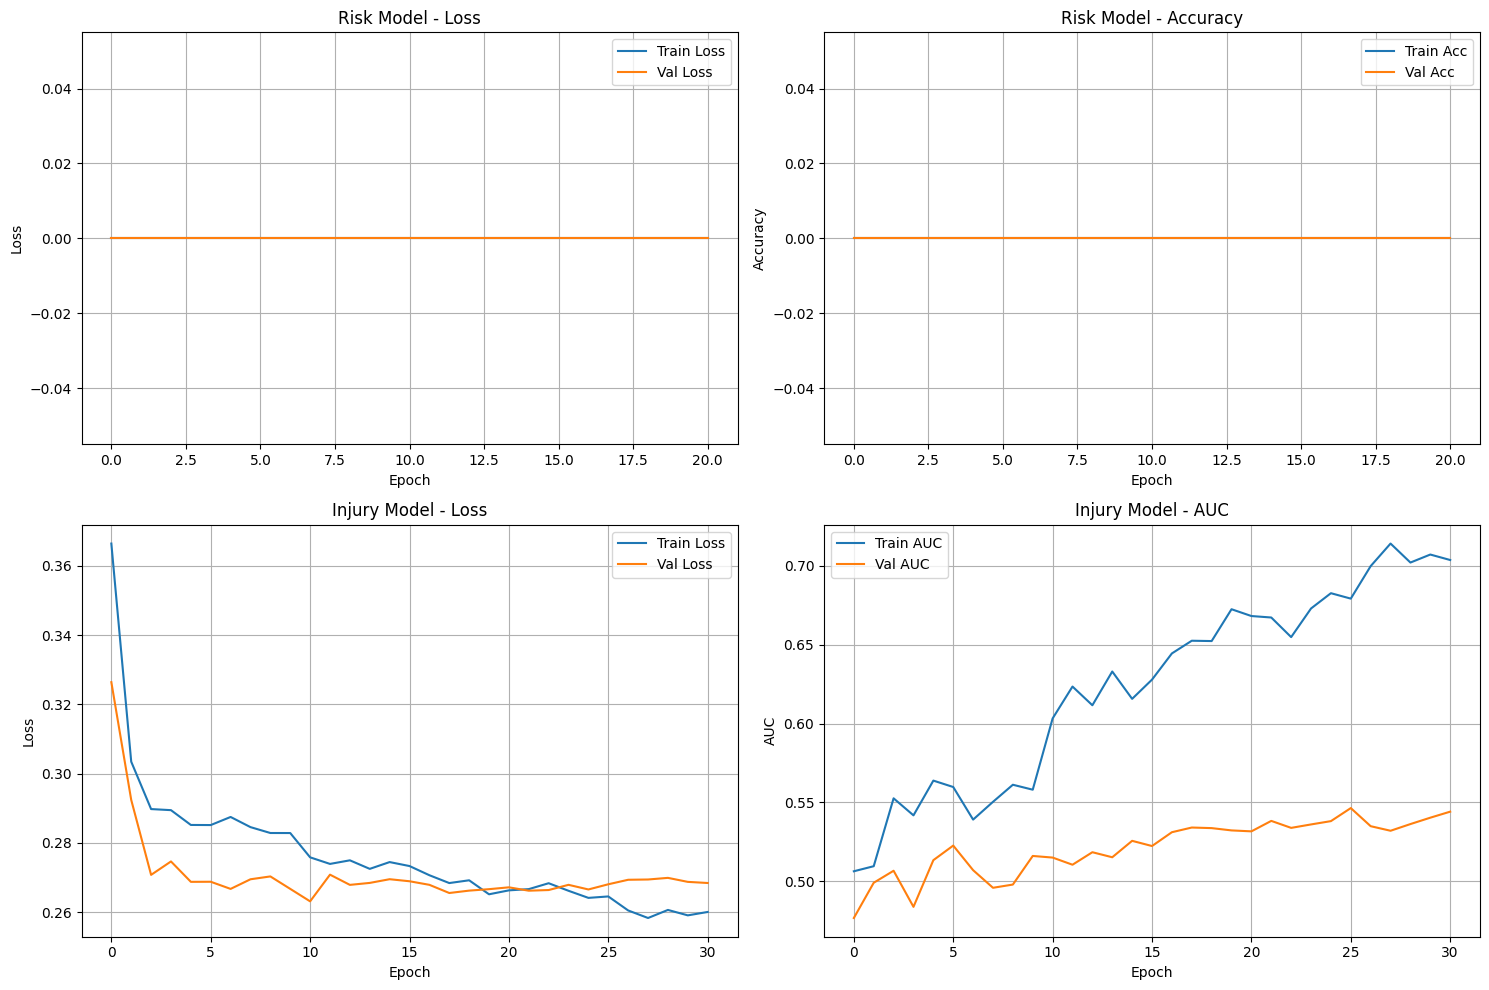


✅ Training history visualization saved as 'injury_training_history.png'


In [38]:


# ========================================
# CELL 18: Visualize Training History
# ========================================
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Risk model - Loss
axes[0, 0].plot(history_risk.history['loss'], label='Train Loss')
axes[0, 0].plot(history_risk.history['val_loss'], label='Val Loss')
axes[0, 0].set_title('Risk Model - Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Risk model - Accuracy
axes[0, 1].plot(history_risk.history['accuracy'], label='Train Acc')
axes[0, 1].plot(history_risk.history['val_accuracy'], label='Val Acc')
axes[0, 1].set_title('Risk Model - Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Injury model - Loss
axes[1, 0].plot(history_injury.history['loss'], label='Train Loss')
axes[1, 0].plot(history_injury.history['val_loss'], label='Val Loss')
axes[1, 0].set_title('Injury Model - Loss')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Injury model - AUC
axes[1, 1].plot(history_injury.history['auc'], label='Train AUC')
axes[1, 1].plot(history_injury.history['val_auc'], label='Val AUC')
axes[1, 1].set_title('Injury Model - AUC')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('AUC')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.savefig('injury_training_history.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Training history visualization saved as 'injury_training_history.png'")